# TRAIN DATA

## IMPORTING THE LIBRARIES

In [1]:
print('Importing Essential Libraries...')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import sklearn
%matplotlib inline

print('Done!!!')

Importing Essential Libraries...
Done!!!


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

## LOAD THE DATA

In [3]:
print('Loading the data.....')
df = pd.read_csv('./Data/train_data.csv')
print('Done!!!')

print('The first 5 rows are: ')
df.head()

Loading the data.....
Done!!!
The first 5 rows are: 


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      450407         Cash loans           F            N               Y   
1      271298         Cash loans           M            Y               Y   
2      122238         Cash loans           M            Y               Y   
3      305311         Cash loans           M            N               N   
4      414121         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1           67500.0    227520.0      11065.5         180000.0   
1             1          247500.0   1882372.5      65560.5        1719000.0   
2             1          180000.0    101880.0      10827.0          90000.0   
3             0           81000.0    405000.0      20677.5         405000.0   
4             0          157500.0    888840.0      29506.5         675000.0   

   ... FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0   
1  ...                0                0                0   
2  ...                0                0                0   
3  ...                0                0                0   
4  ...                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        1.0   
1                         0.0                        0.0   
2                         0.0                        2.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         2.0       0  
1                        1.0                         3.0       0  
2                        0.0                         1.0       0  
3                        0.0                         2.0       0  
4                        0.0                         2.0       0  

[5 rows x 122 columns]

In [4]:
df.info()
print('The shape of the dataframe is:- Rows: ',df.shape[0],' Columns: ',df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184506 entries, 0 to 184505
Columns: 122 entries, SK_ID_CURR to TARGET
dtypes: float64(64), int64(42), object(16)
memory usage: 171.7+ MB
The shape of the dataframe is:- Rows:  184506  Columns:  122


## Data Visualization..

<AxesSubplot: xlabel='TARGET', ylabel='count'>

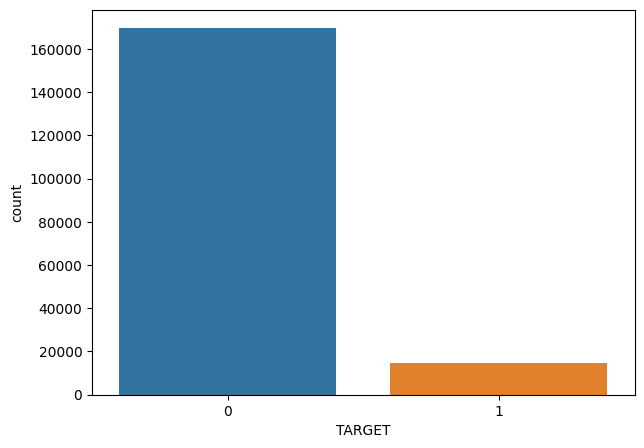

In [5]:
#In the given data how many loans replayed and defaulted loans.
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(x = 'TARGET',data = df)

<AxesSubplot: xlabel='CODE_GENDER', ylabel='count'>

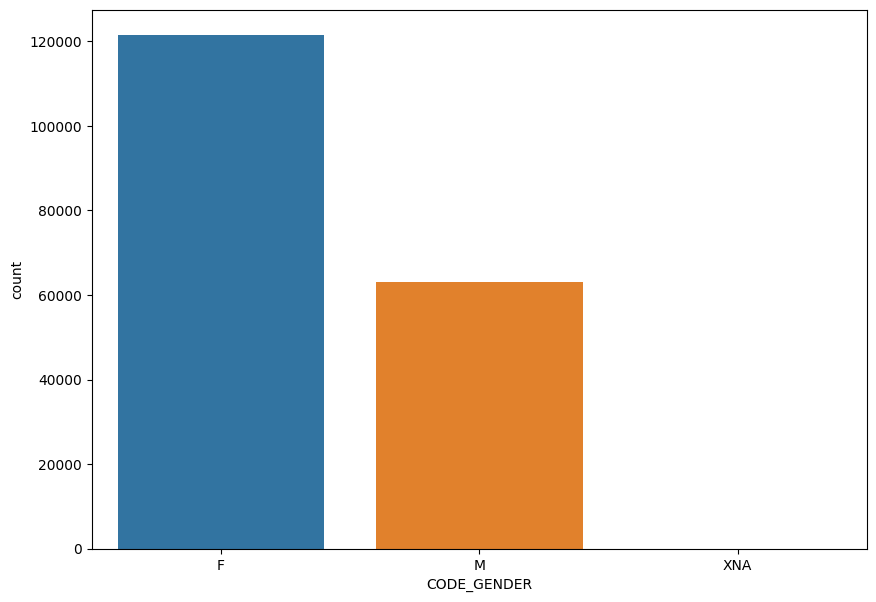

In [6]:
#Who is the highest borrower? Male or Female?
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER',data=df)

<AxesSubplot: xlabel='TARGET', ylabel='count'>

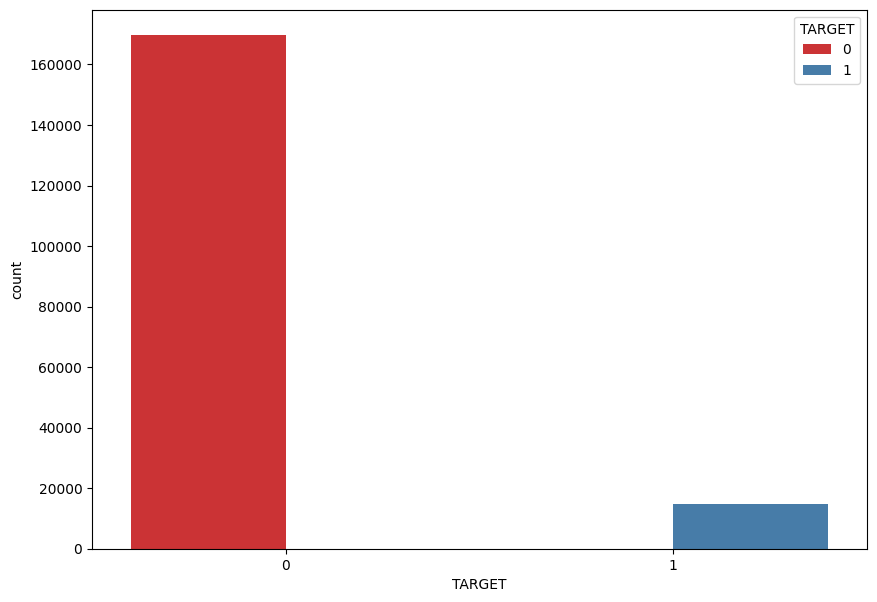

In [7]:
# #How is the distribution of target labels? - Did most people return on time ?
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x ='TARGET',data=df, hue='TARGET',palette="Set1")

<AxesSubplot: xlabel='TARGET', ylabel='count'>

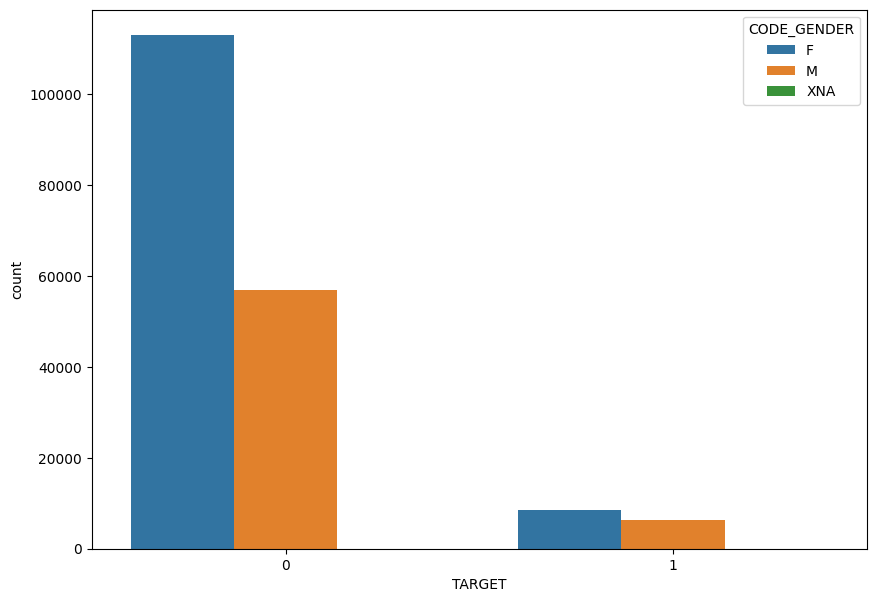

In [8]:
# #Whether is it Female who has more difficulties or is it Male in repaying the loan?
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='TARGET',hue='CODE_GENDER',data=df)

<AxesSubplot: xlabel='CODE_GENDER', ylabel='count'>

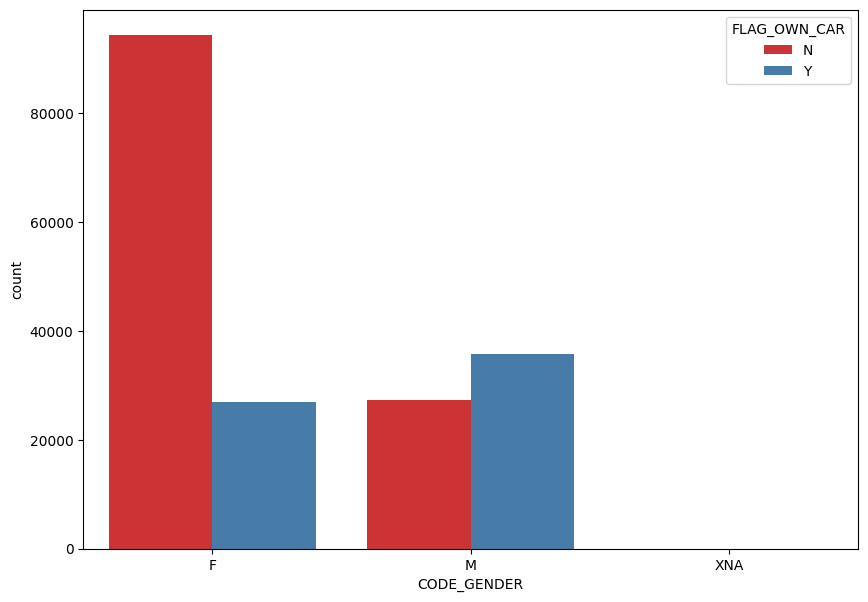

In [9]:
# #Who owns most number of the cars? M or F?
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='CODE_GENDER', hue='FLAG_OWN_CAR', data=df,palette="Set1")

Drawing Histogram!!!


/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[h], palette='Blues_r')
/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[h], palette='Blues_r')
/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[h], palette='Blues_r')
/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[h], palette='Blues_r')
/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[h], palette='Blues_r')
/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[h], palette='Blues_r')
/tmp/ipykernel_14621/3428111277.py:5: UserWarning: Ignoring `pal

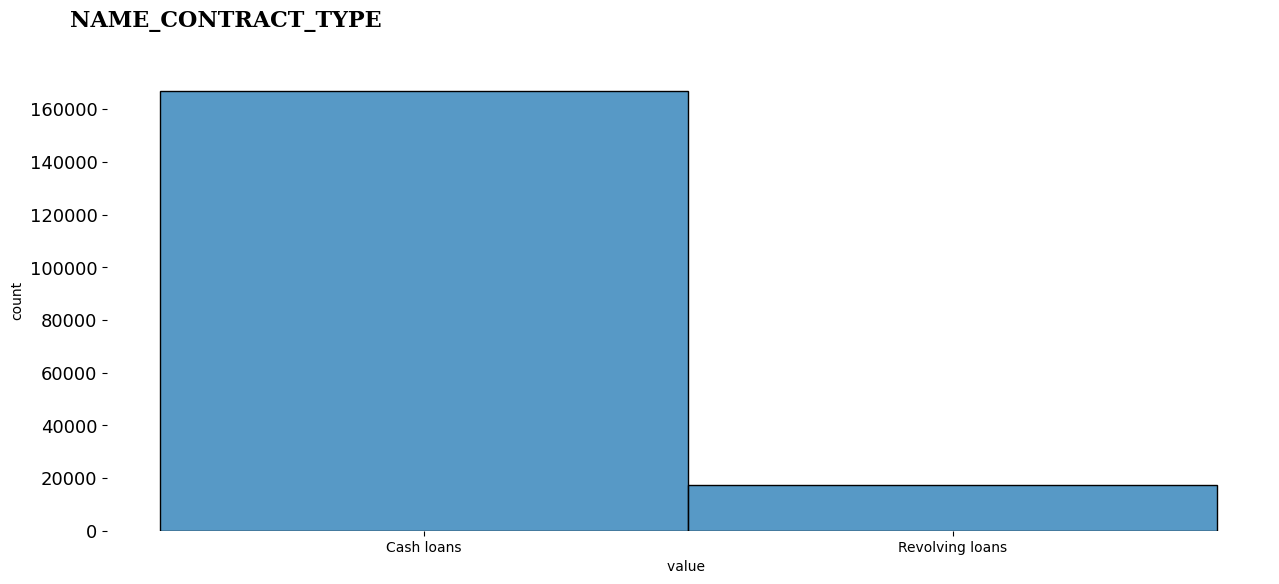

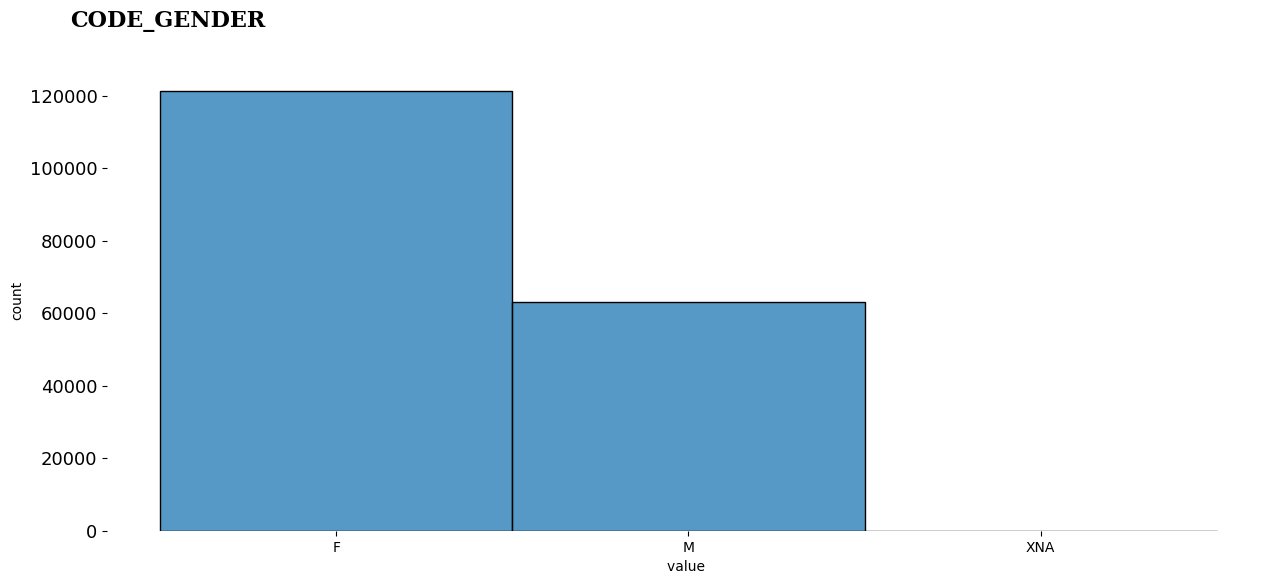

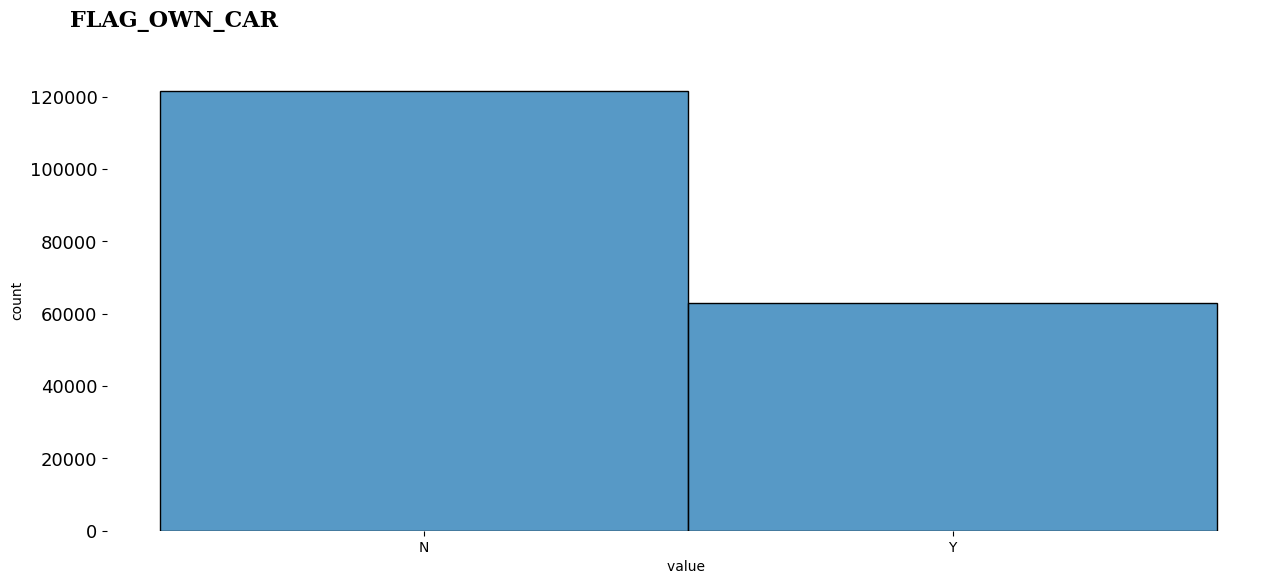

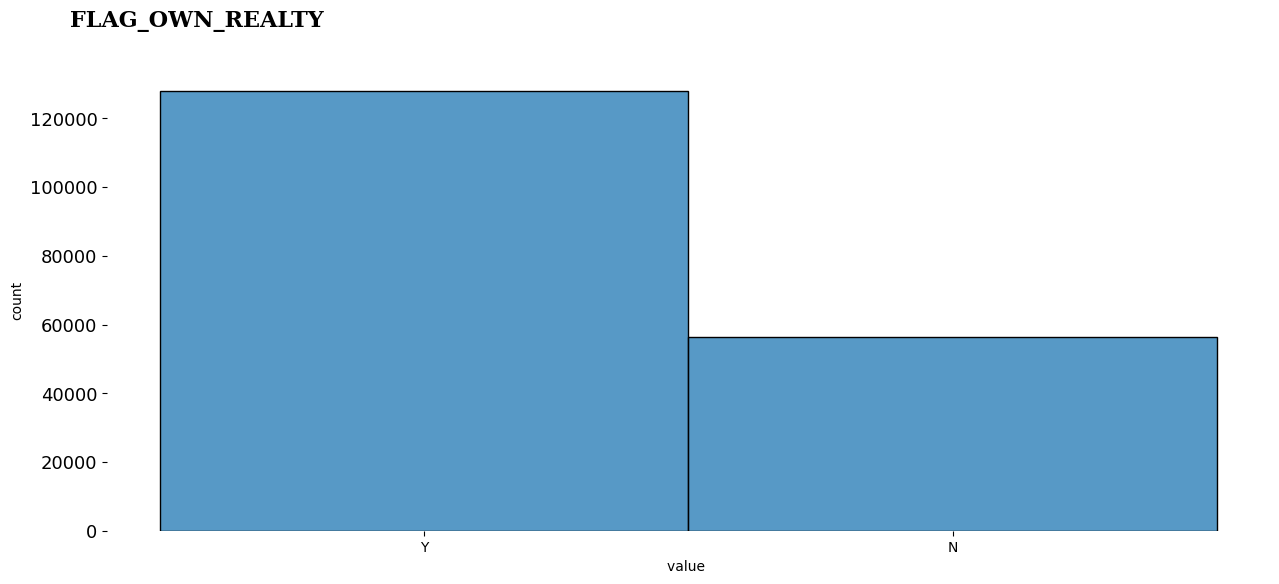

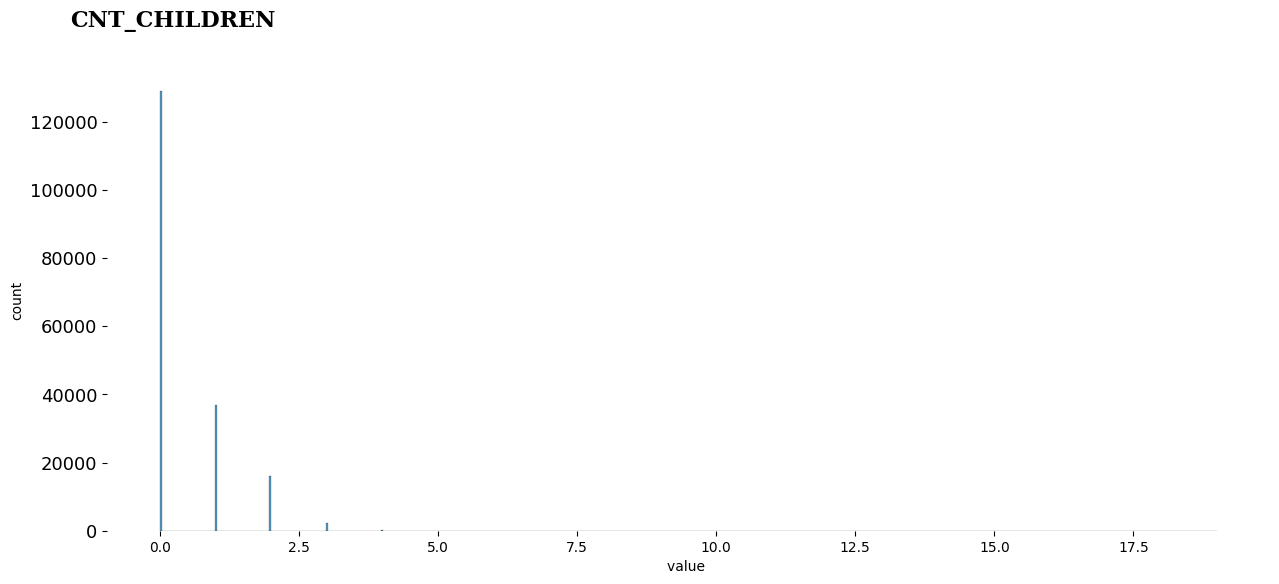

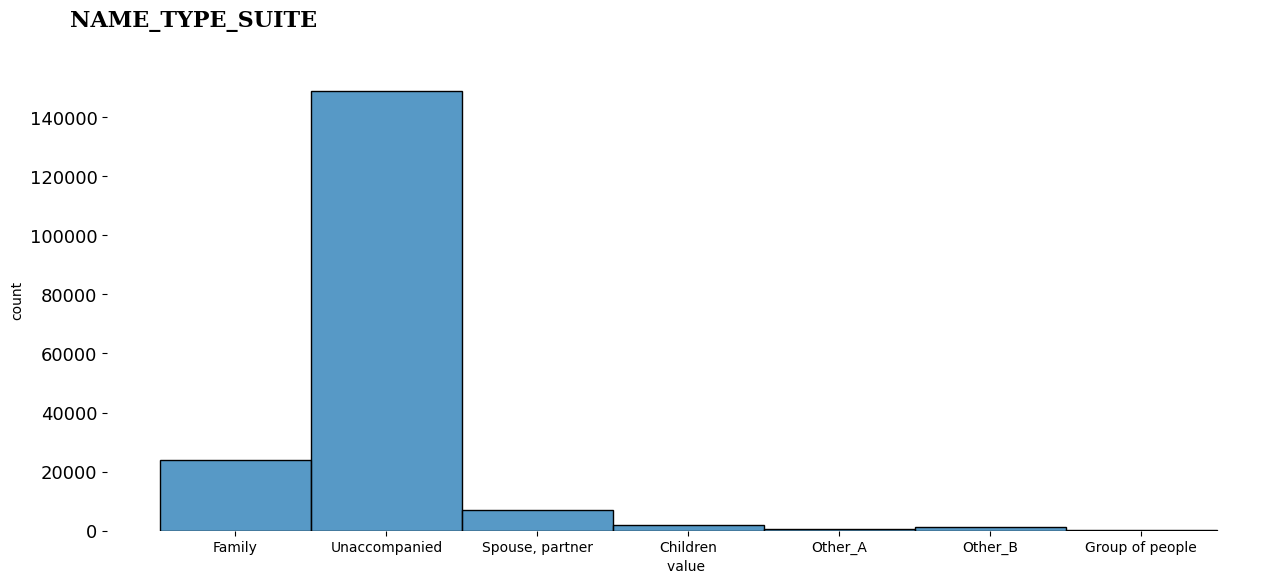

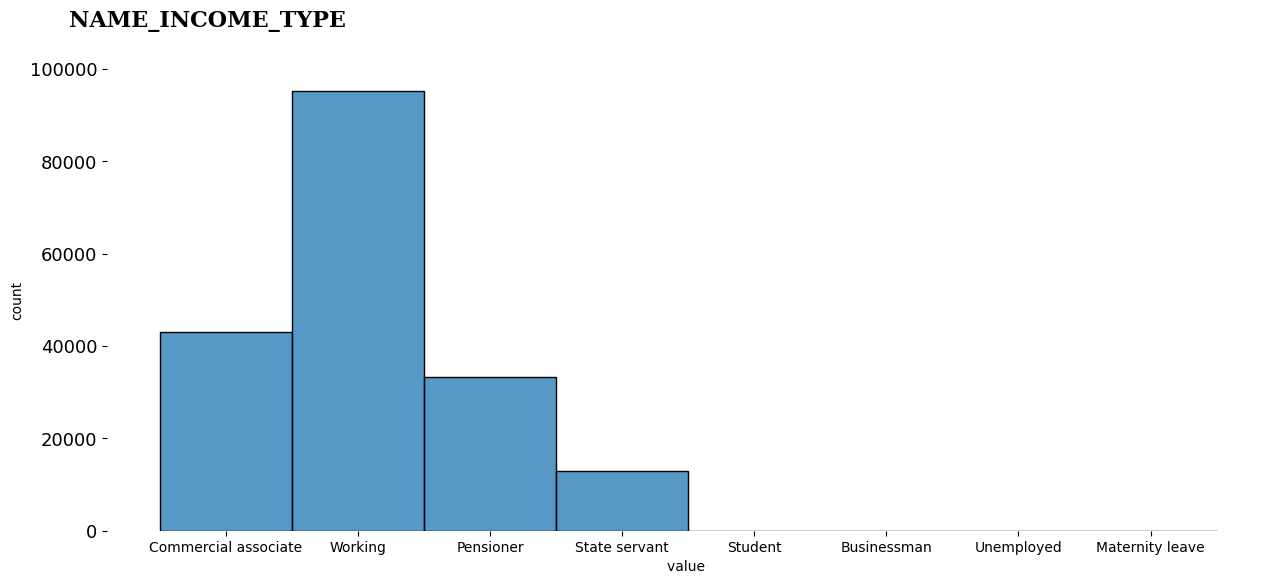

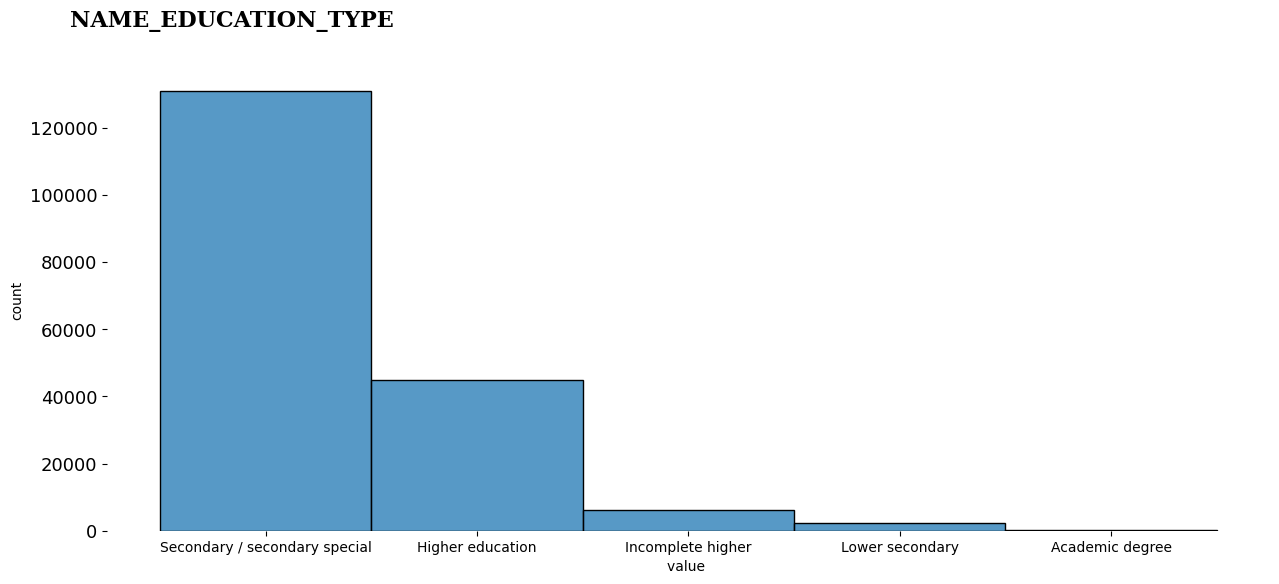

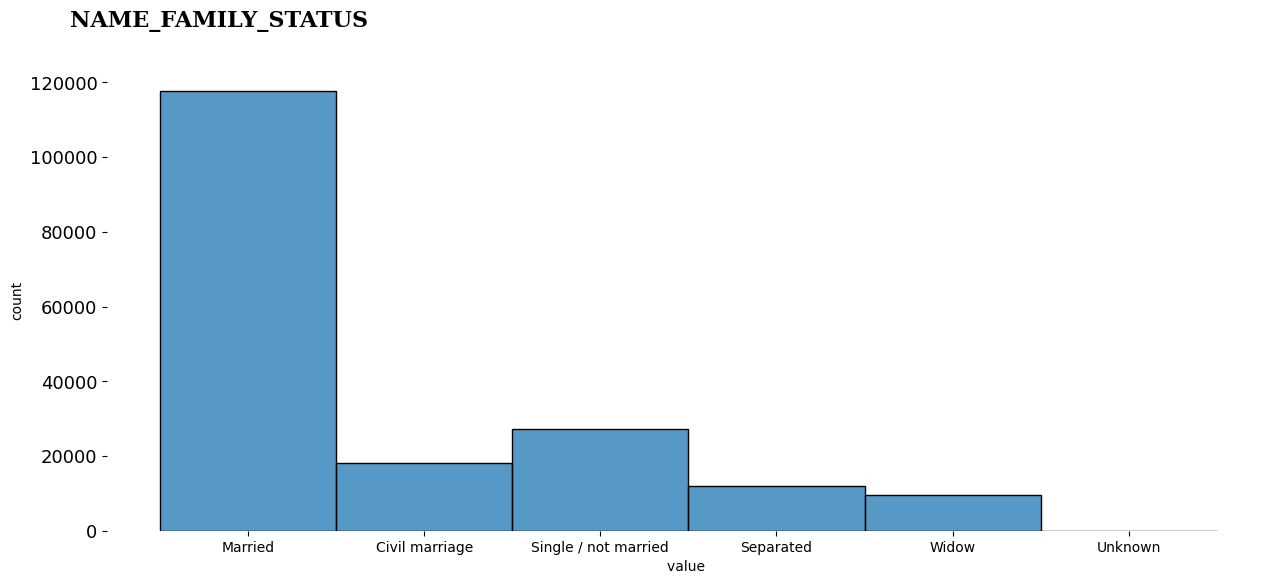

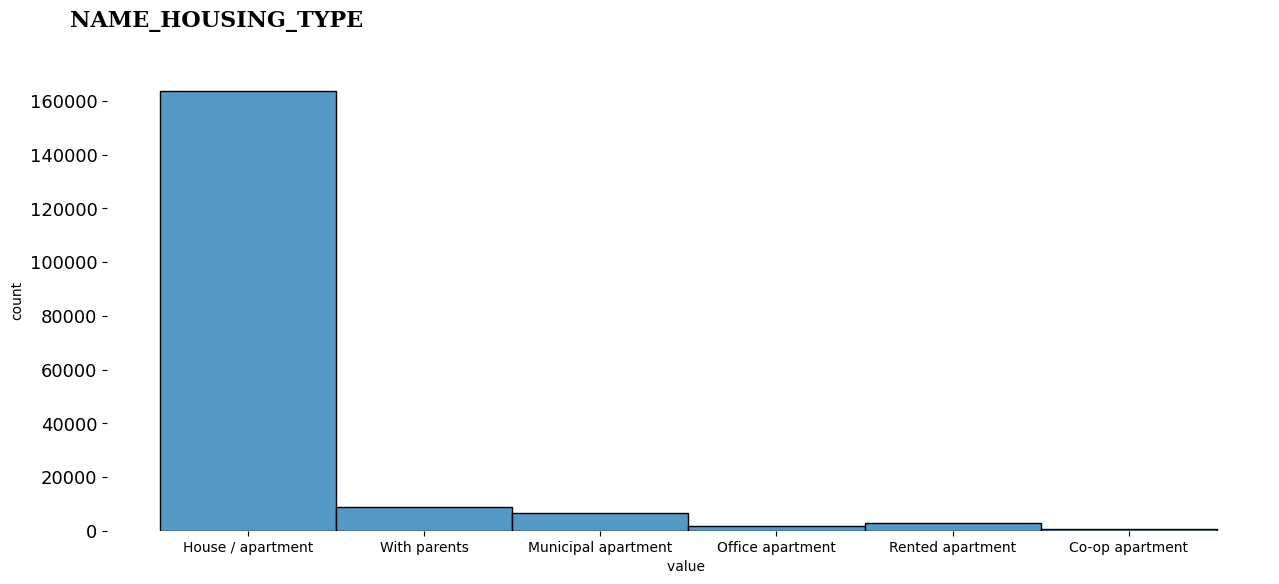

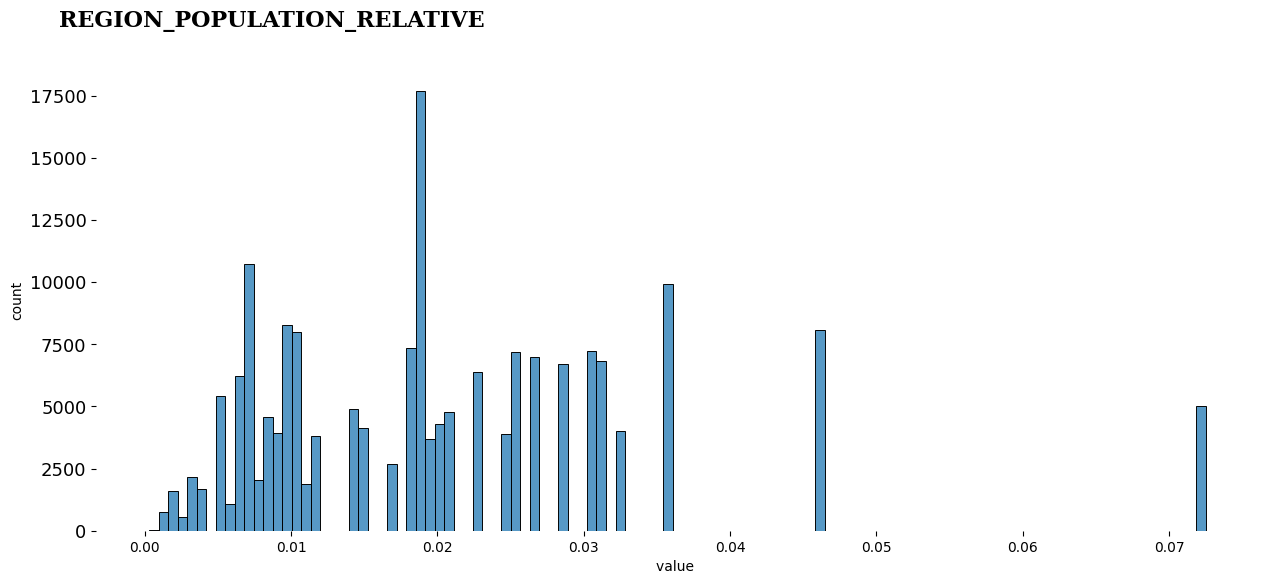

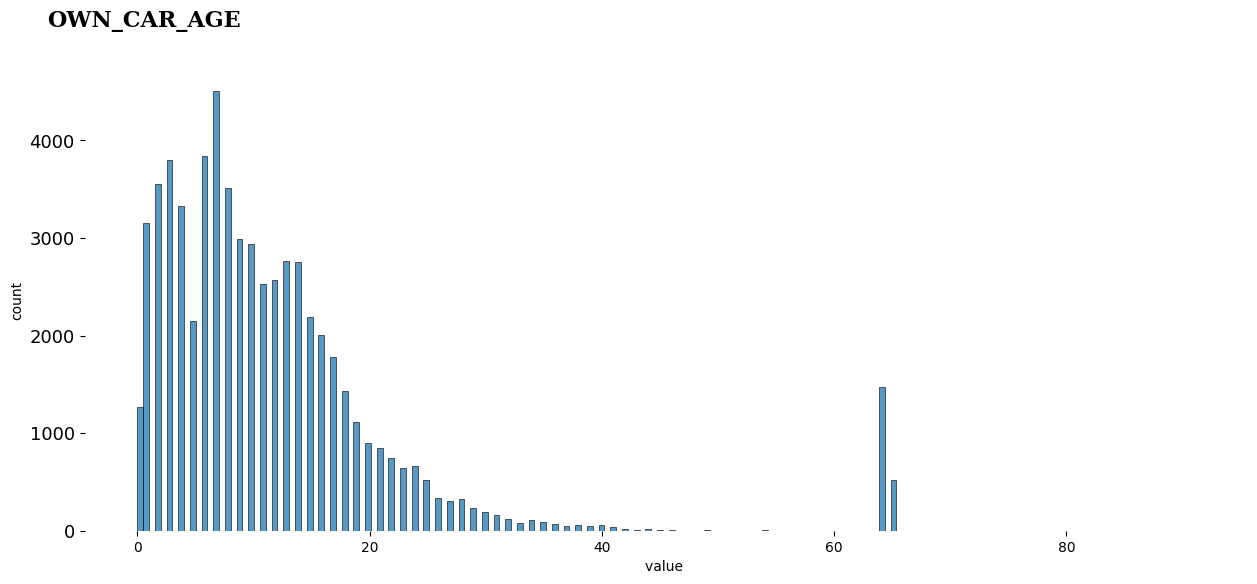

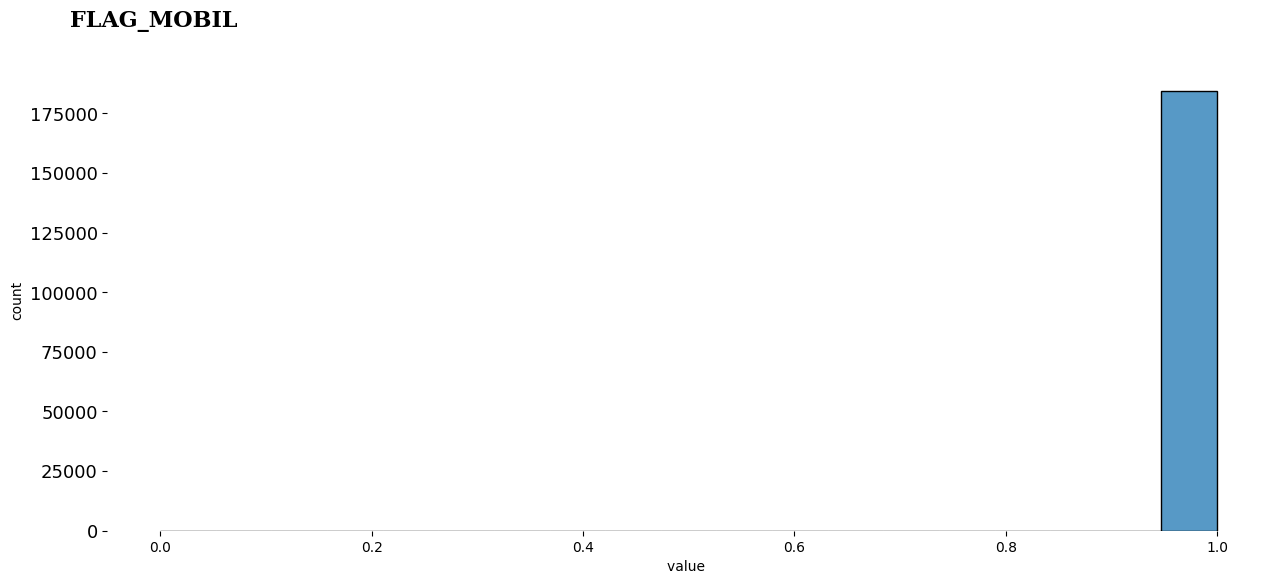

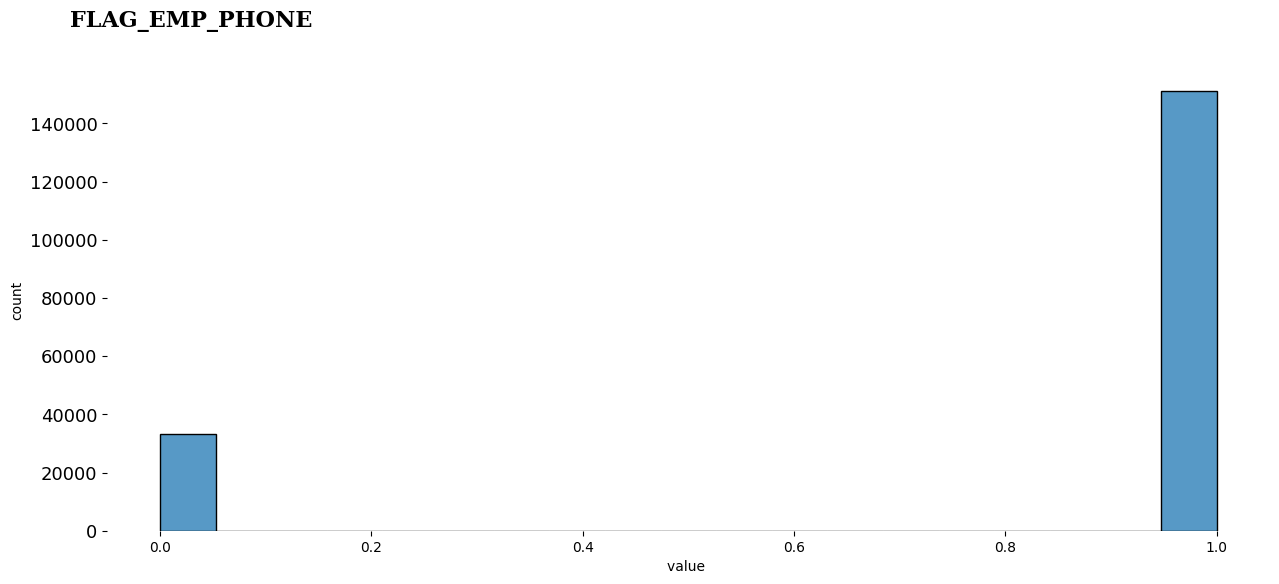

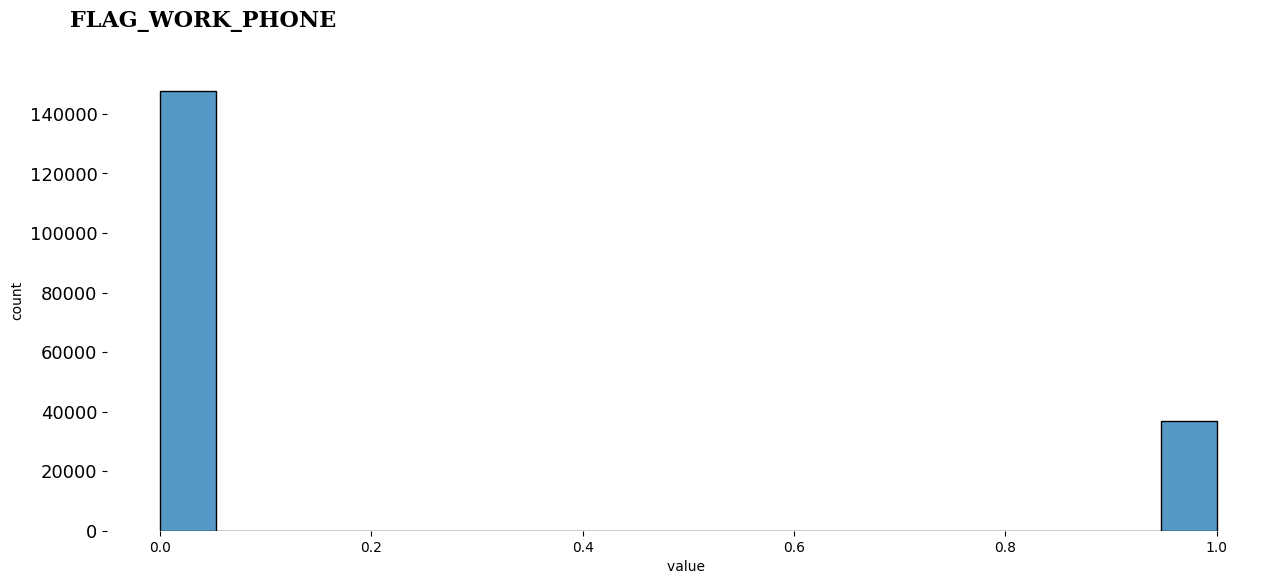

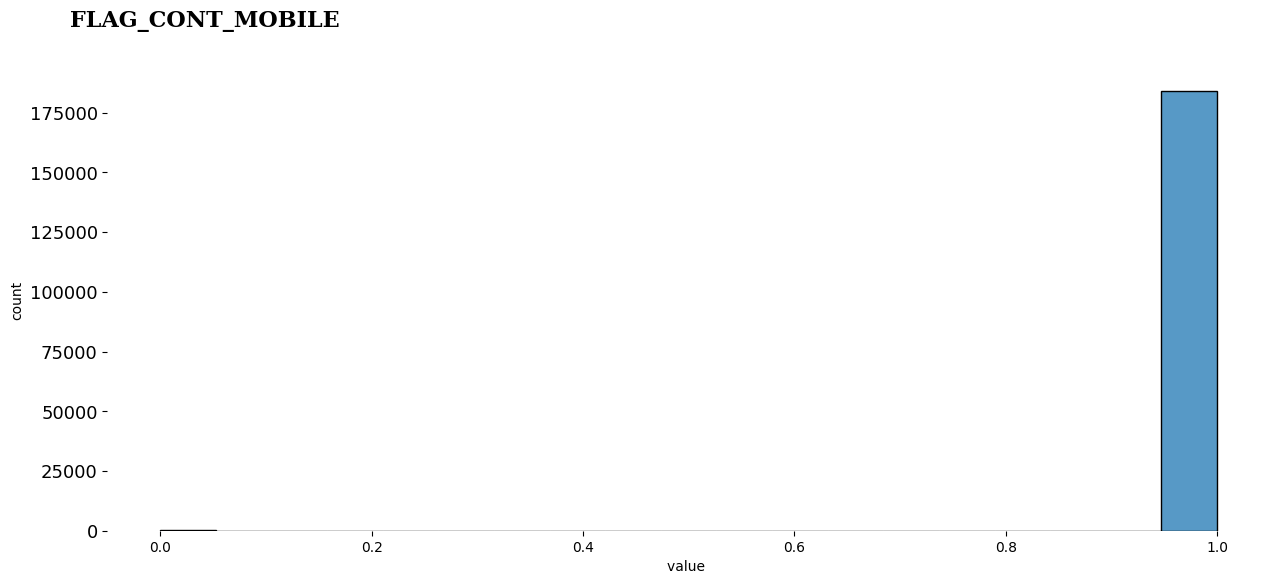

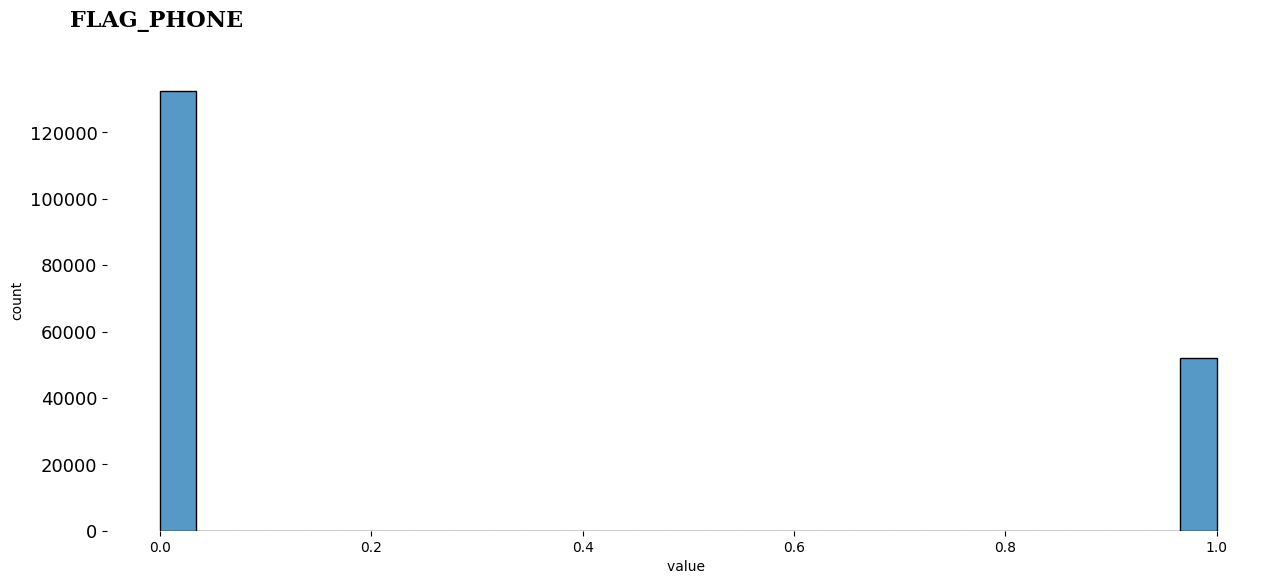

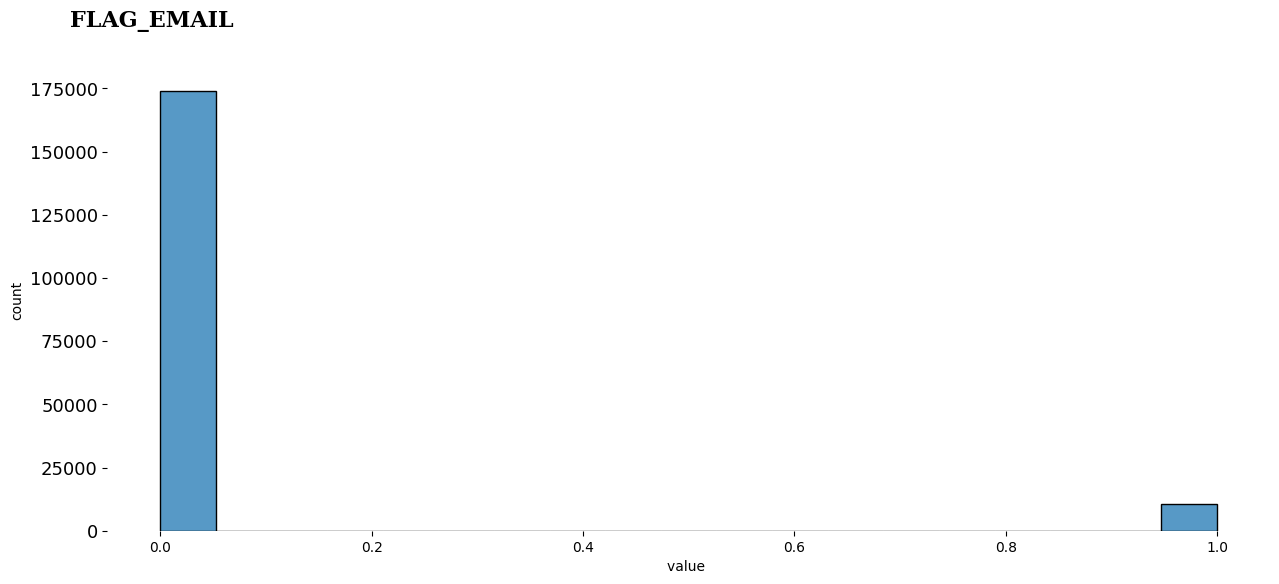

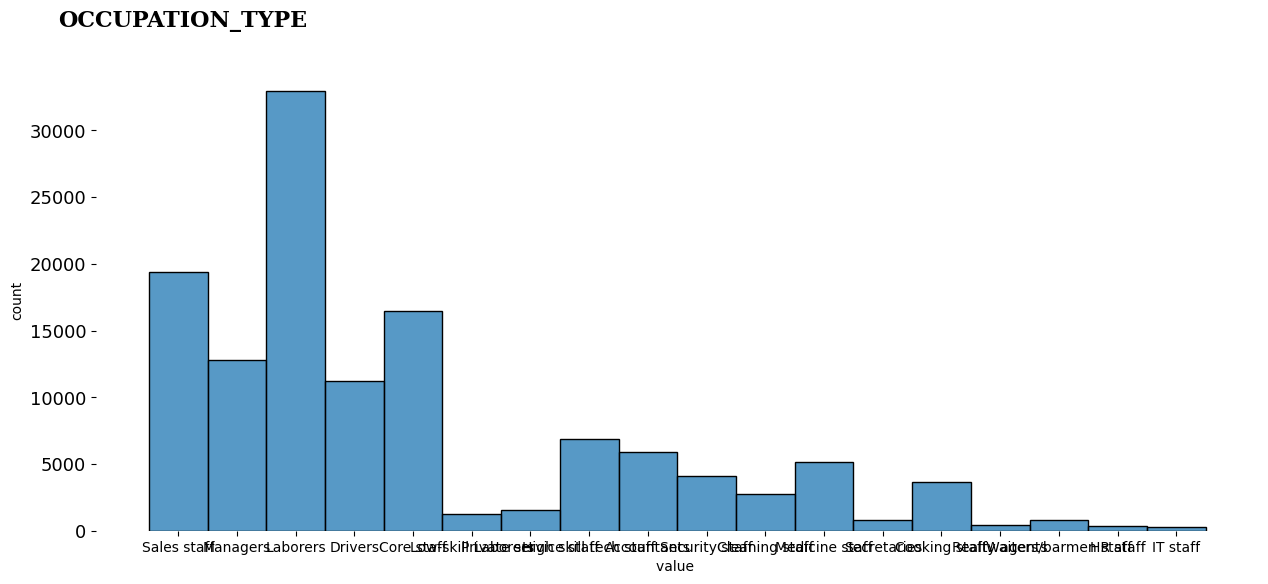

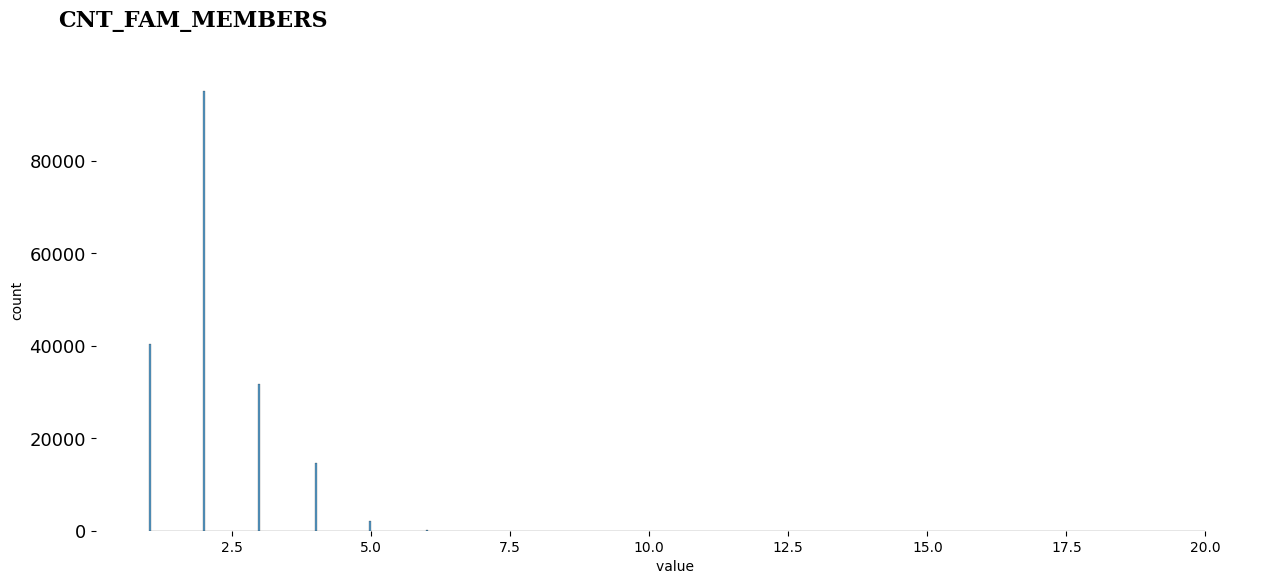

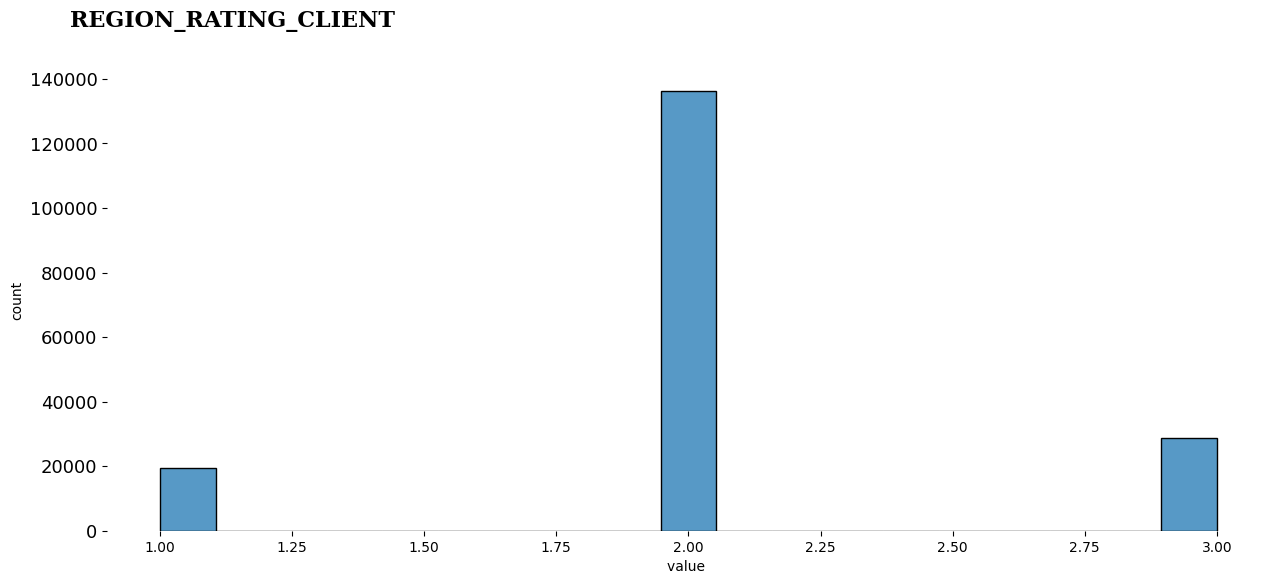

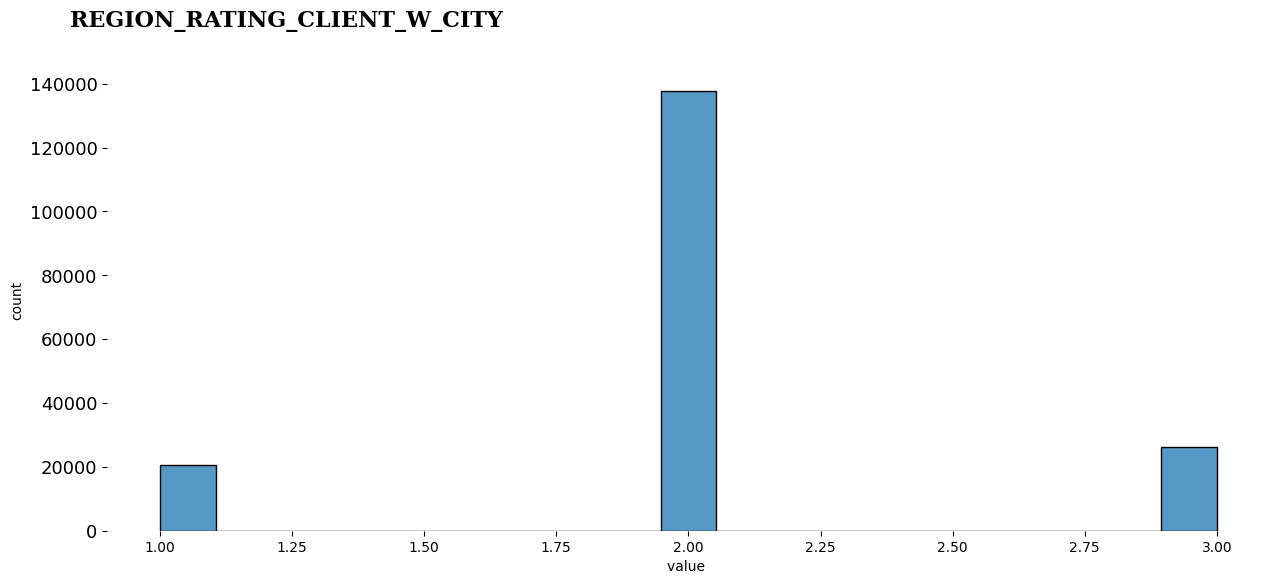

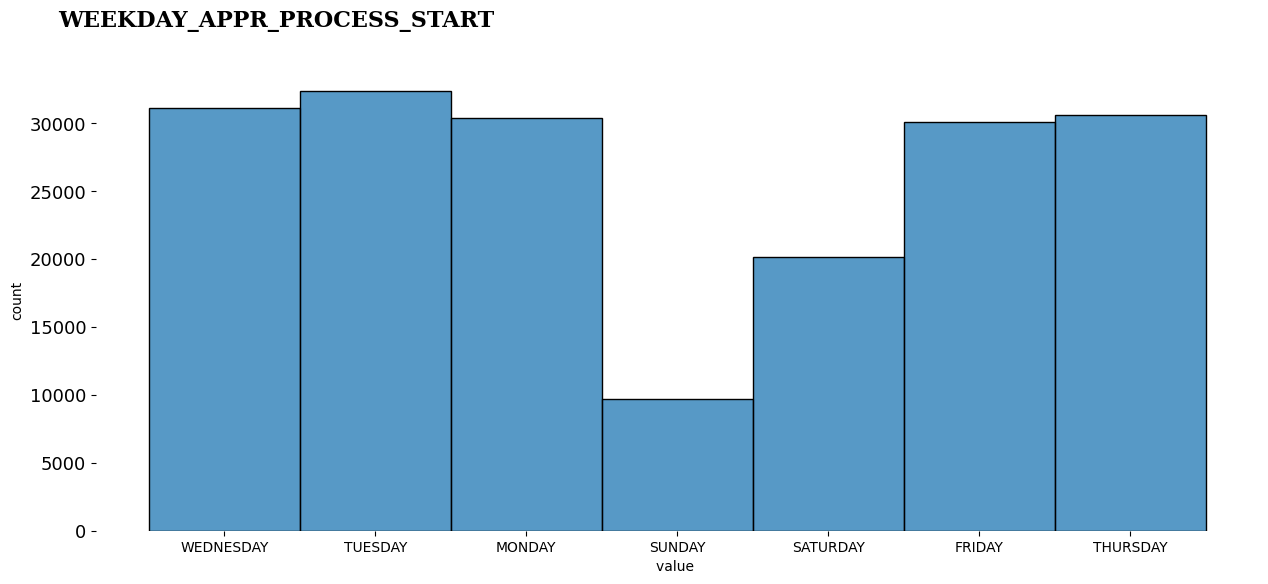

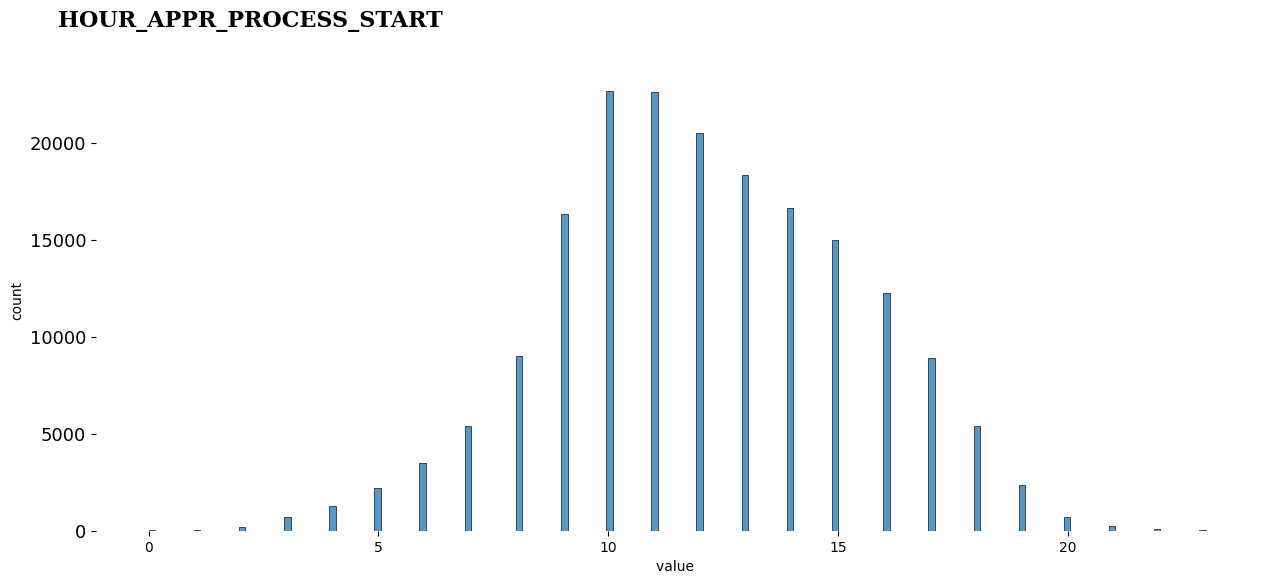

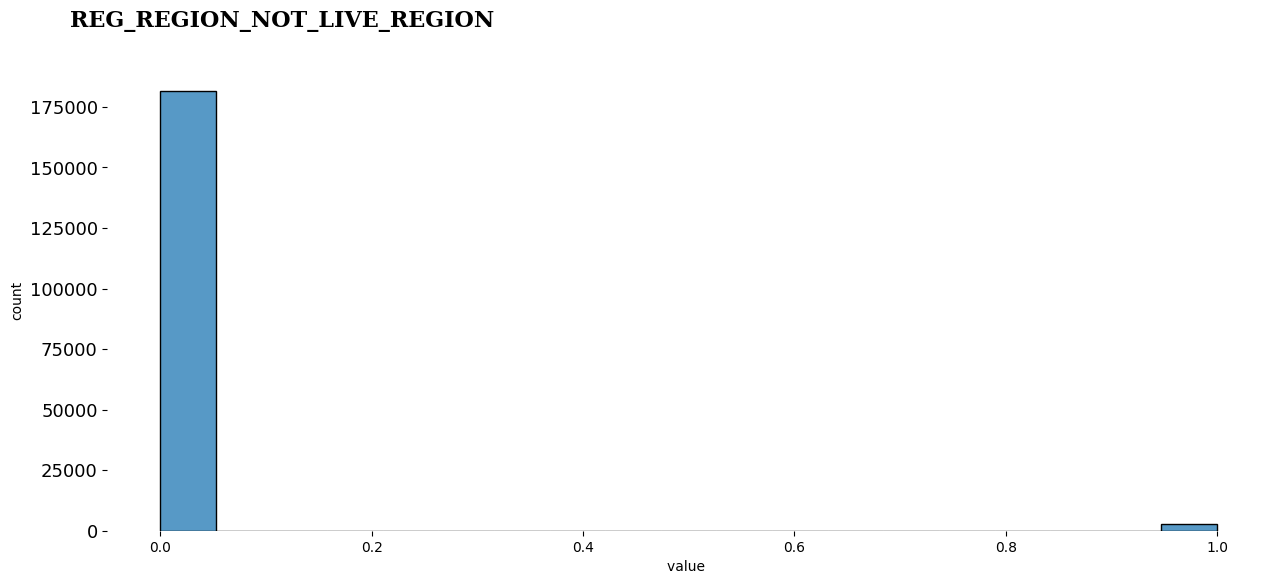

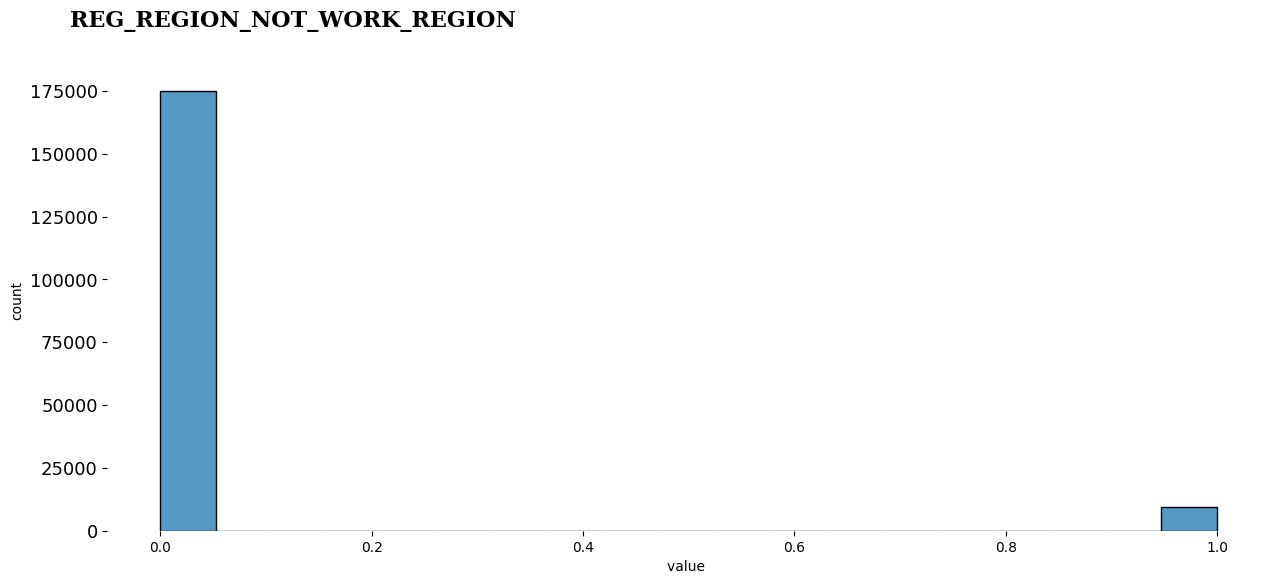

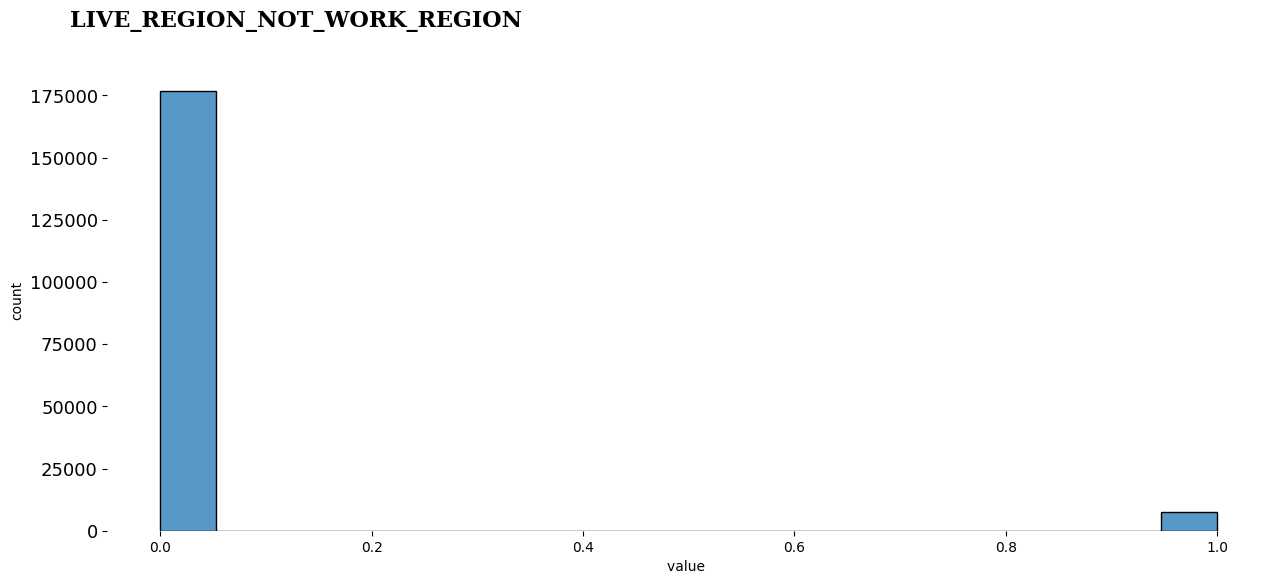

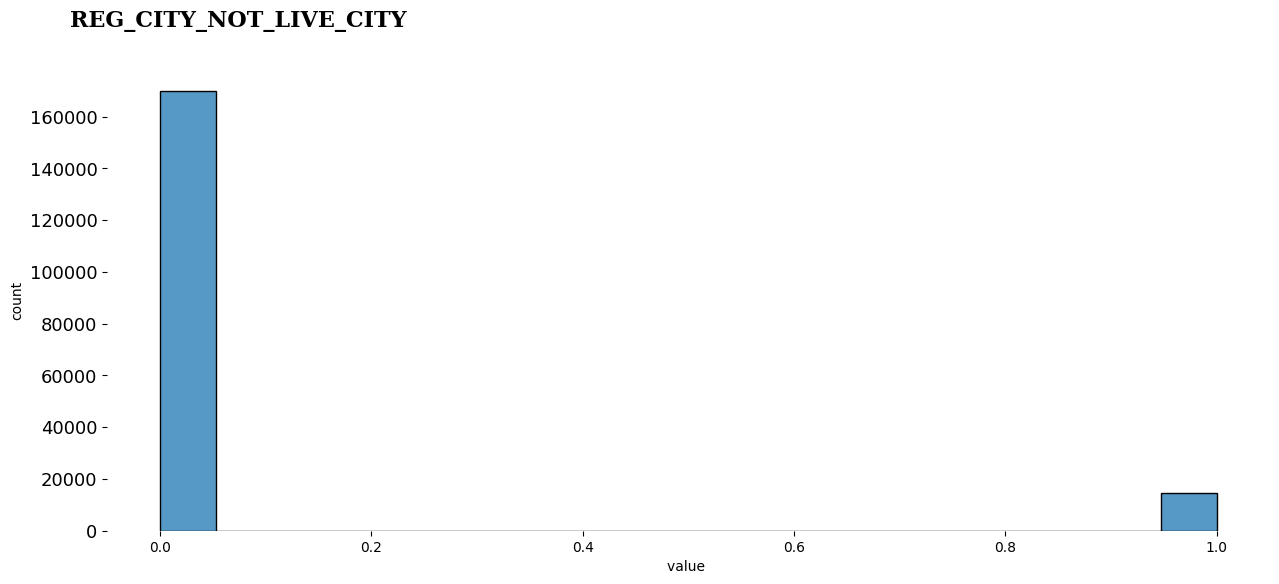

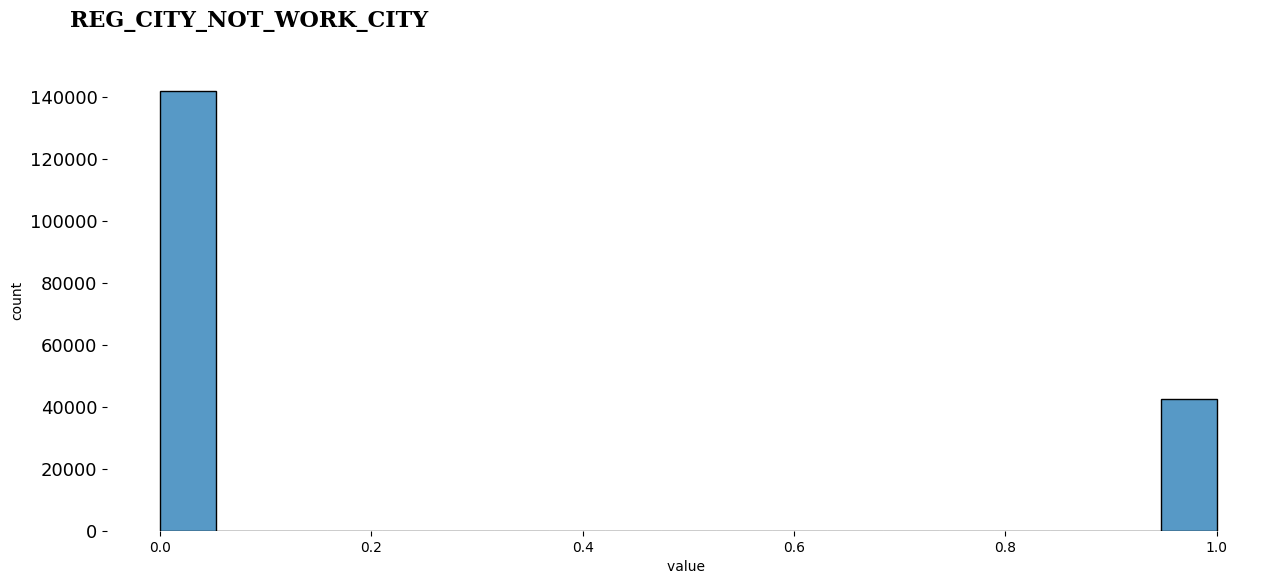

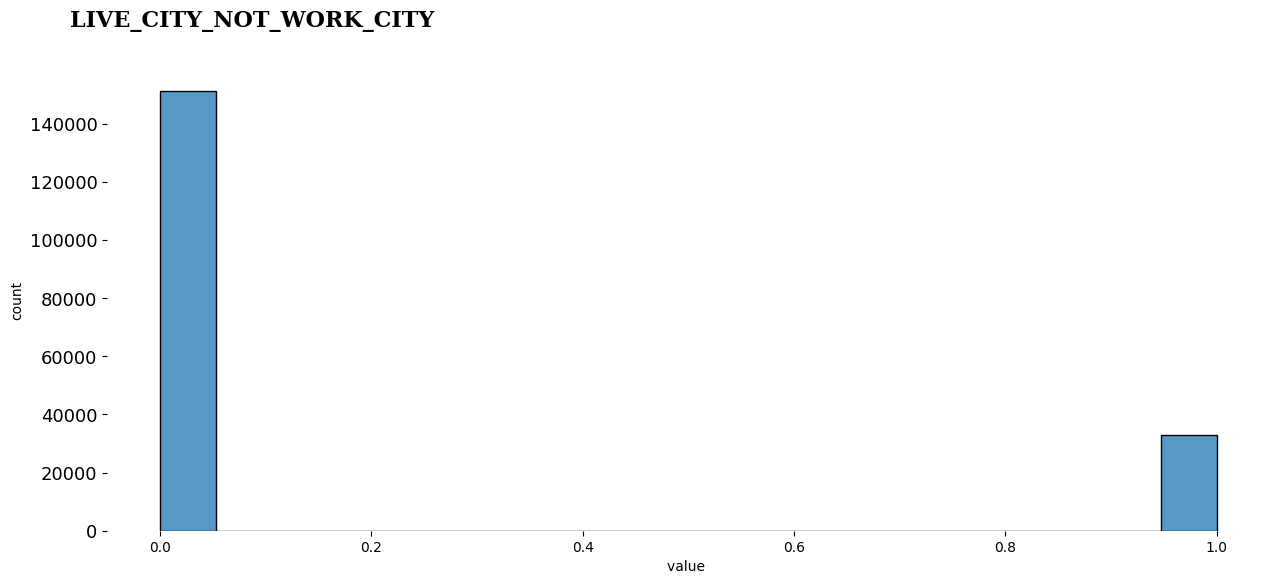

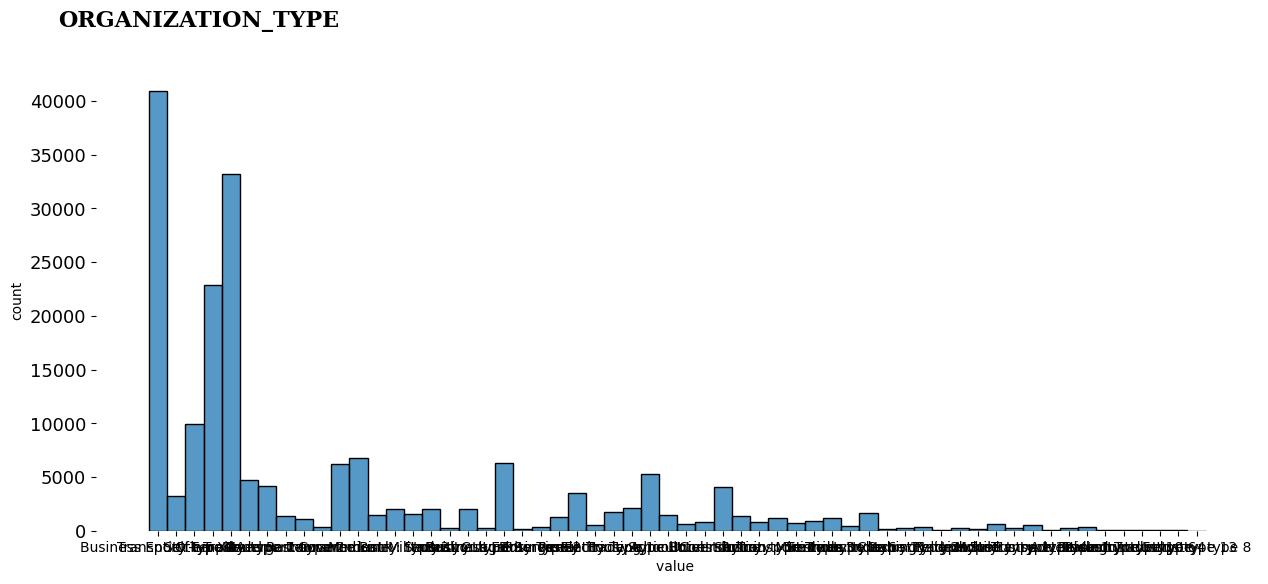

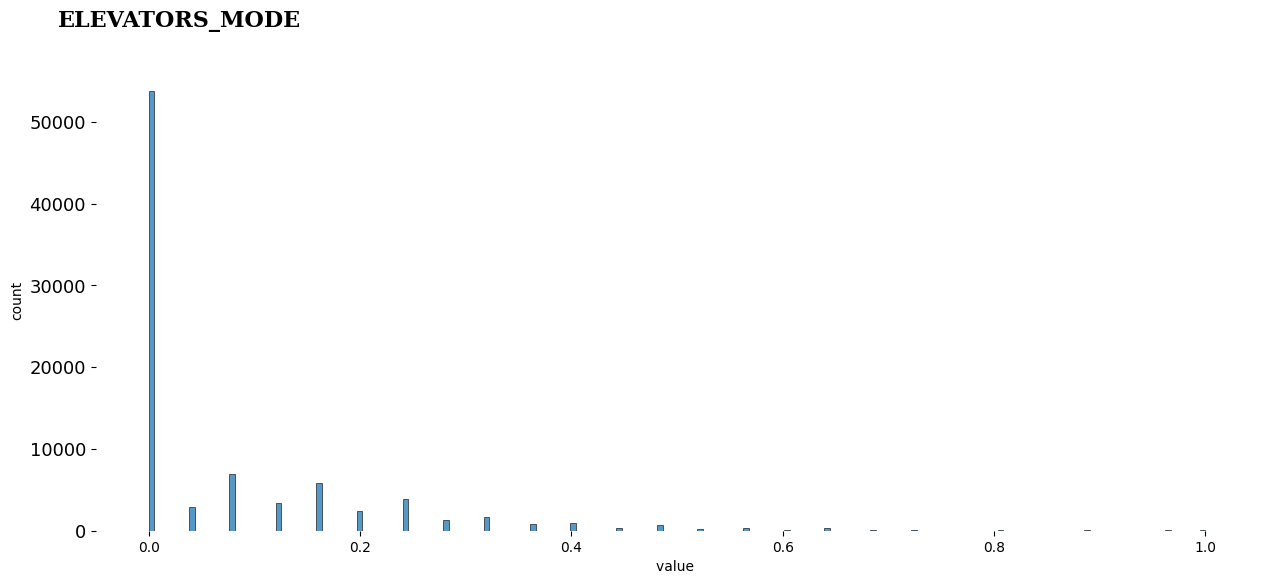

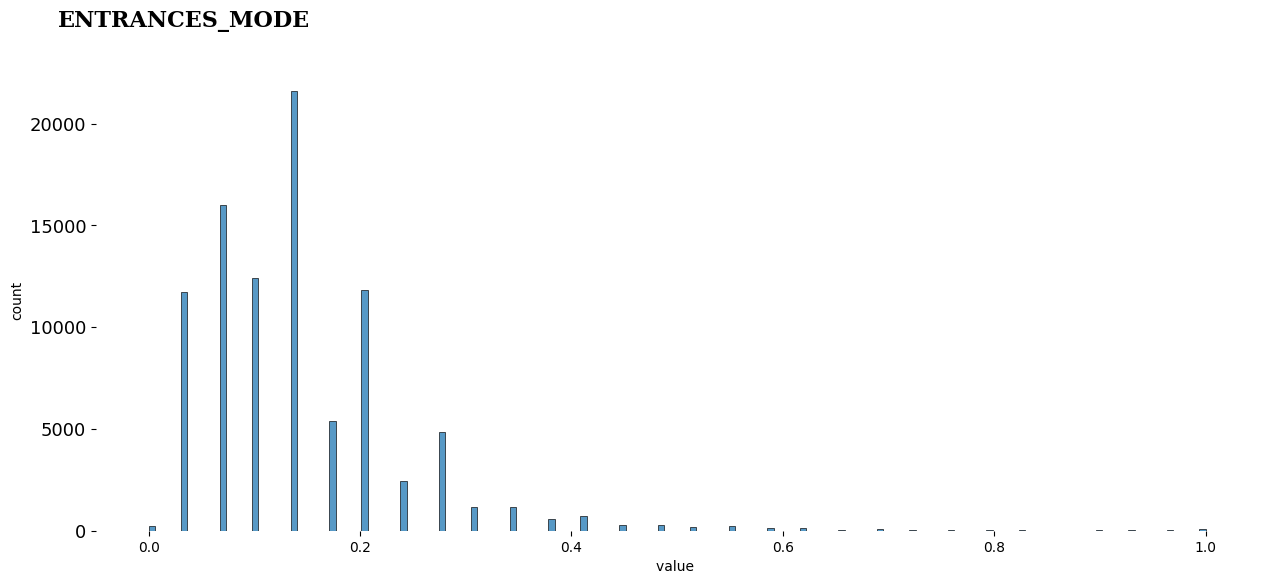

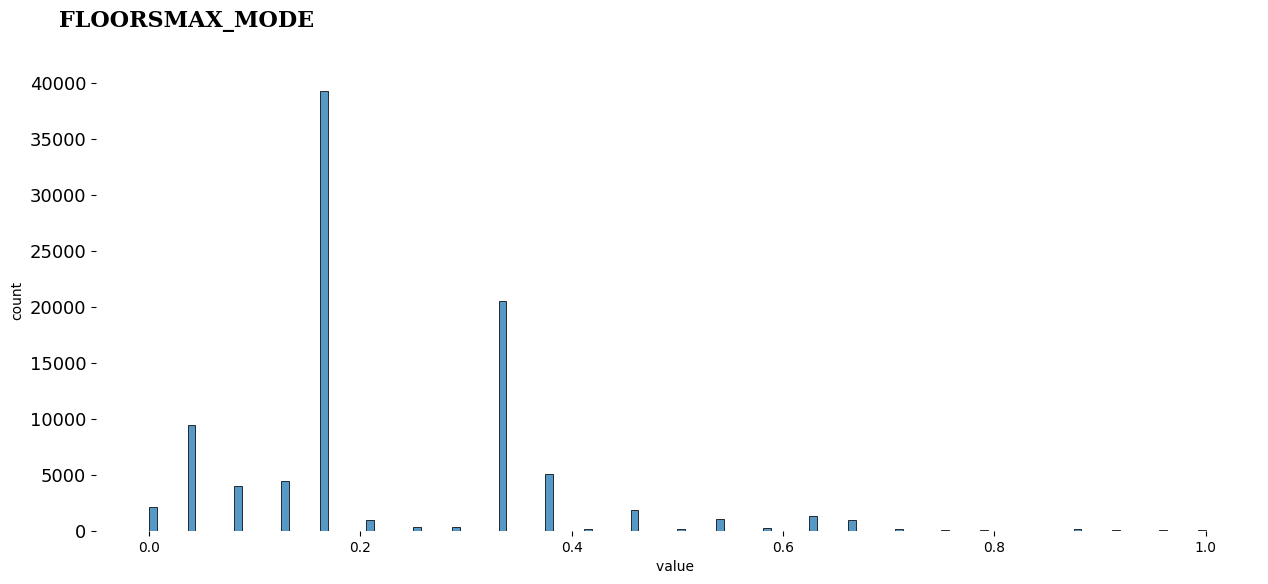

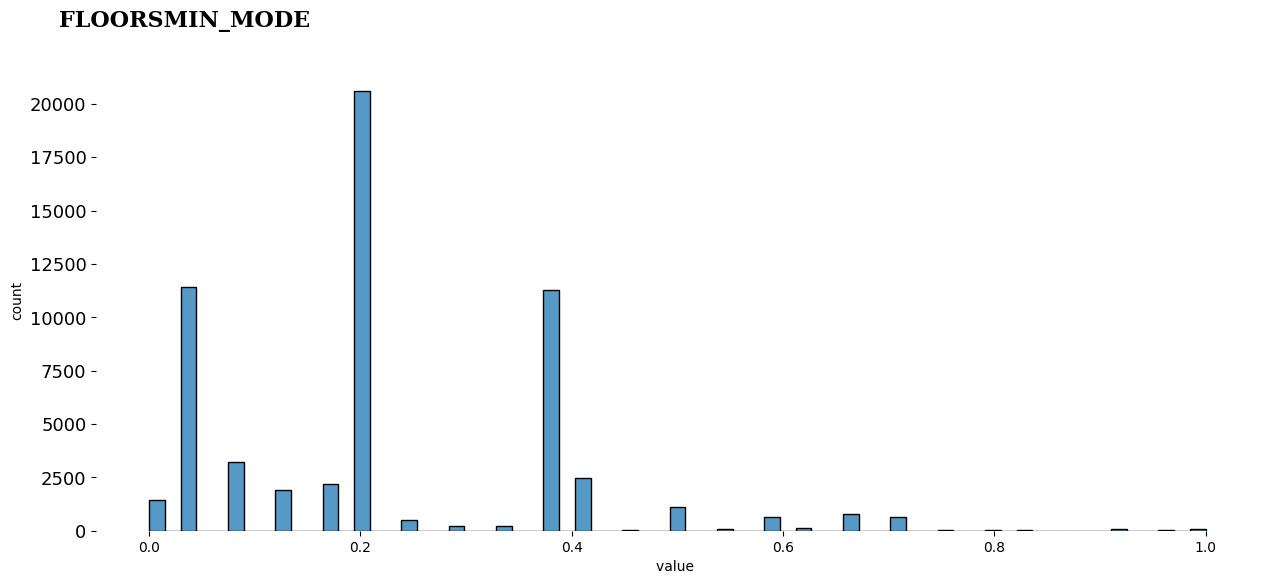

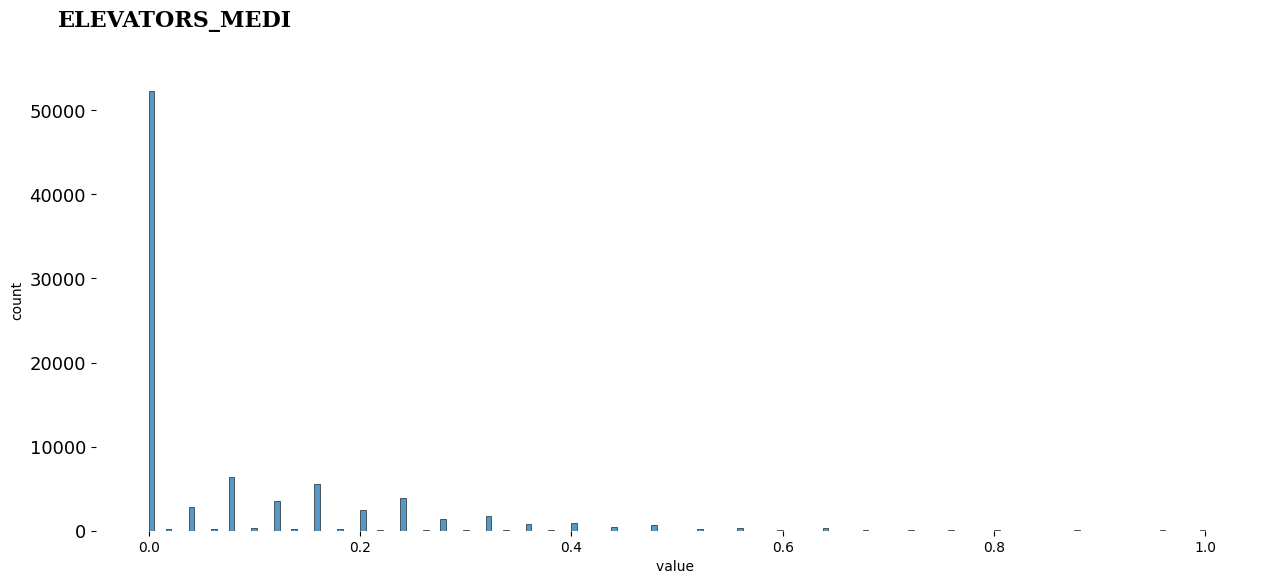

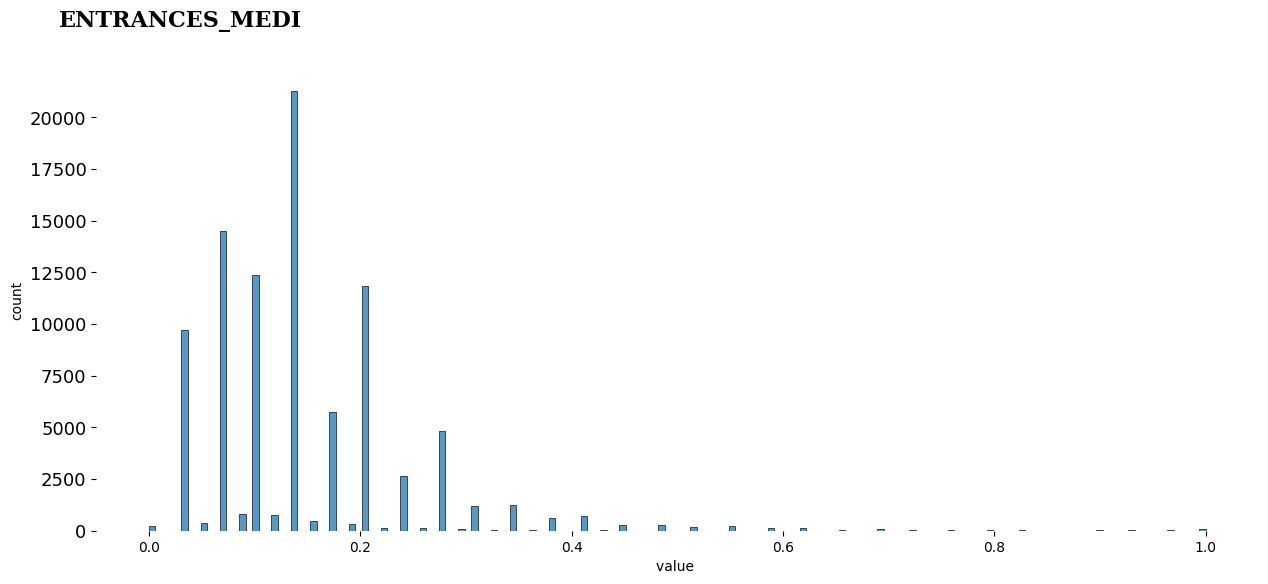

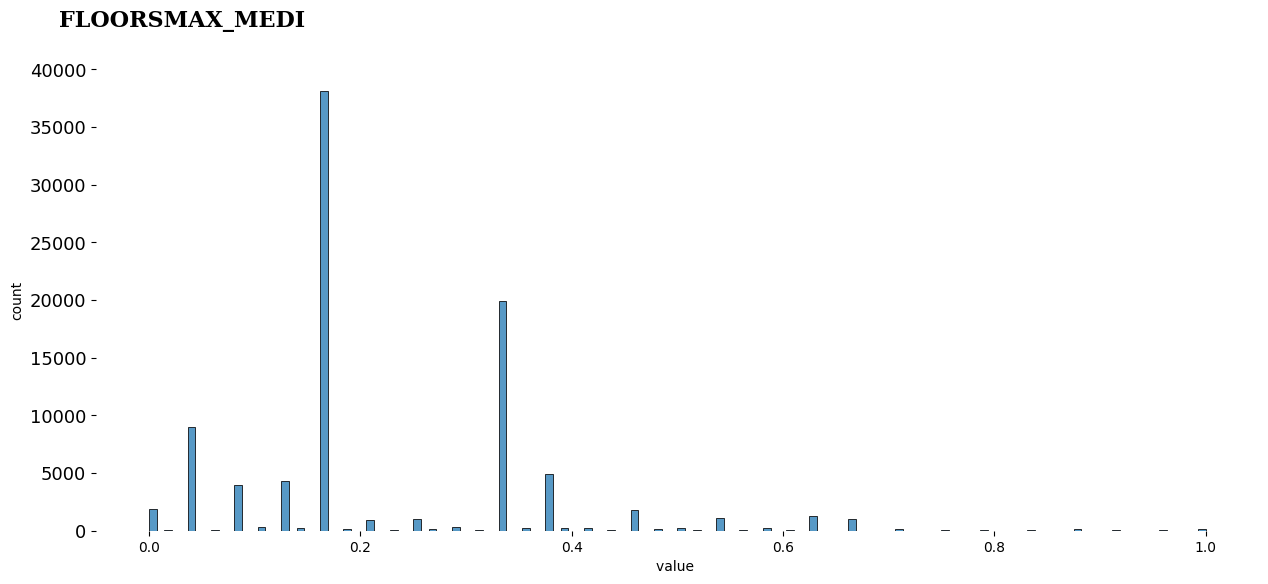

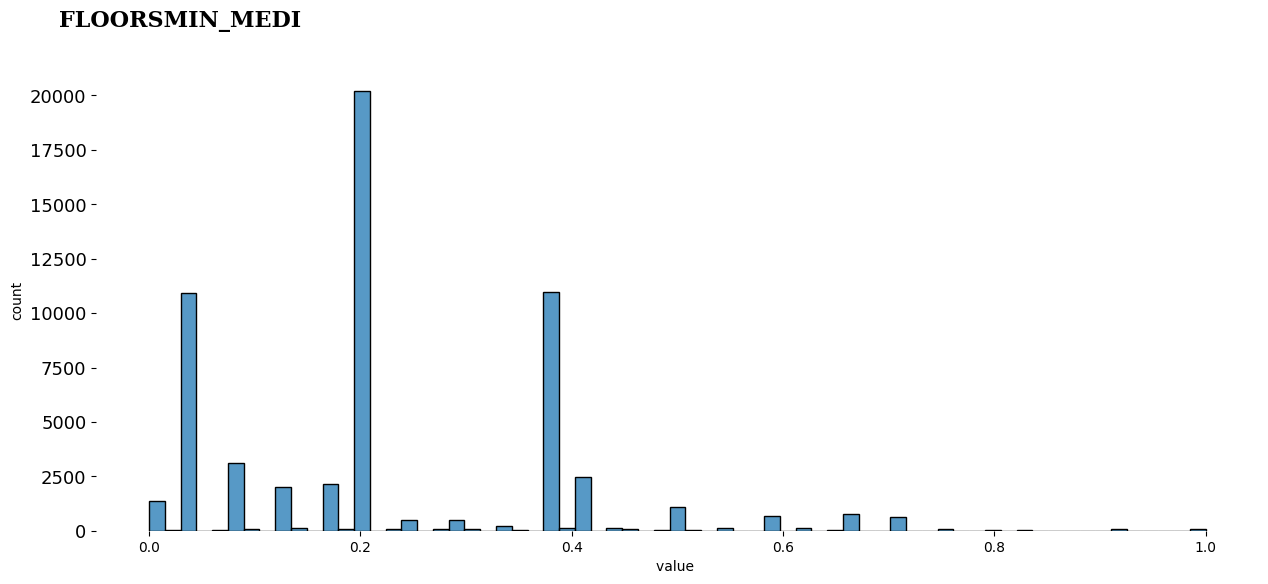

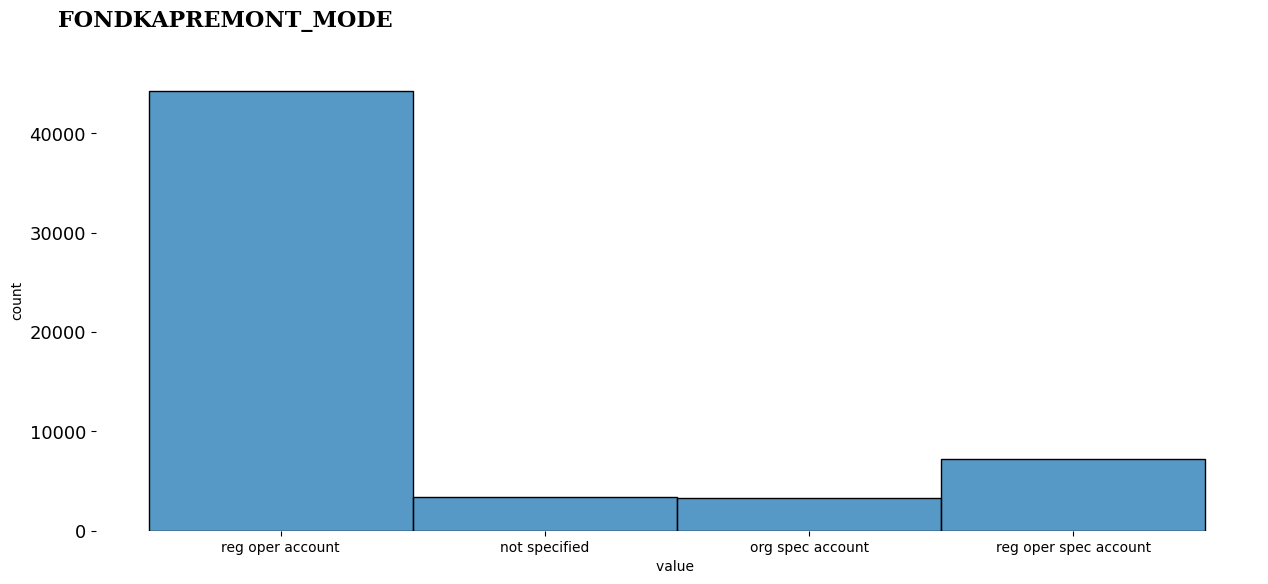

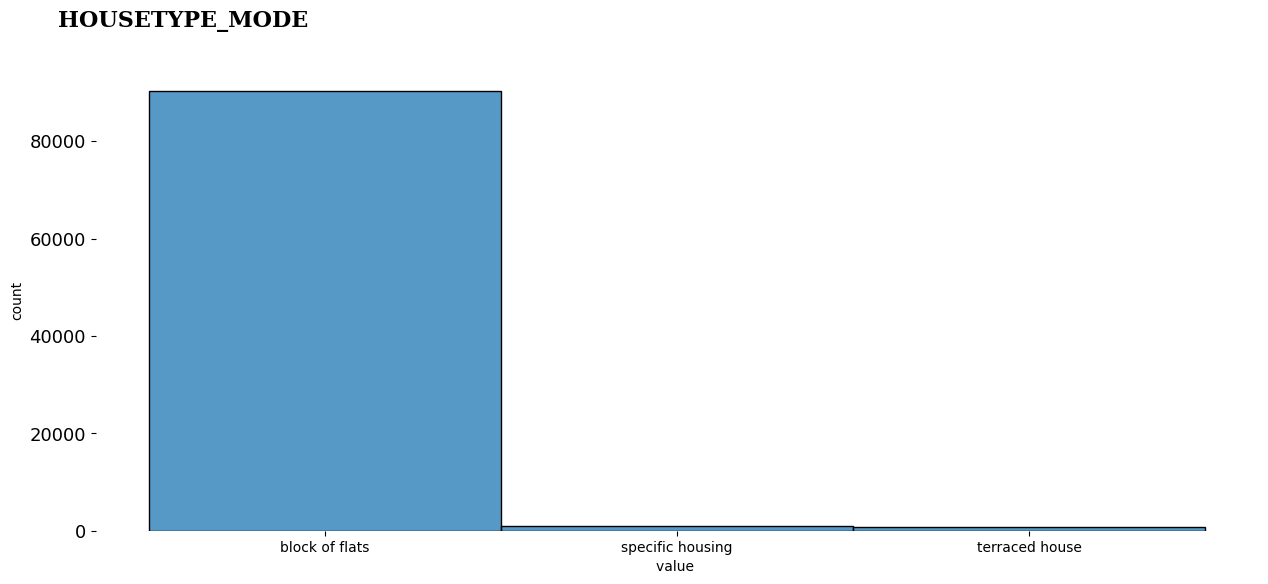

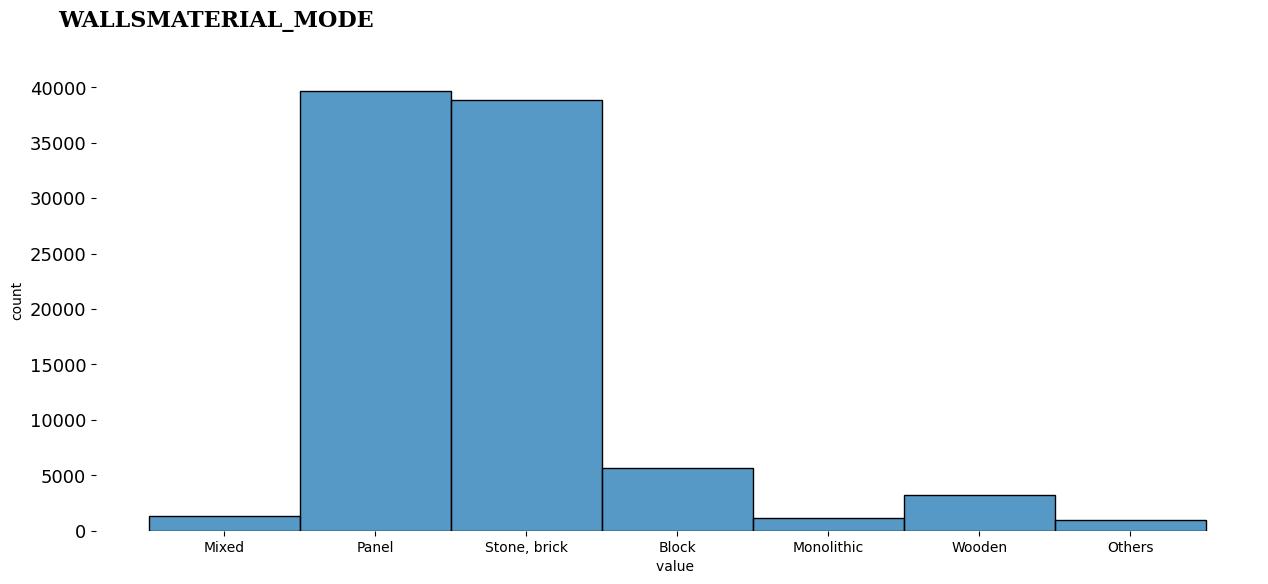

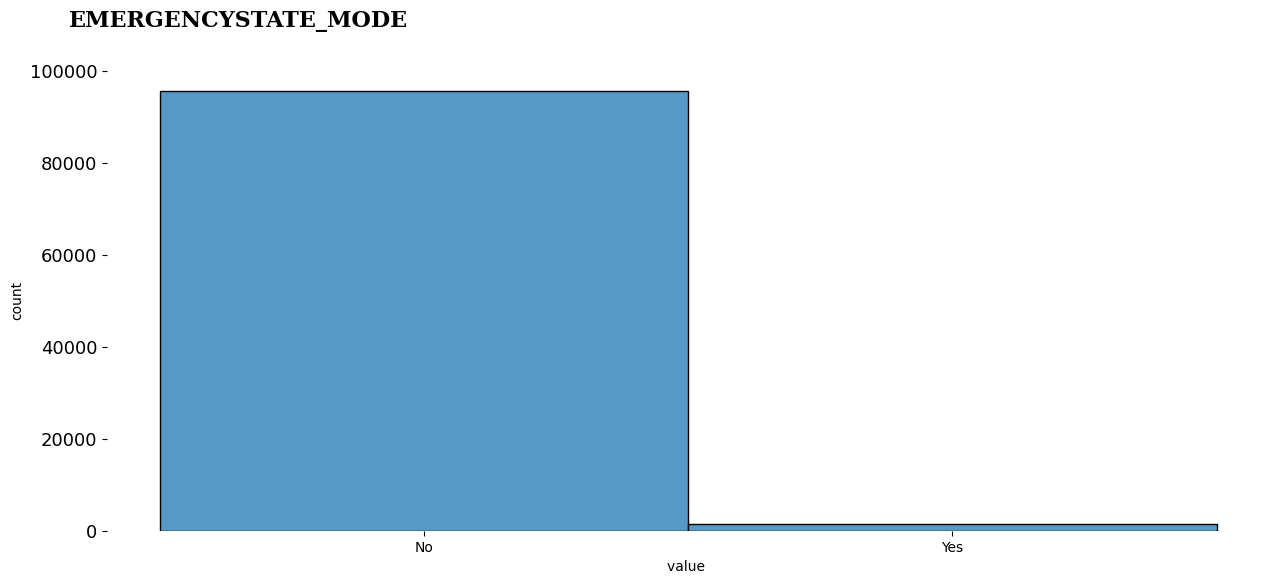

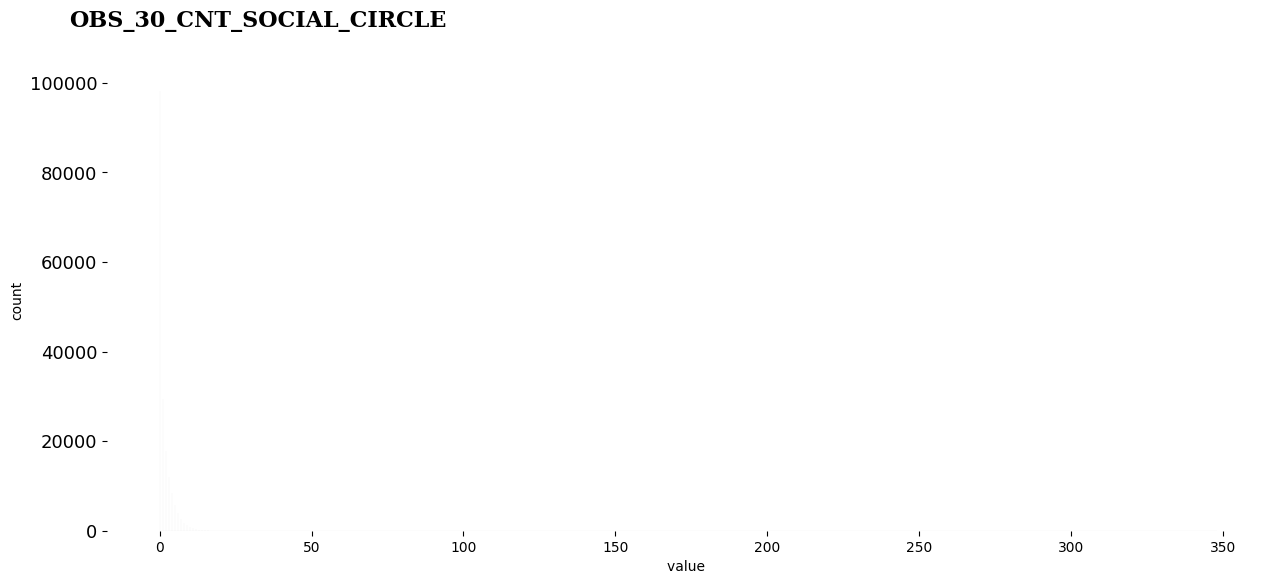

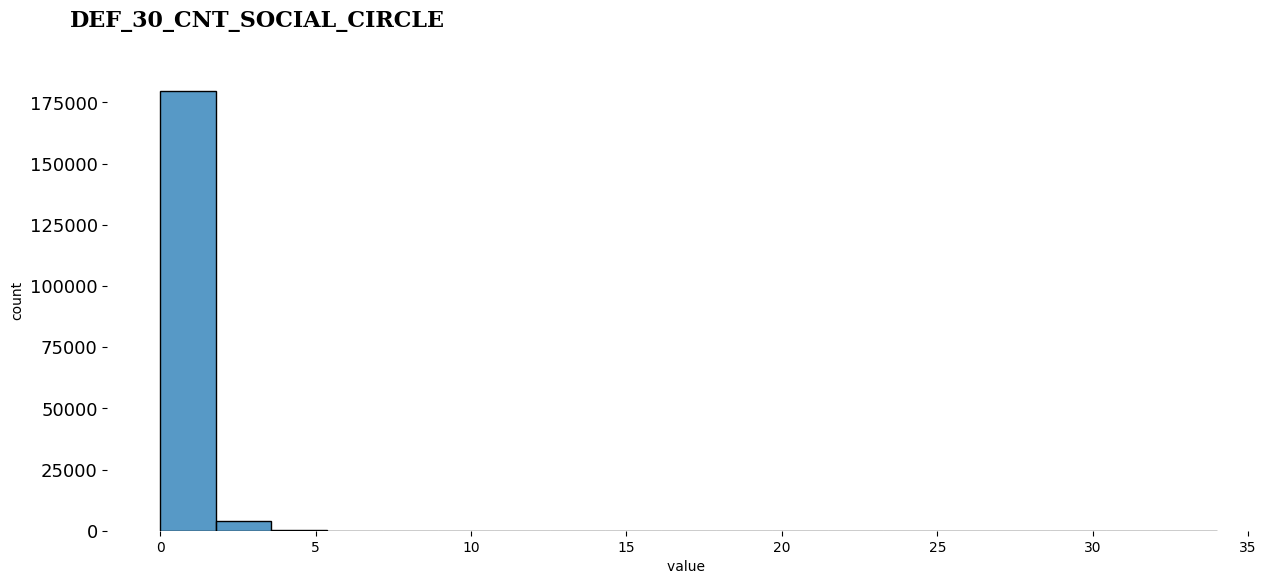

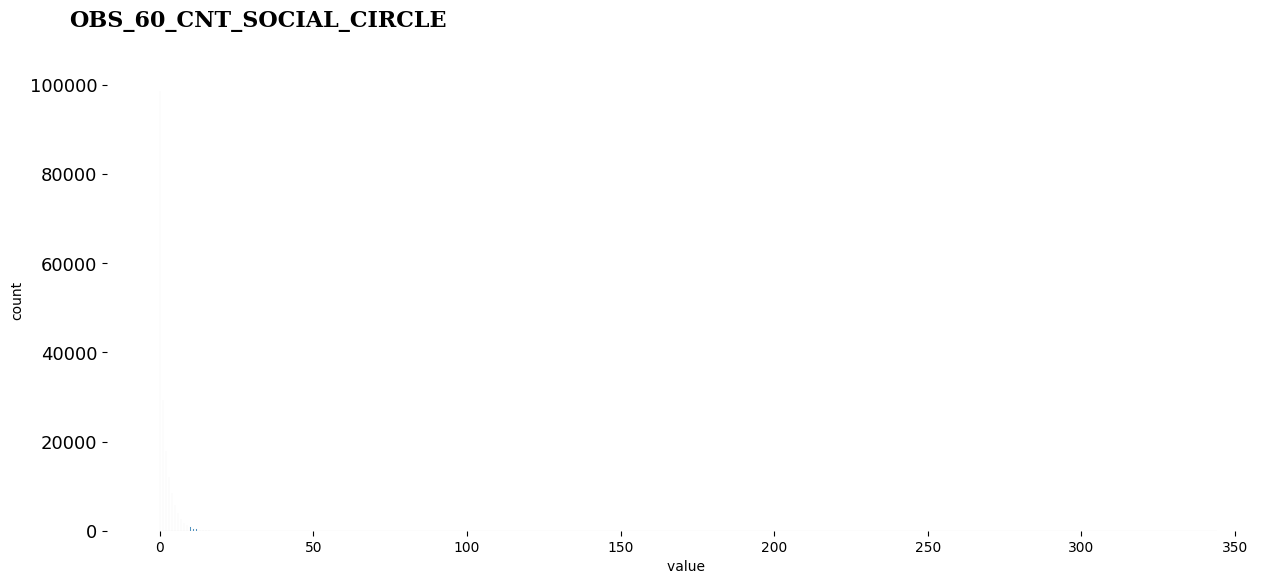

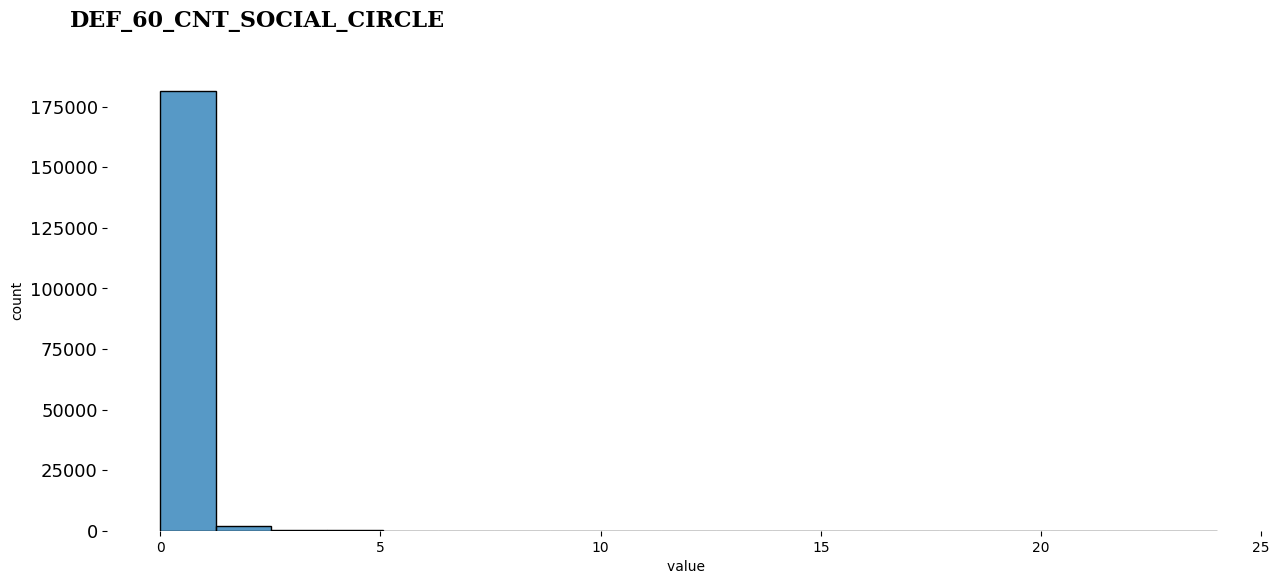

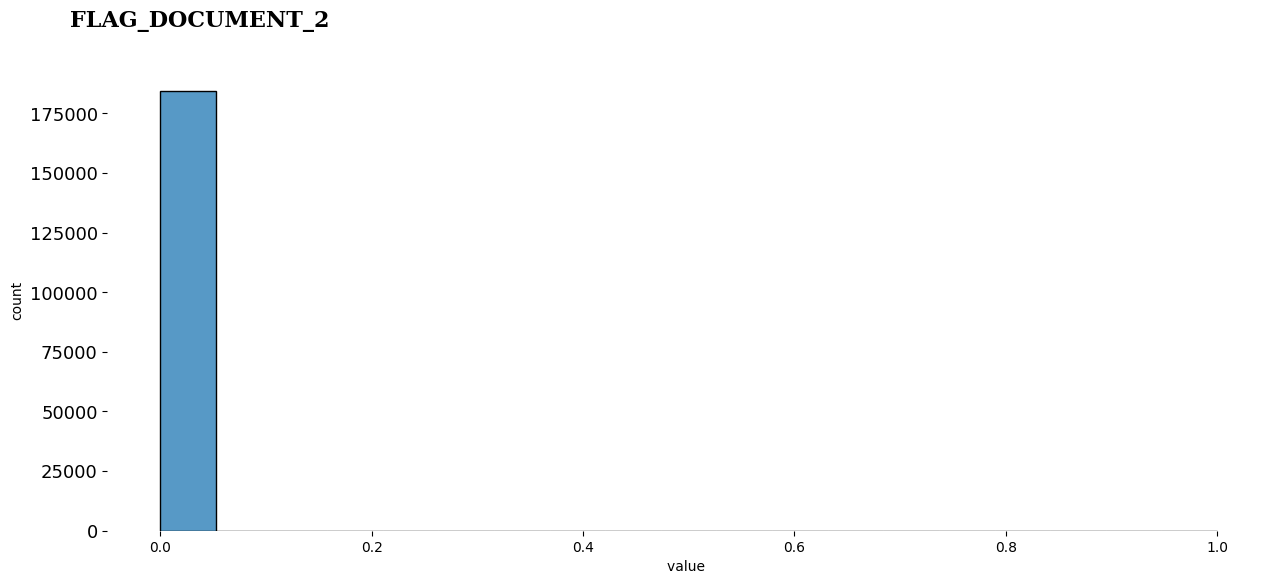

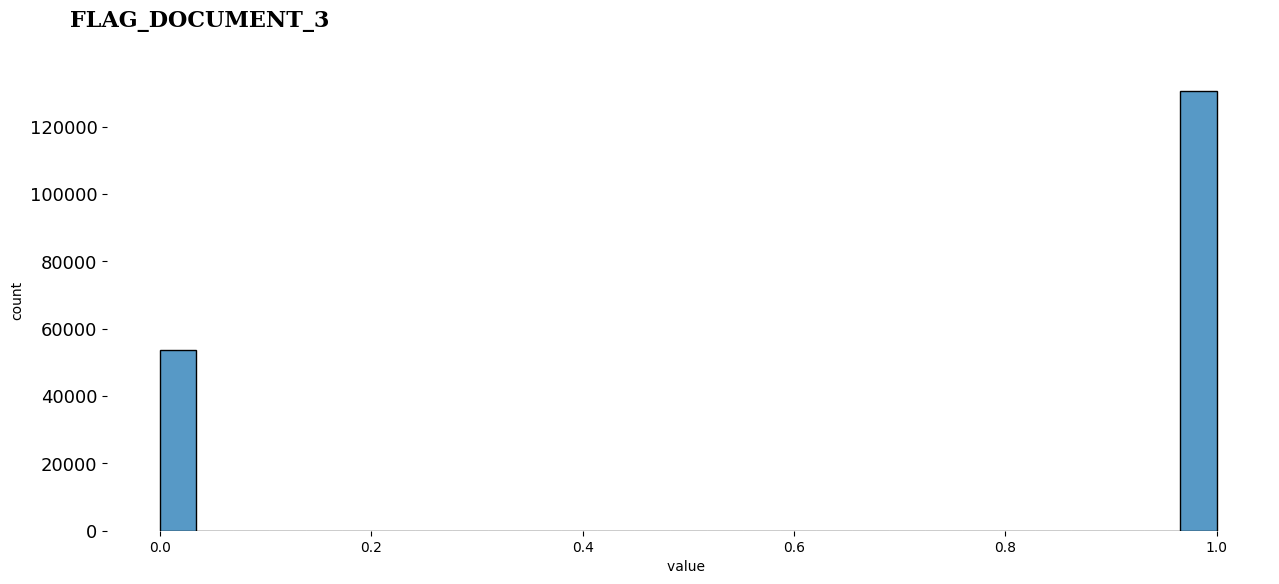

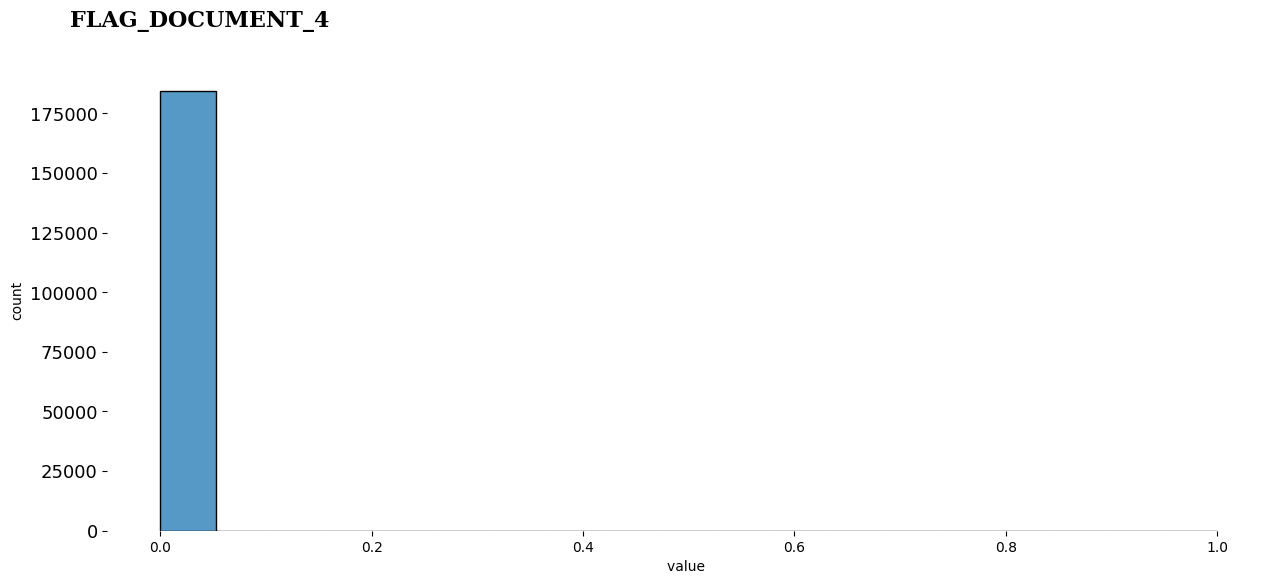

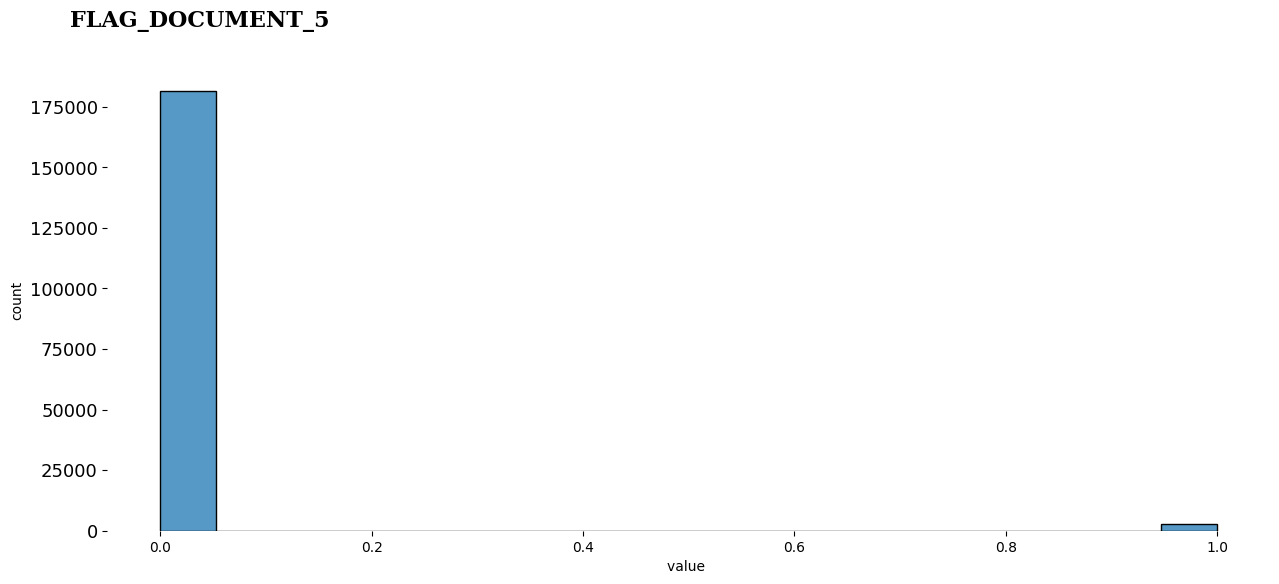

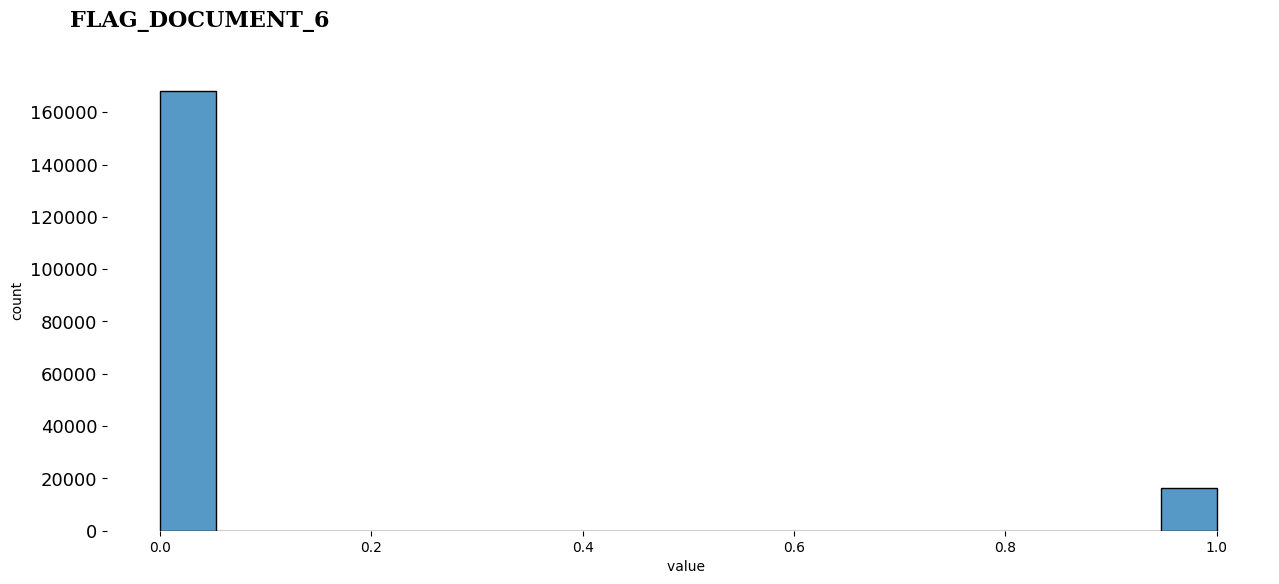

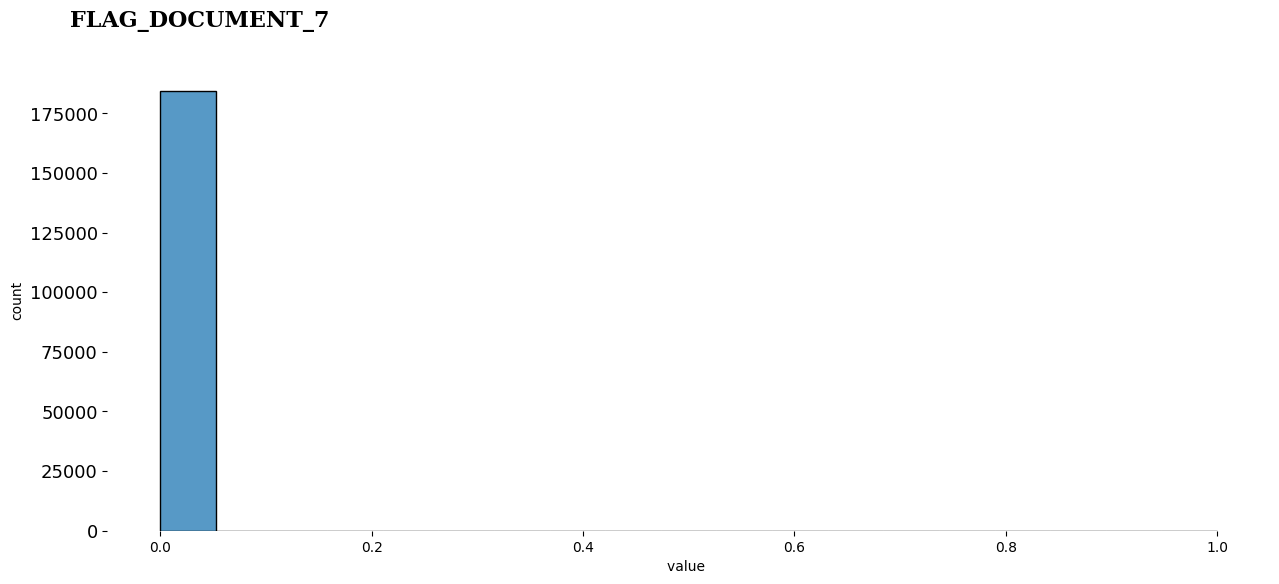

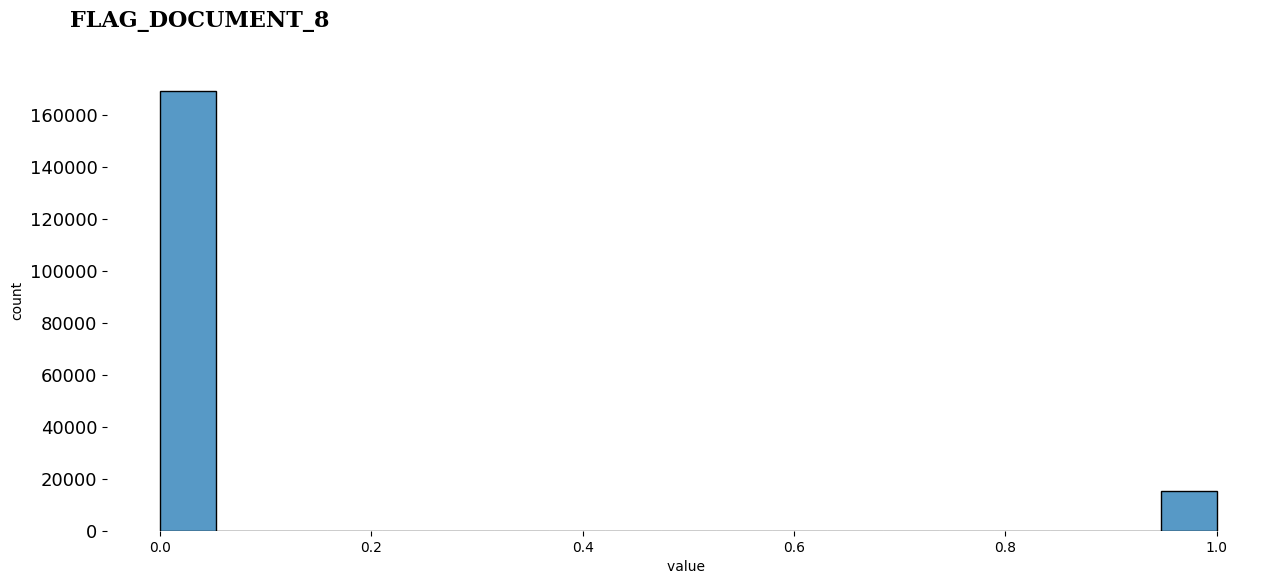

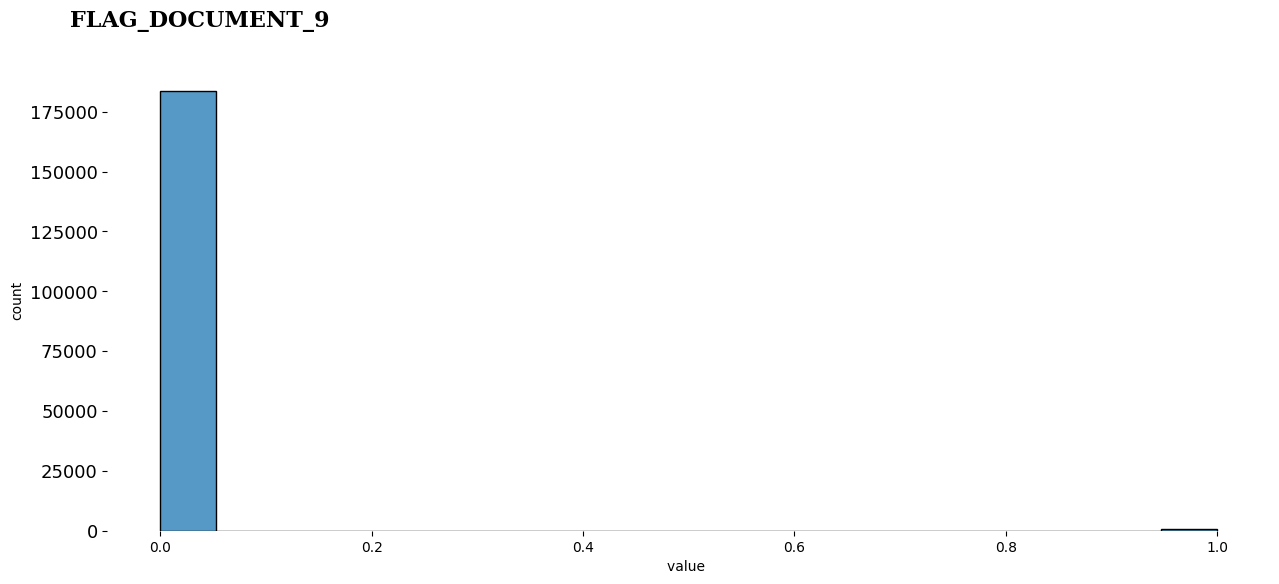

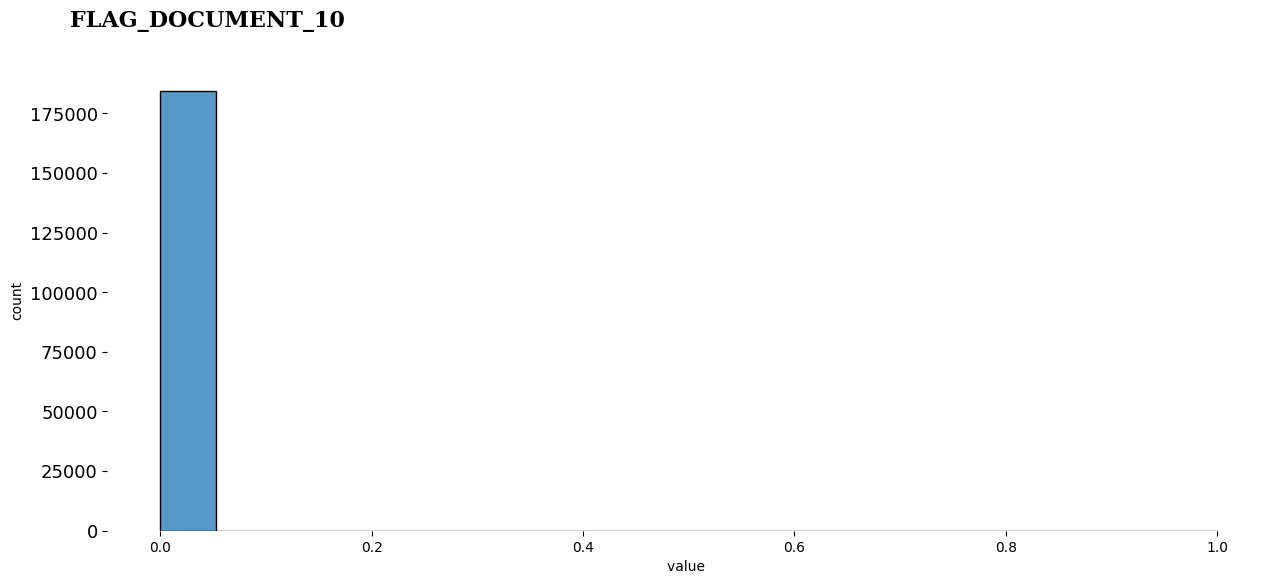

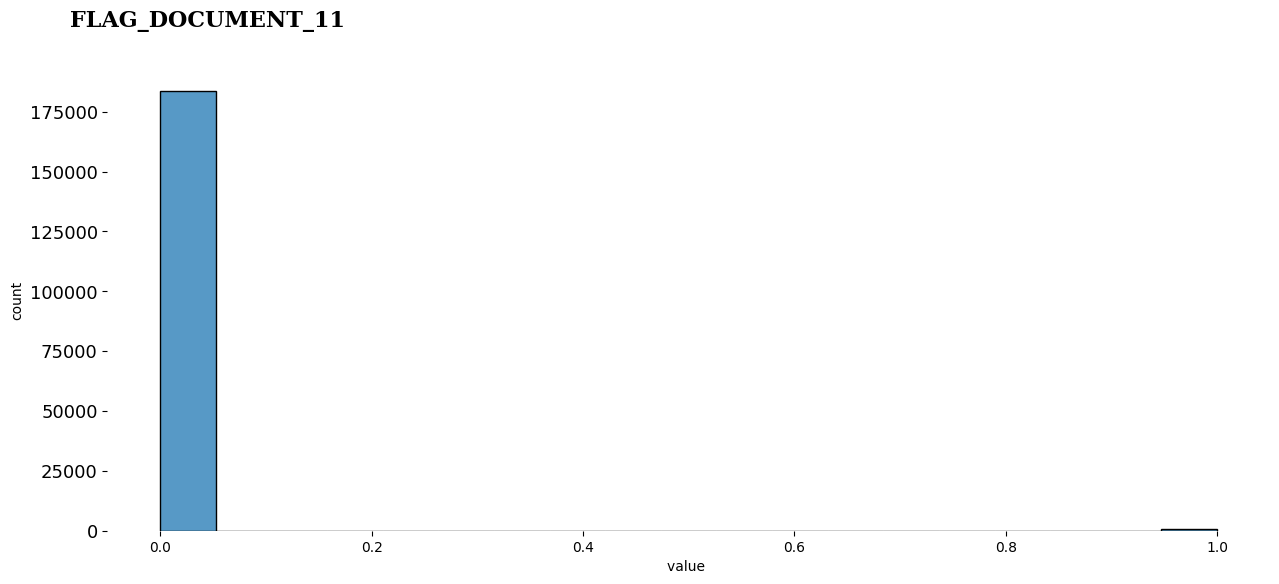

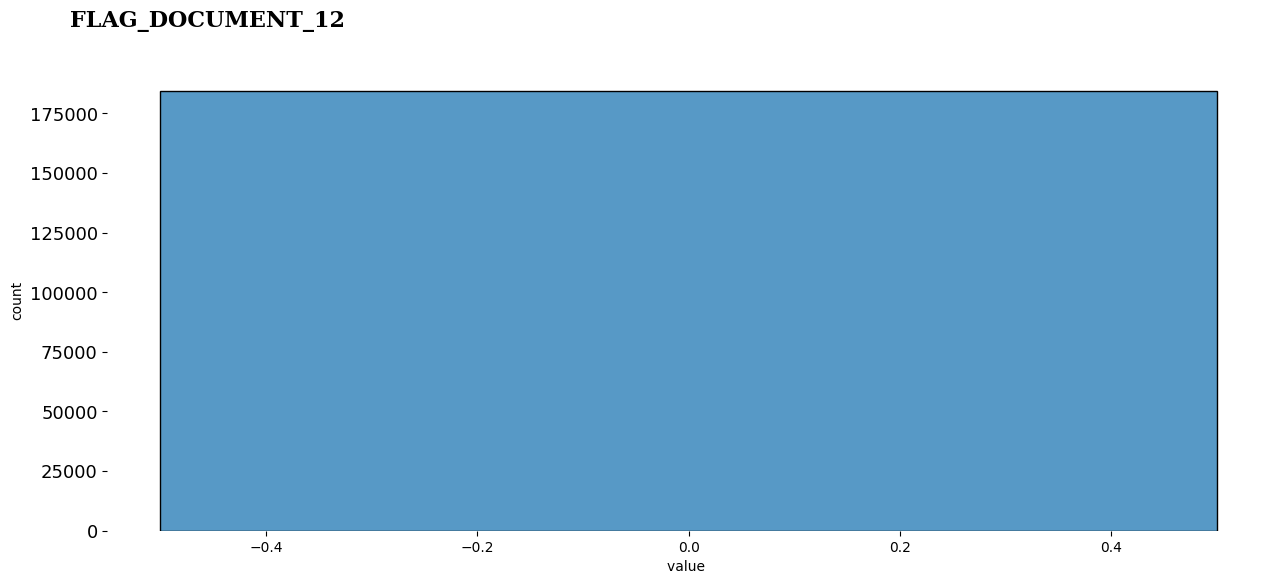

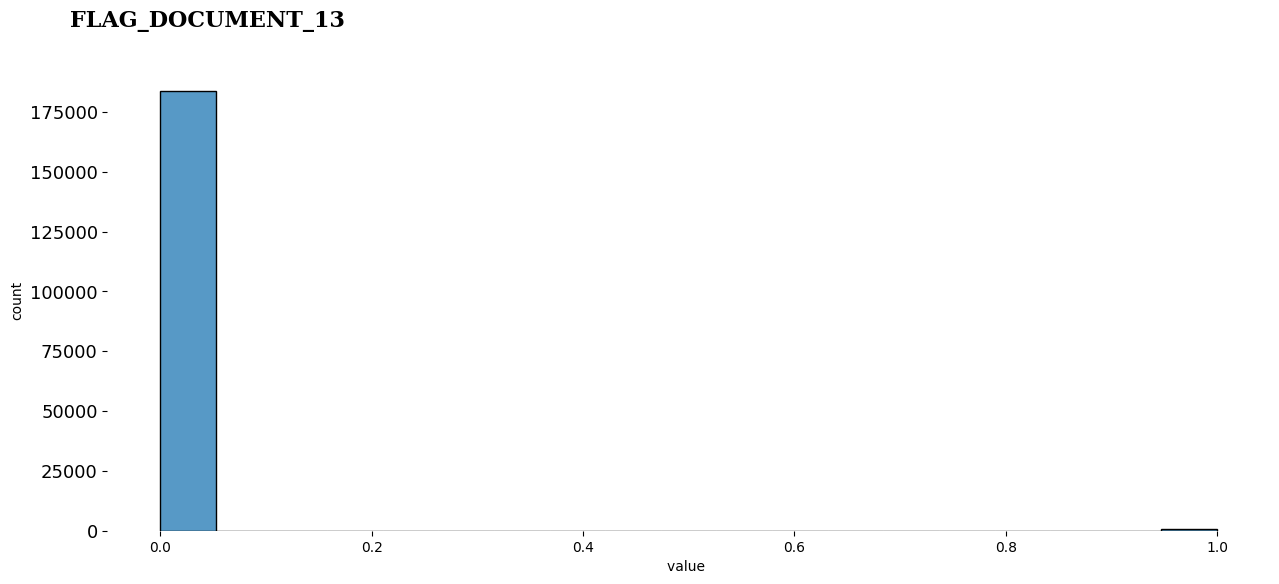

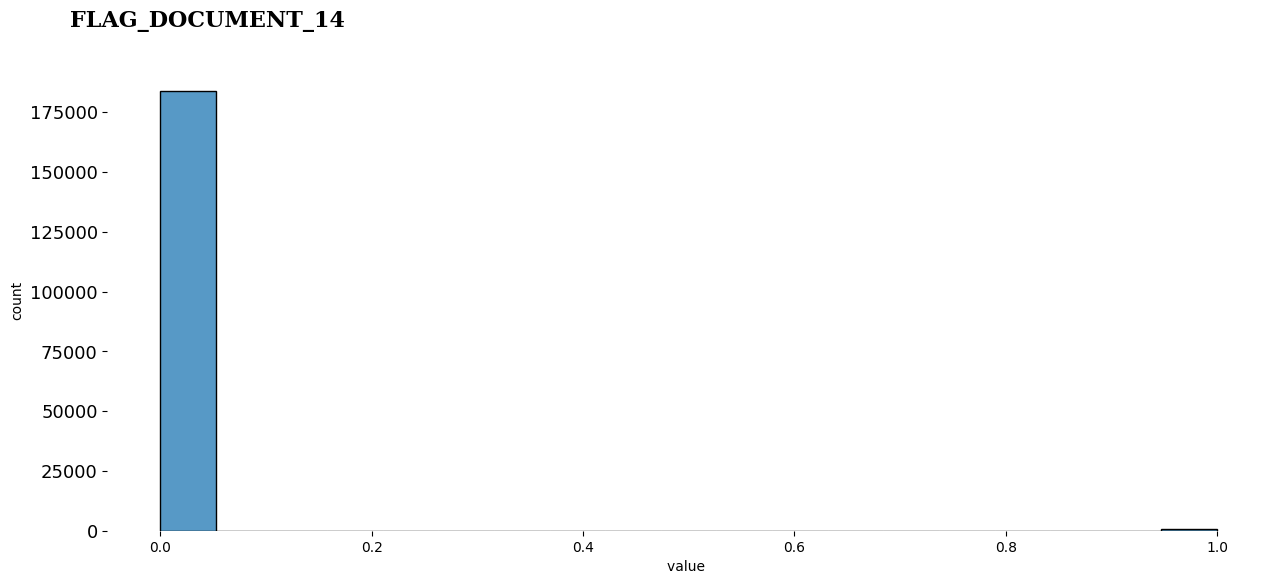

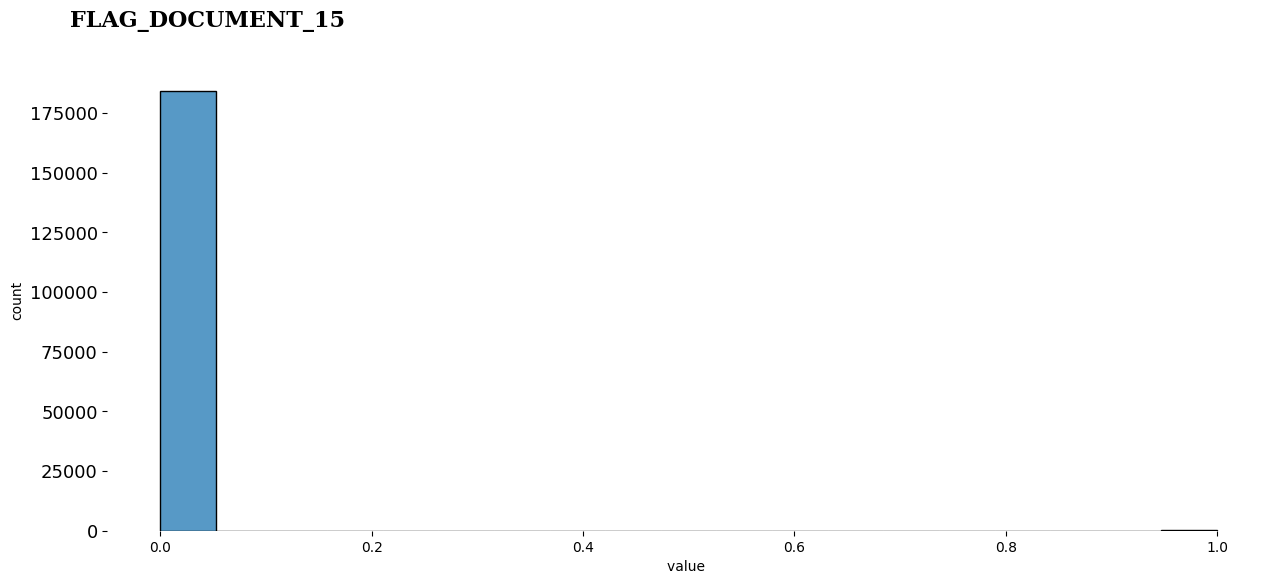

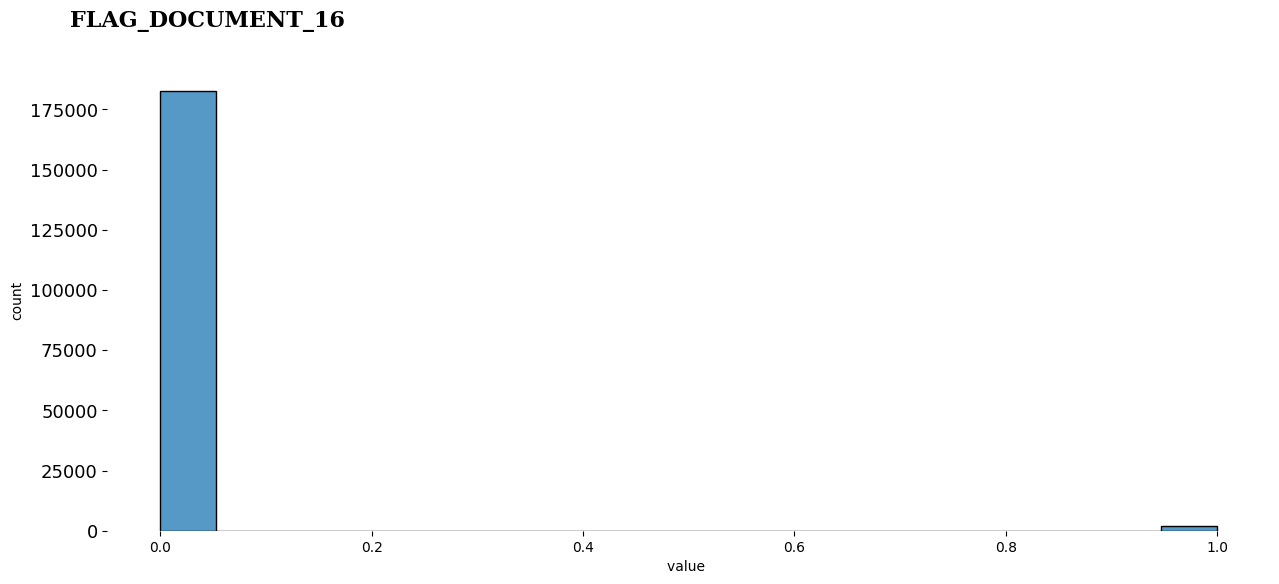

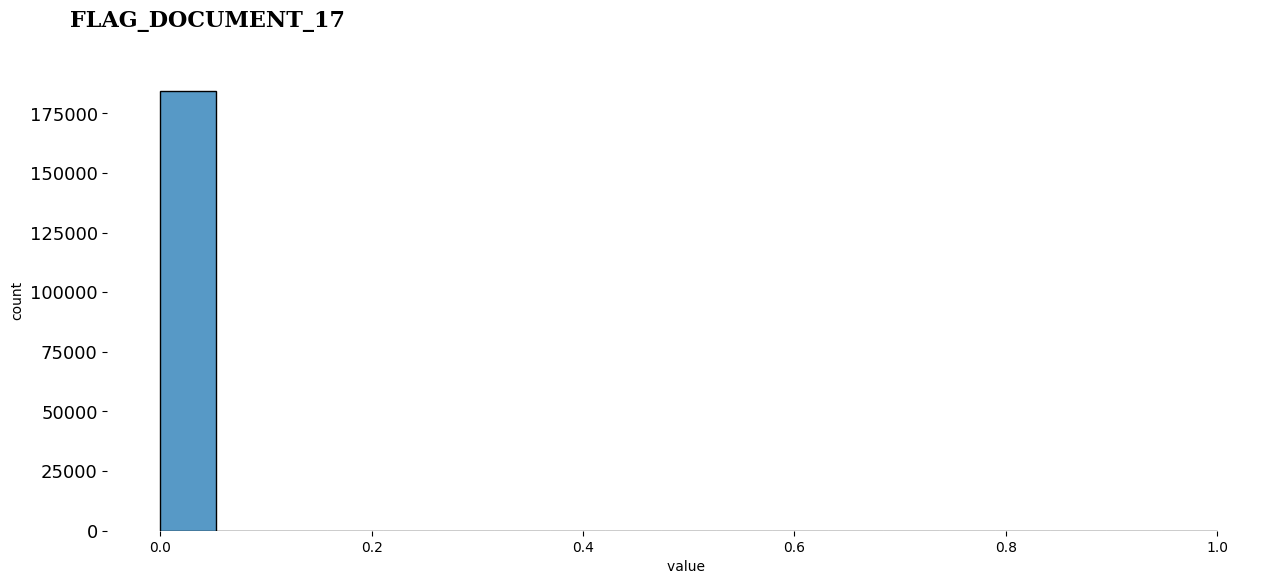

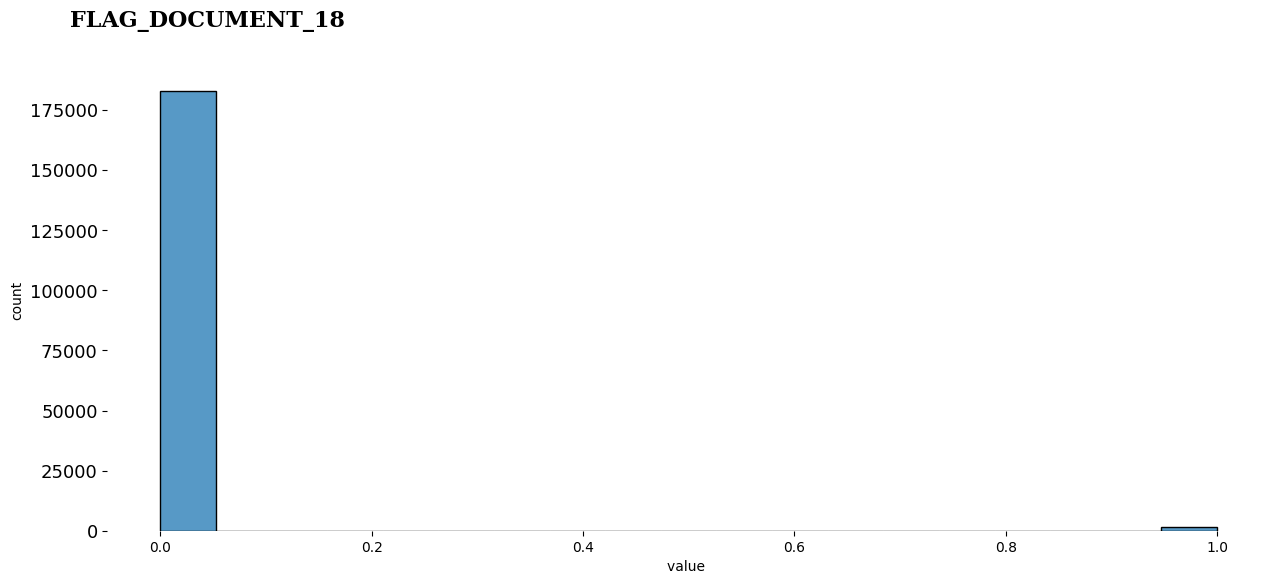

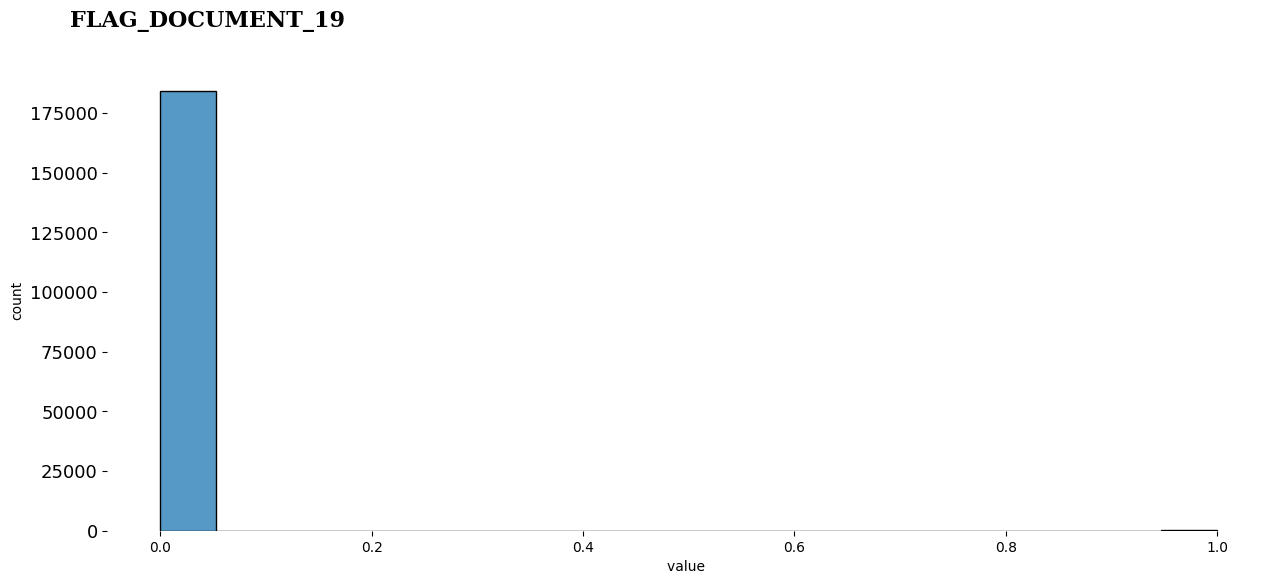

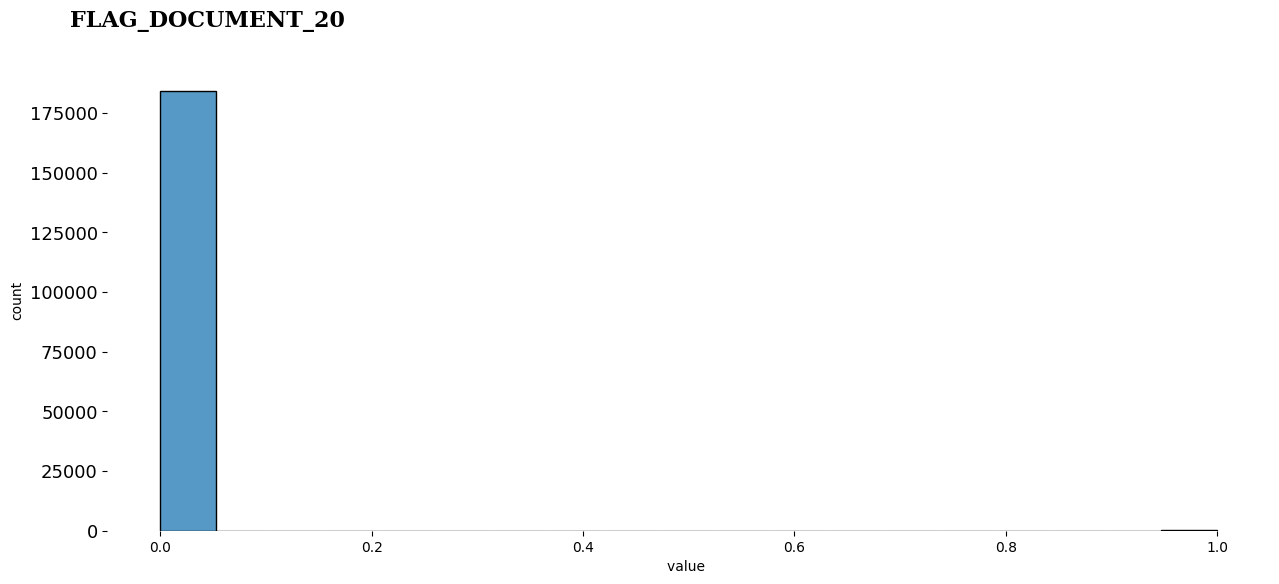

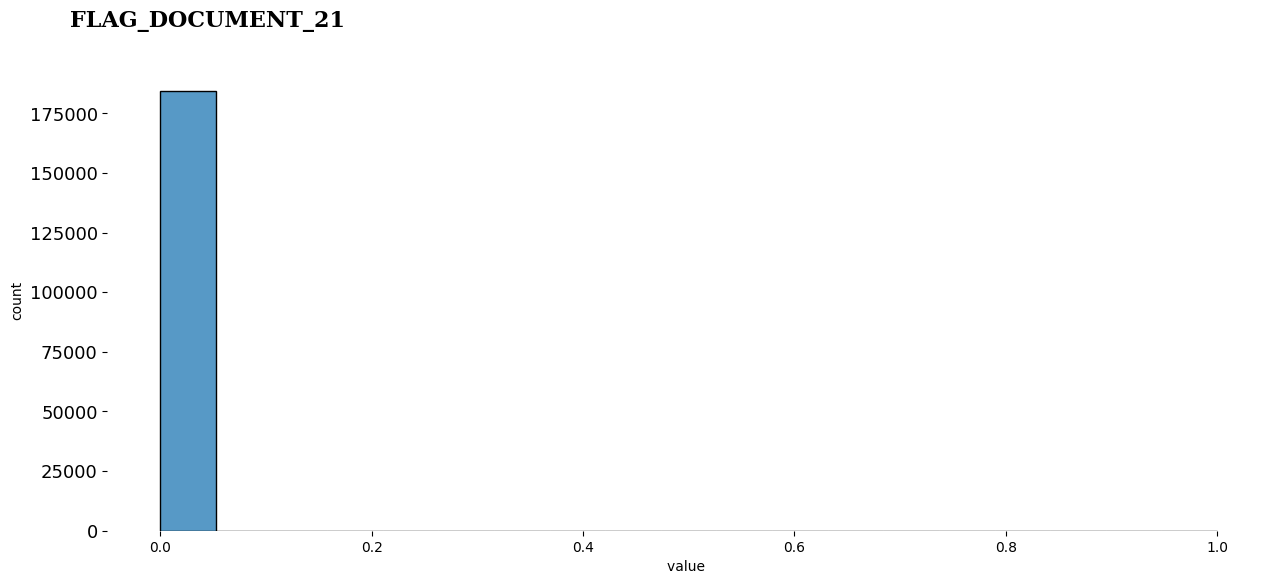

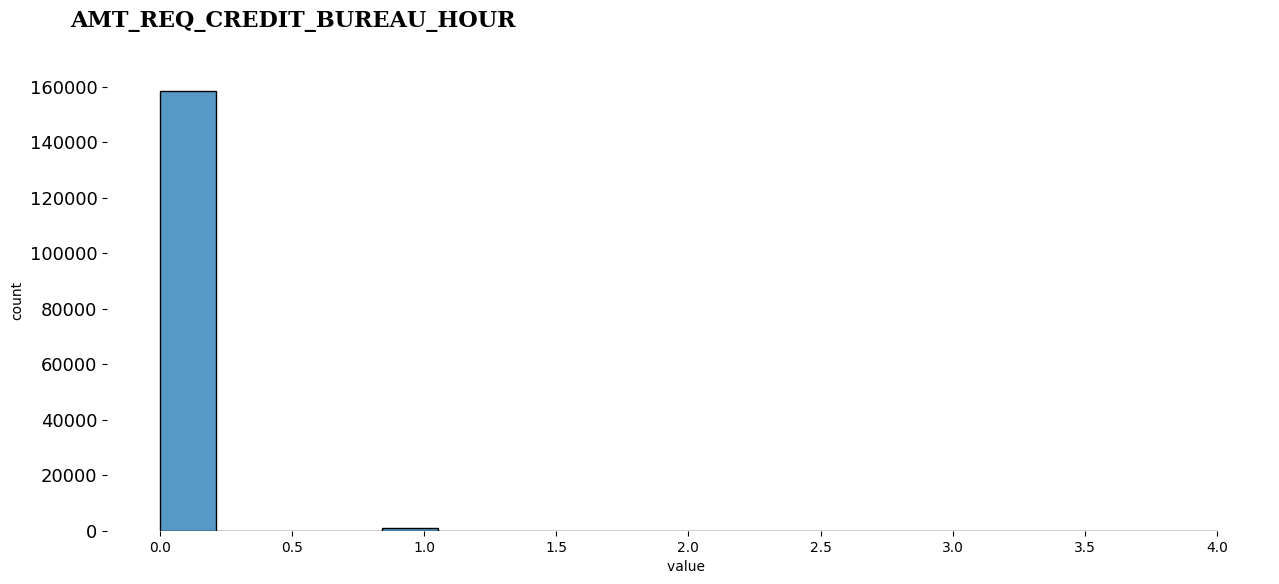

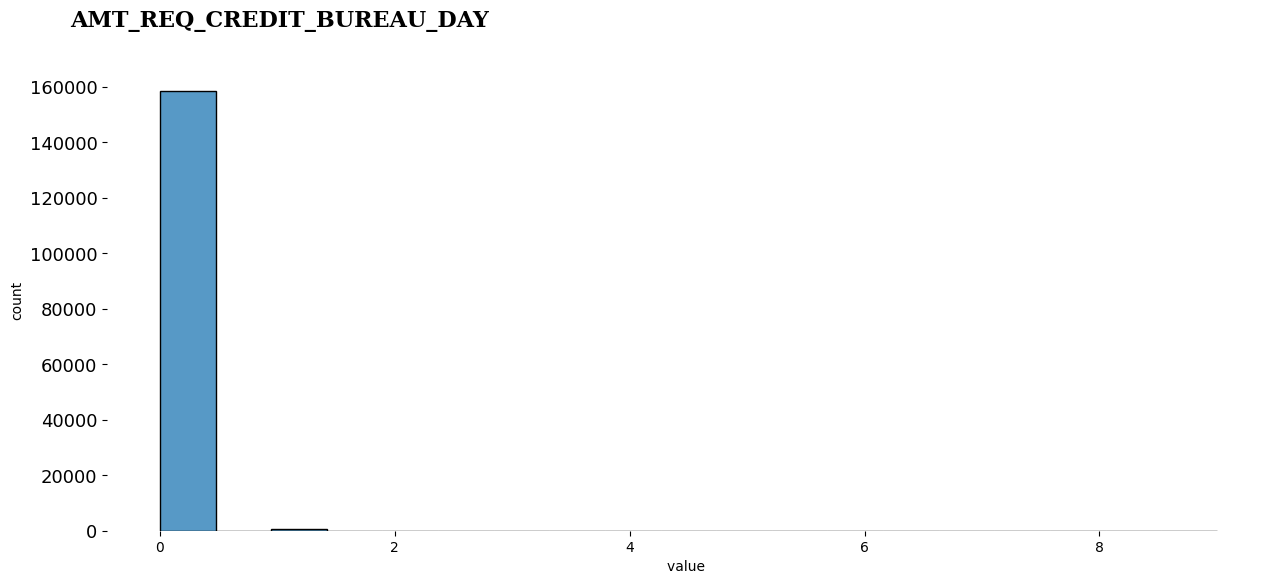

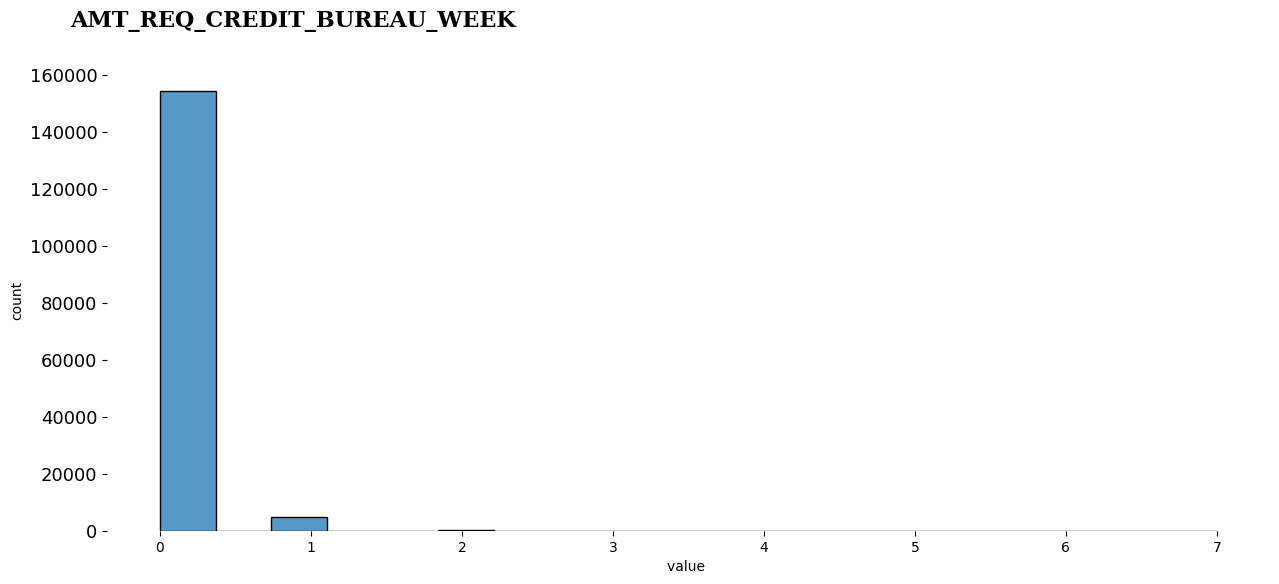

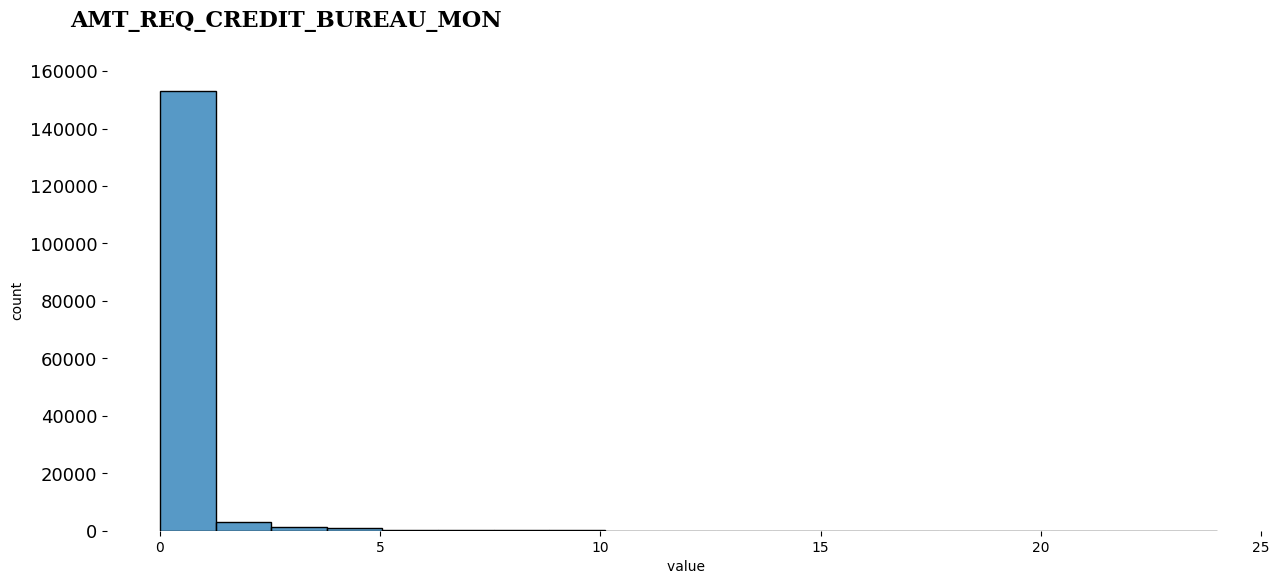

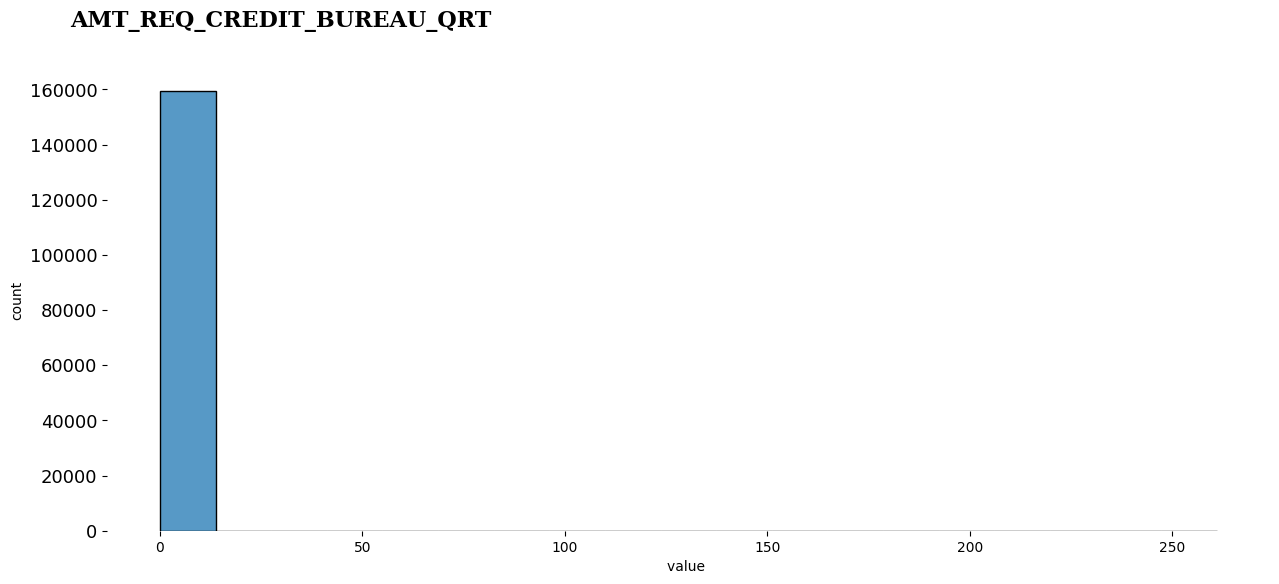

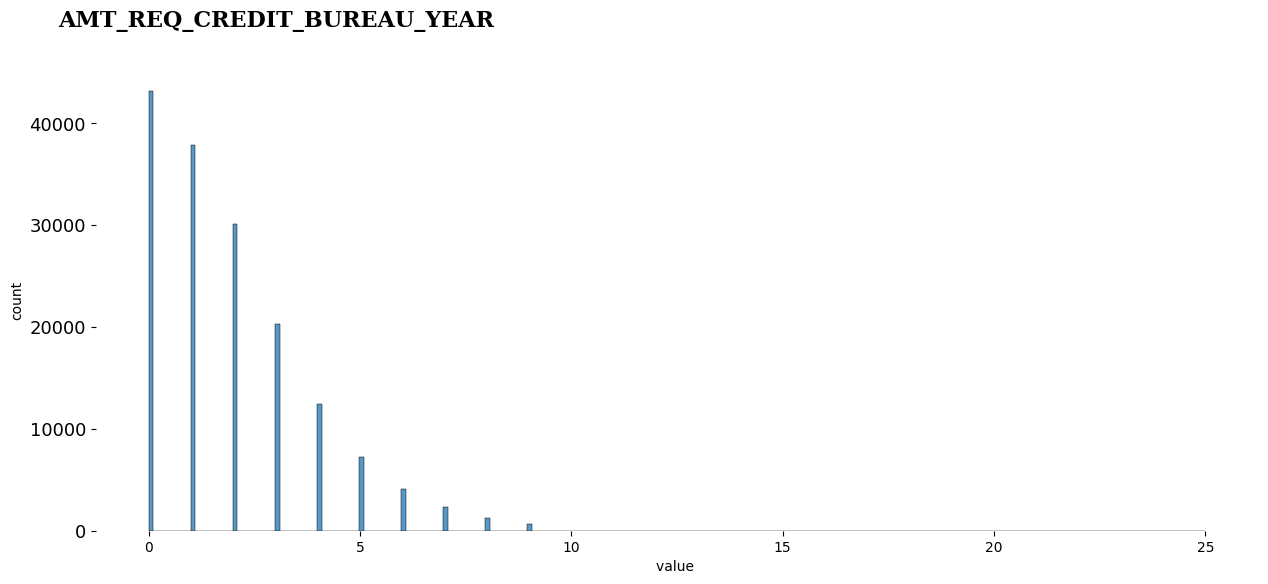

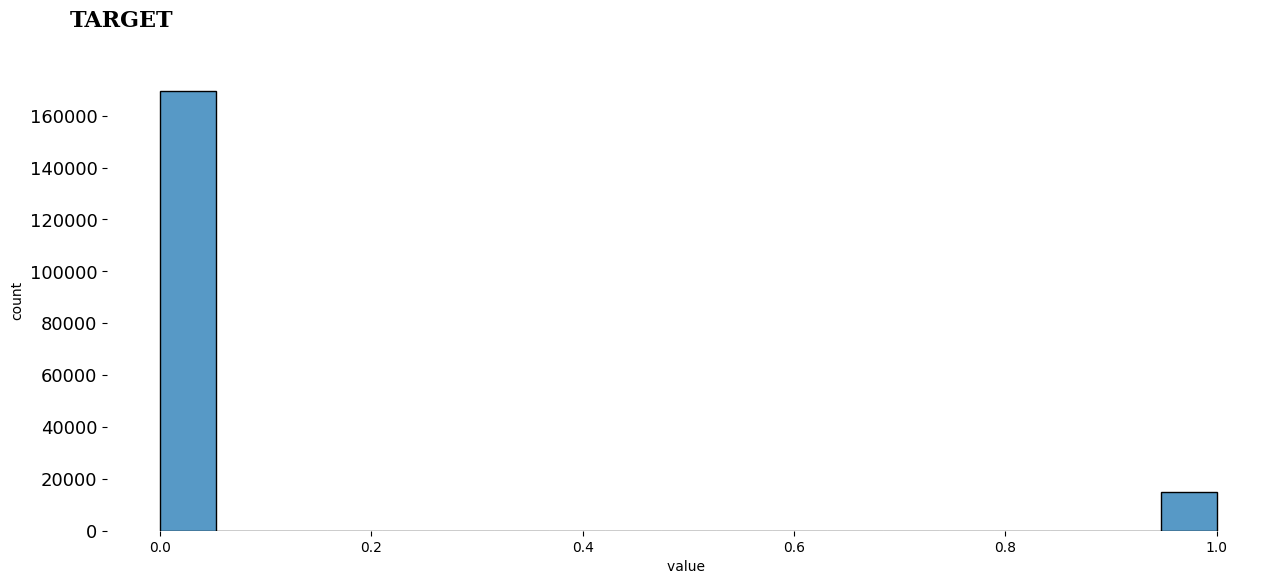

In [10]:
print('Drawing Histogram!!!')
for h in df.columns:
    if df[h].nunique() < 100:
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.histplot(df[h], palette='Blues_r')
        fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
        plt.box(False)

# PRE-PROCESSING

## DROPPING THE COLS WITH 60% NULLS VALUE

In [11]:
## Drop the columns that have > 60% NULL Values:
to_drop=[] #this is a list that stores the names of cols having more than 50% nulls
for features in df.columns:
    percentage = (df[features].isna().sum()/df.shape[0]) *100
    if df[features].isna().sum() > 0 and percentage > 60.0:
        to_drop.append(features)
        print(features,'    ' ,df[features].isna().sum(), percentage)
        df.drop(features,axis=1,inplace=True)


print('The shape of the dataframe is:- Rows: ',df.shape[0],' Columns: ',df.shape[1])

OWN_CAR_AGE      121633 65.92360140049645
YEARS_BUILD_AVG      122757 66.53279568144126
COMMONAREA_AVG      128971 69.90070783605952
FLOORSMIN_AVG      125244 67.88071932620078
LIVINGAPARTMENTS_AVG      126212 68.40536351121372
NONLIVINGAPARTMENTS_AVG      128146 69.45356790565076
YEARS_BUILD_MODE      122757 66.53279568144126
COMMONAREA_MODE      128971 69.90070783605952
FLOORSMIN_MODE      125244 67.88071932620078
LIVINGAPARTMENTS_MODE      126212 68.40536351121372
NONLIVINGAPARTMENTS_MODE      128146 69.45356790565076
YEARS_BUILD_MEDI      122757 66.53279568144126
COMMONAREA_MEDI      128971 69.90070783605952
FLOORSMIN_MEDI      125244 67.88071932620078
LIVINGAPARTMENTS_MEDI      126212 68.40536351121372
NONLIVINGAPARTMENTS_MEDI      128146 69.45356790565076
FONDKAPREMONT_MODE      126254 68.42812699858
The shape of the dataframe is:- Rows:  184506  Columns:  105


In [12]:
##Check for duplicate data rows and drop the Id Column

df.drop('SK_ID_CURR',axis= 1,inplace= True)

countDuplicateRows = df[df.duplicated(subset = None, keep= False)].shape[0]
print('The number of Duplicate Rows present here are: ',countDuplicateRows)

The number of Duplicate Rows present here are:  0


### REPLACE THE ABSURD VALUES BY NAN VALUES

In [13]:
## Finding absurd values here.
for i in df.columns:
    if df[i].dtype == 'object':
        print("Feature name: ",i," Unique values are: ",df[i].unique())

## Replace them by nan values.
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA',np.nan)
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace('Other_A',np.nan)
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace('Other_B',np.nan)
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown',np.nan)
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA',np.nan)

Feature name:  NAME_CONTRACT_TYPE  Unique values are:  ['Cash loans' 'Revolving loans']
Feature name:  CODE_GENDER  Unique values are:  ['F' 'M' 'XNA']
Feature name:  FLAG_OWN_CAR  Unique values are:  ['N' 'Y']
Feature name:  FLAG_OWN_REALTY  Unique values are:  ['Y' 'N']
Feature name:  NAME_TYPE_SUITE  Unique values are:  ['Family' 'Unaccompanied' 'Spouse, partner' 'Children' nan 'Other_A'
 'Other_B' 'Group of people']
Feature name:  NAME_INCOME_TYPE  Unique values are:  ['Commercial associate' 'Working' 'Pensioner' 'State servant' 'Student'
 'Businessman' 'Unemployed' 'Maternity leave']
Feature name:  NAME_EDUCATION_TYPE  Unique values are:  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Feature name:  NAME_FAMILY_STATUS  Unique values are:  ['Married' 'Civil marriage' 'Single / not married' 'Separated' 'Widow'
 'Unknown']
Feature name:  NAME_HOUSING_TYPE  Unique values are:  ['House / apartment' 'With parents' 'Municipal

In [14]:
## Checking for the NULL if it is still existing.
for i in df.columns:
    if df[i].isna().sum() > 0:
        print(i,df[i].dtype,df[i].isna().sum())

CODE_GENDER object 2
AMT_ANNUITY float64 6
AMT_GOODS_PRICE float64 167
NAME_TYPE_SUITE object 2379
NAME_FAMILY_STATUS object 1
OCCUPATION_TYPE object 57867
CNT_FAM_MEMBERS float64 1
ORGANIZATION_TYPE object 33236
EXT_SOURCE_1 float64 104074
EXT_SOURCE_2 float64 413
EXT_SOURCE_3 float64 36656
APARTMENTS_AVG float64 93575
BASEMENTAREA_AVG float64 107975
YEARS_BEGINEXPLUATATION_AVG float64 89900
ELEVATORS_AVG float64 98320
ENTRANCES_AVG float64 92807
FLOORSMAX_AVG float64 91726
LANDAREA_AVG float64 109543
LIVINGAREA_AVG float64 92534
NONLIVINGAREA_AVG float64 101788
APARTMENTS_MODE float64 93575
BASEMENTAREA_MODE float64 107975
YEARS_BEGINEXPLUATATION_MODE float64 89900
ELEVATORS_MODE float64 98320
ENTRANCES_MODE float64 92807
FLOORSMAX_MODE float64 91726
LANDAREA_MODE float64 109543
LIVINGAREA_MODE float64 92534
NONLIVINGAREA_MODE float64 101788
APARTMENTS_MEDI float64 93575
BASEMENTAREA_MEDI float64 107975
YEARS_BEGINEXPLUATATION_MEDI float64 89900
ELEVATORS_MEDI float64 98320
ENTRANCES

In [15]:
## Removing the NULL values from the categorical data:

# from sklearn.impute import SimpleImputer
# impt = SimpleImputer(strategy= 'most_frequent')

for i in df.columns:
    if df[i].dtype == 'object' and df[i].isna().sum() > 0:
        df[i] = df[i].fillna(df[i].mode()[0])


In [16]:
## Removing the null values for the non-categorical data: (Median as it may contain some outliers.)

for i in df.columns:
    if df[i].dtype != 'object':
        df[i] = df[i].fillna(int(df[i].median()))


### CHANGING THE -VE VALUES TO +VE FOR BETTER READABILITY

In [17]:
## Removing the negative values
#DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH

df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs()
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].abs()
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].abs()
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].abs() 

### DIVIDE INTO X AND Y

In [18]:
## Break the dataset into X and Y
x = df.drop('TARGET',axis= 1)
y = df['TARGET']

## Checking for the Outliers

Before Removing Outliers


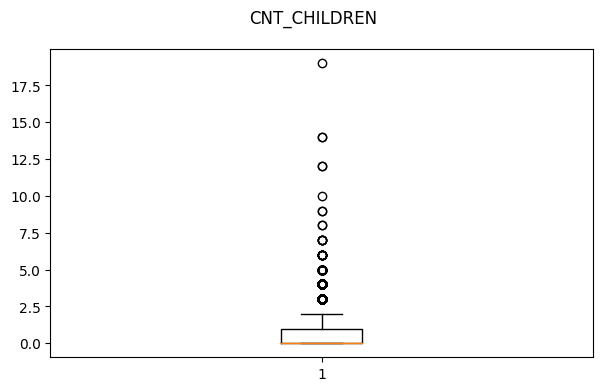

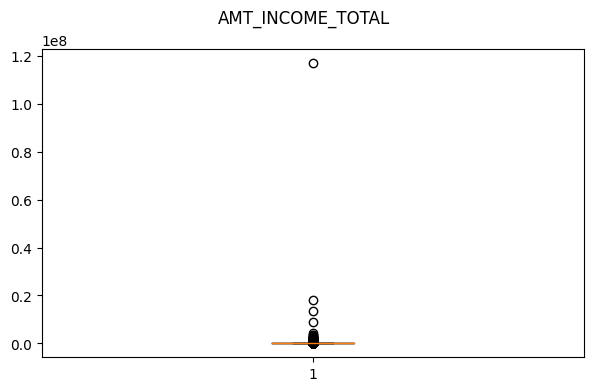

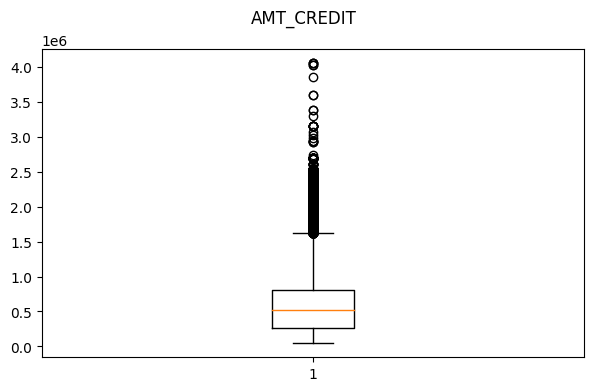

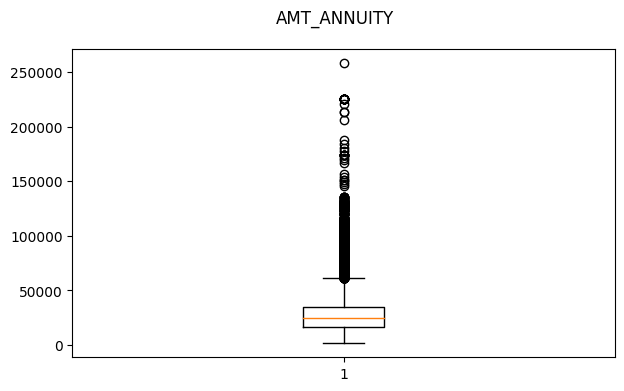

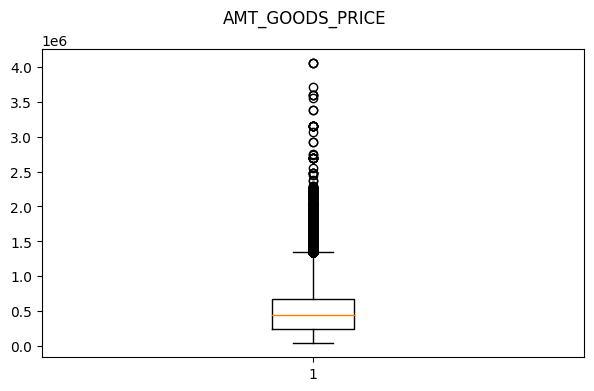

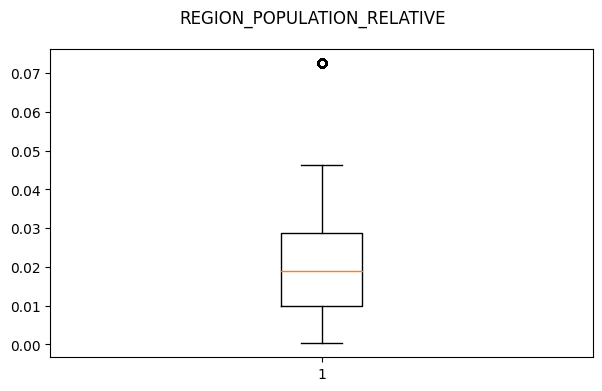

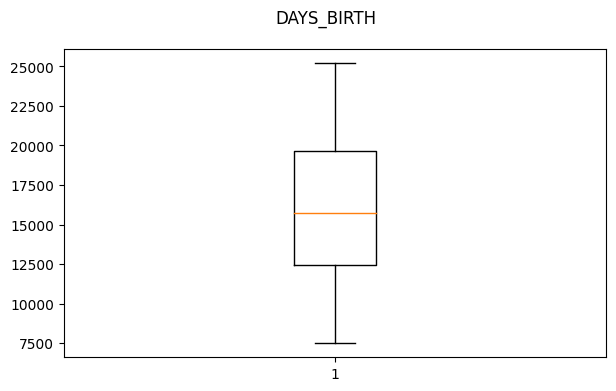

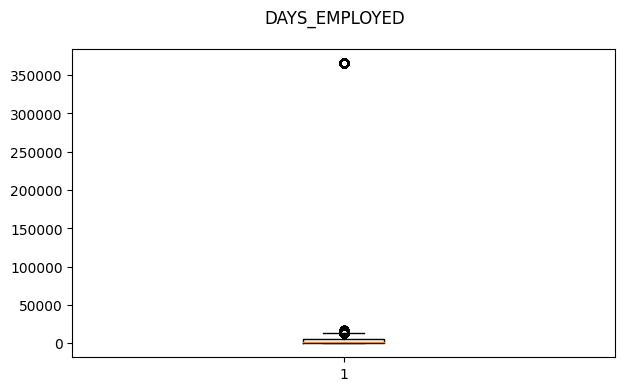

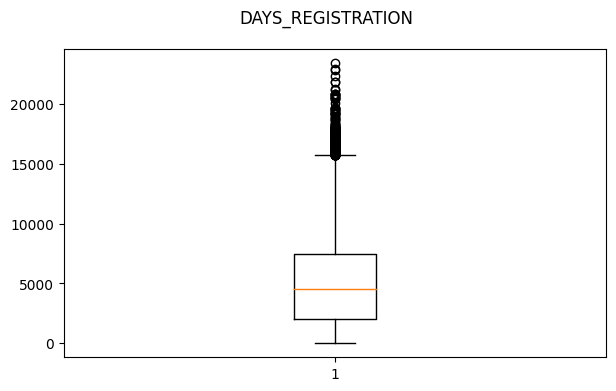

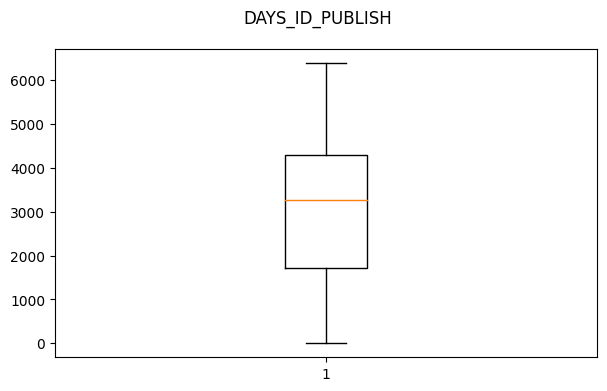

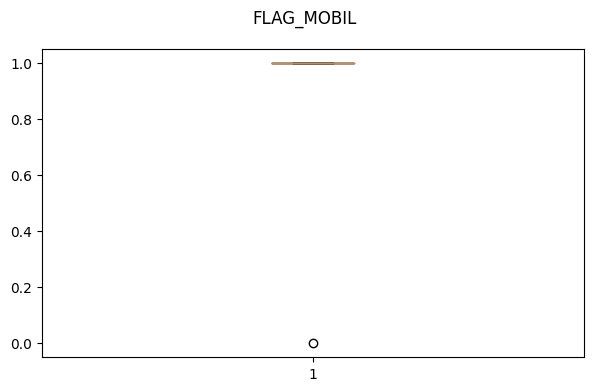

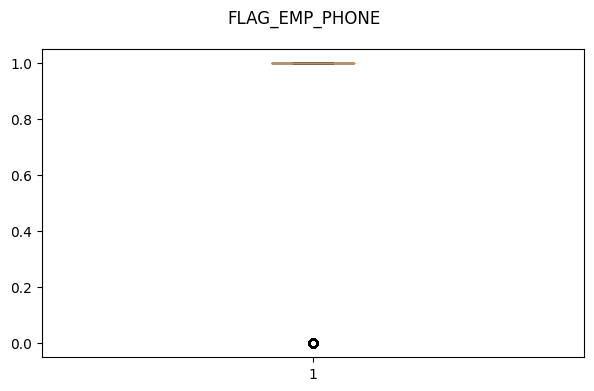

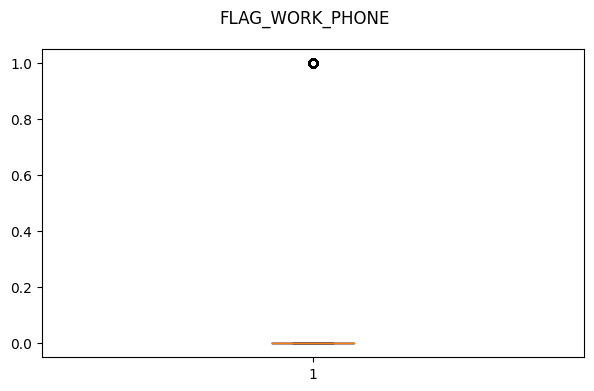

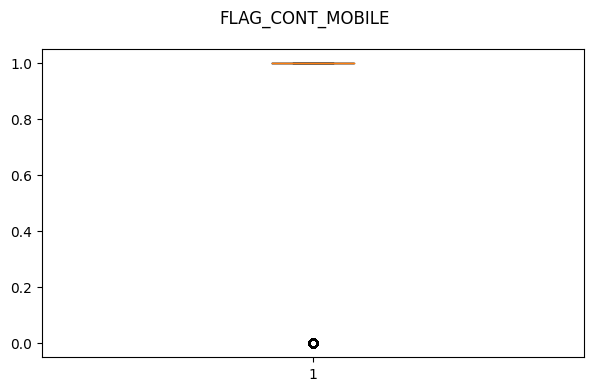

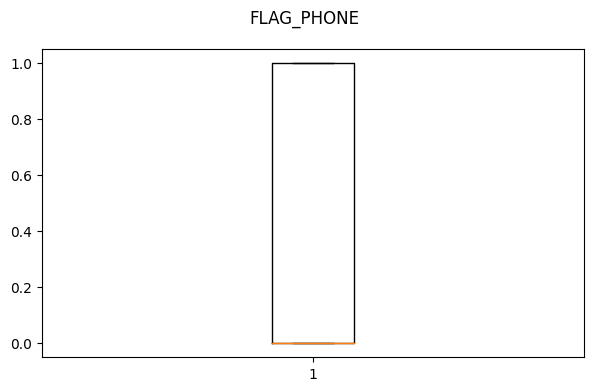

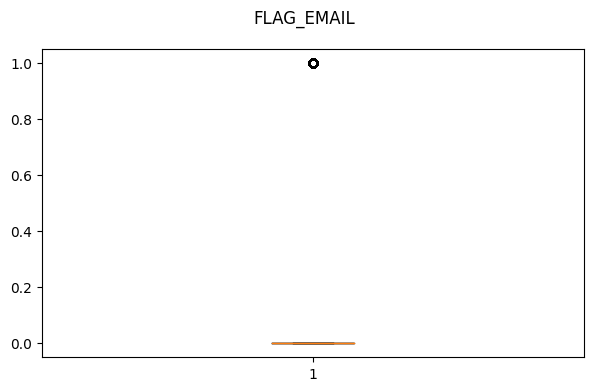

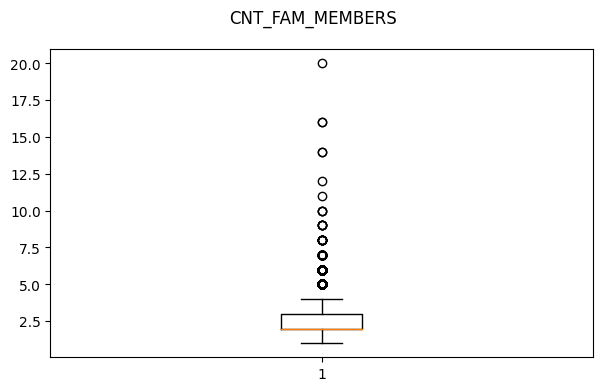

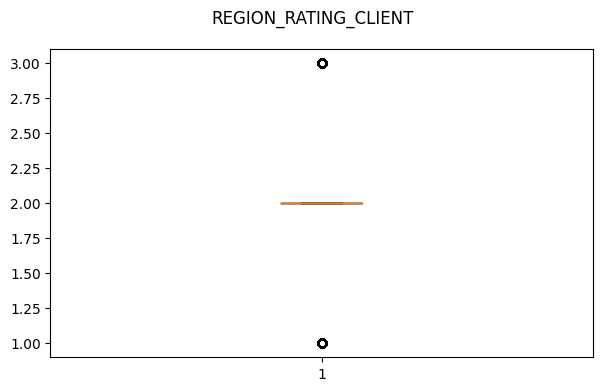

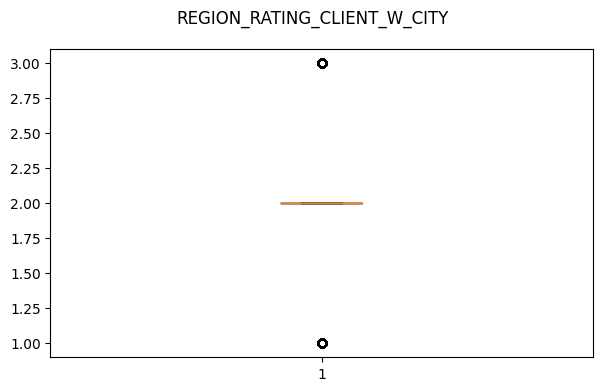

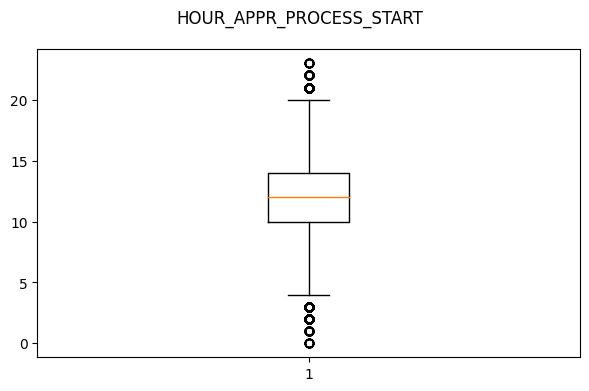

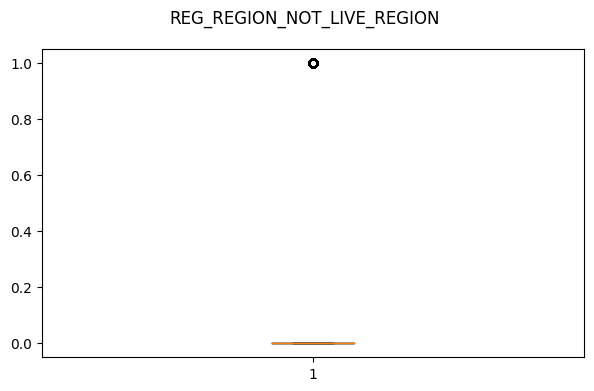

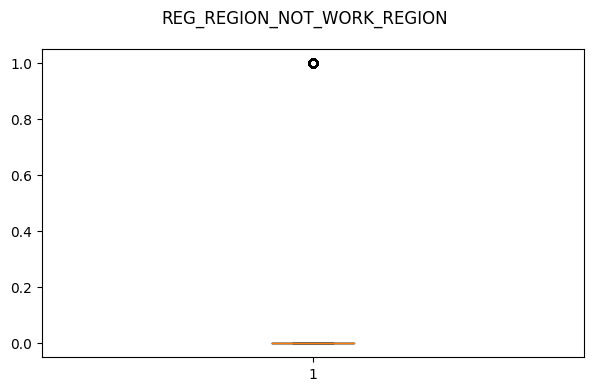

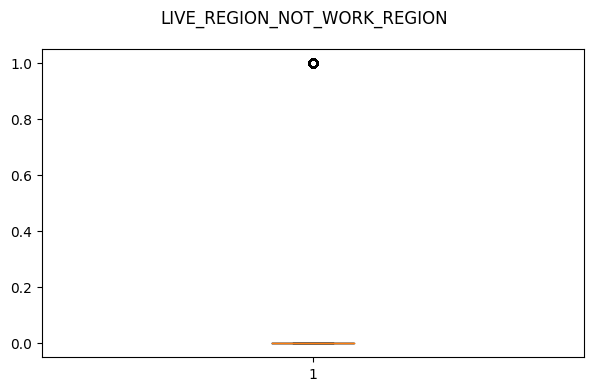

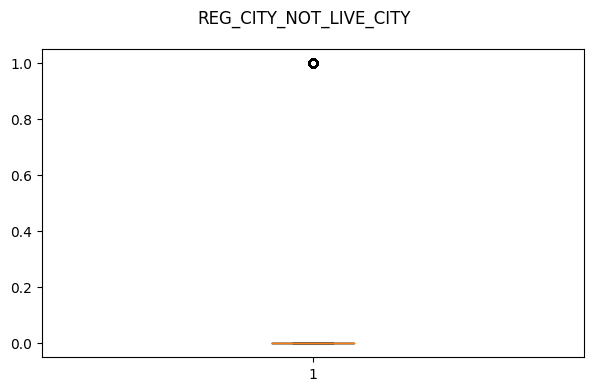

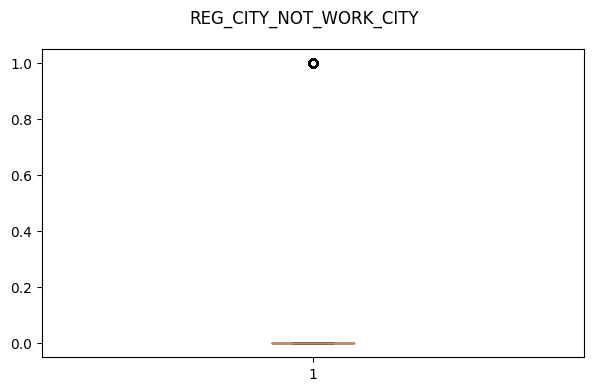

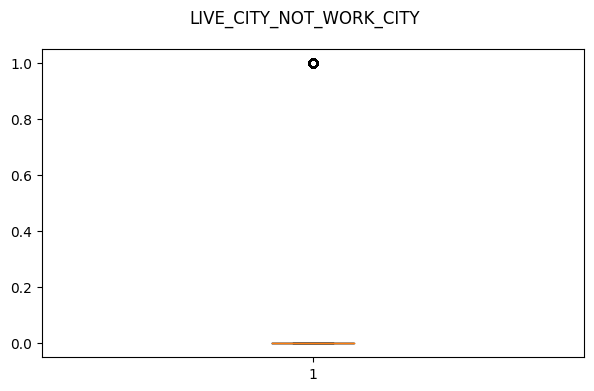

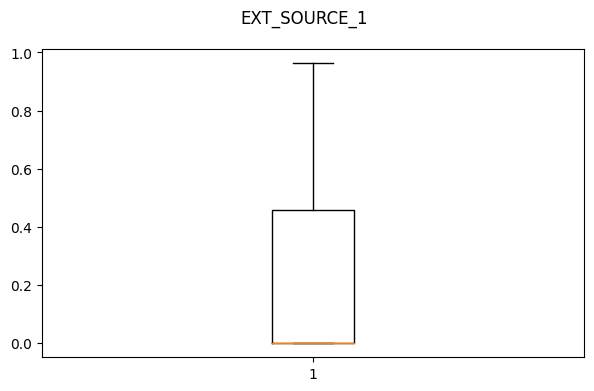

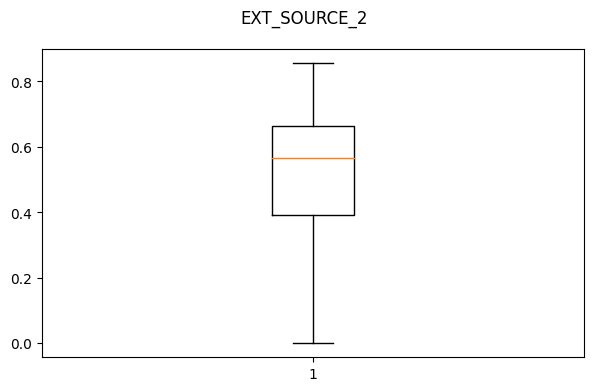

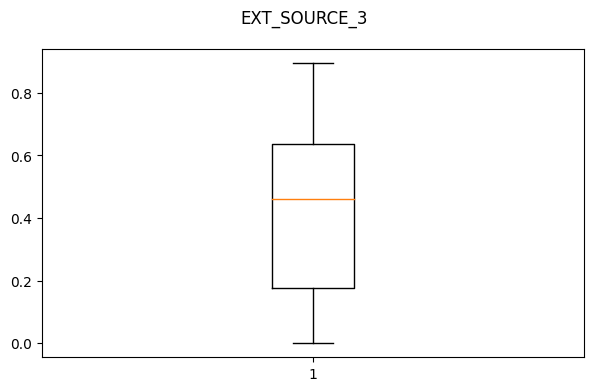

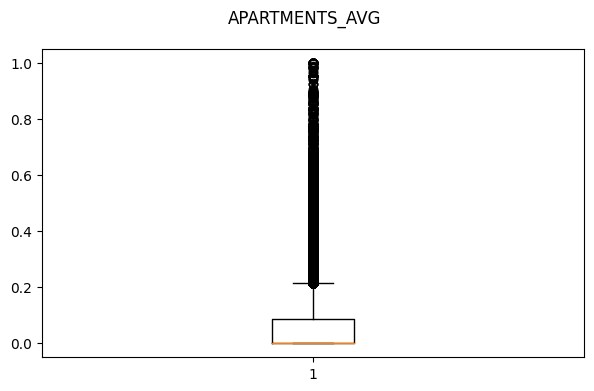

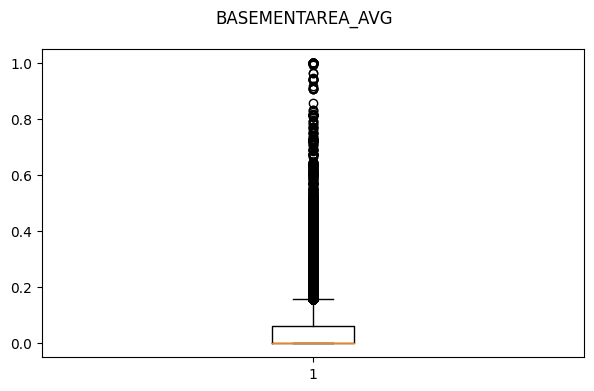

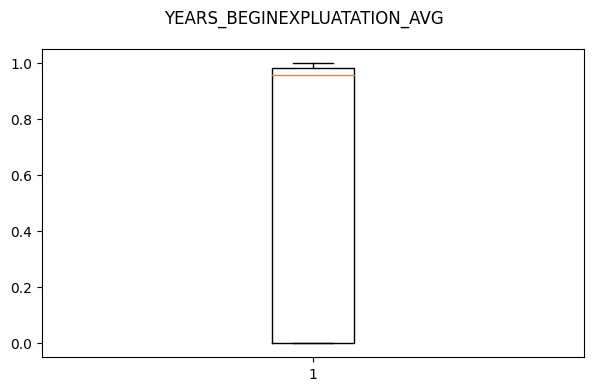

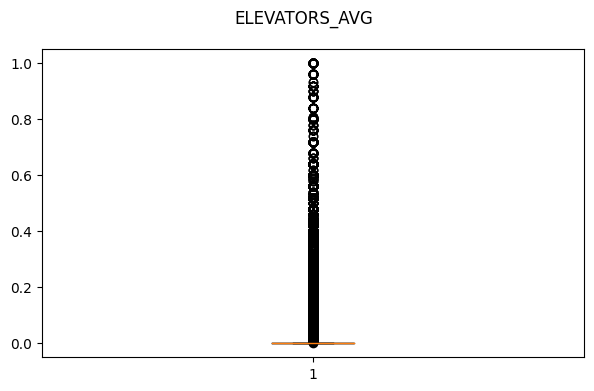

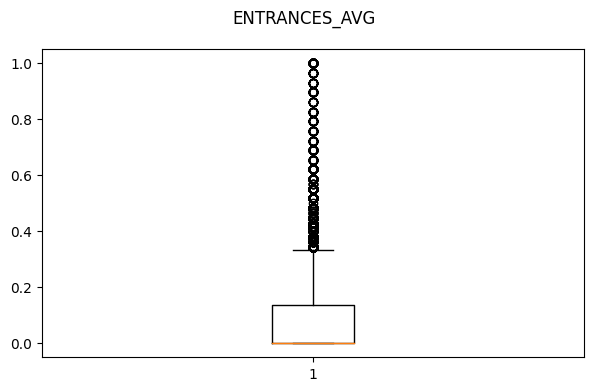

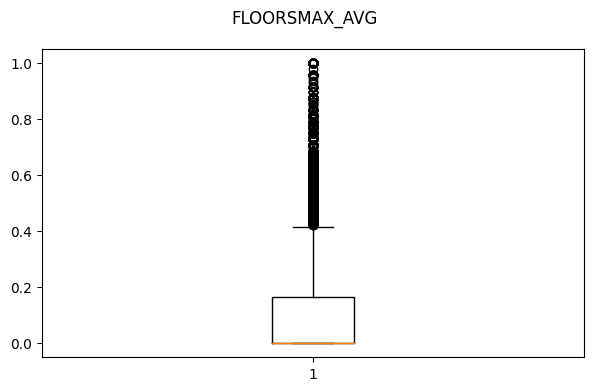

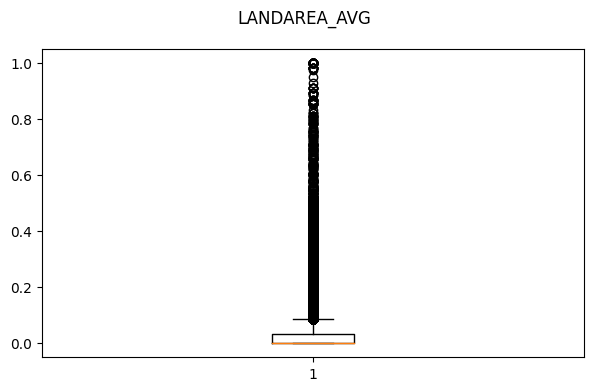

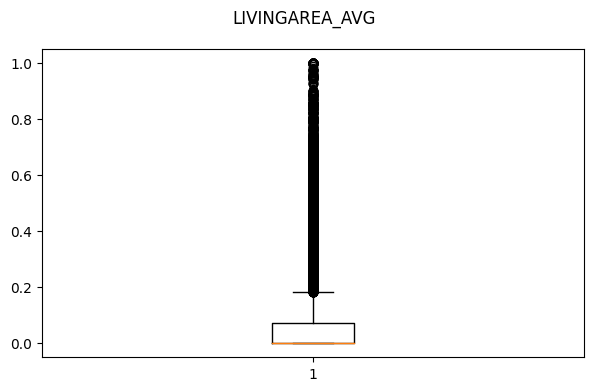

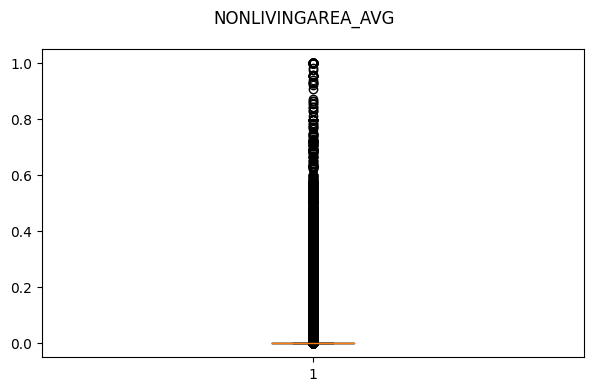

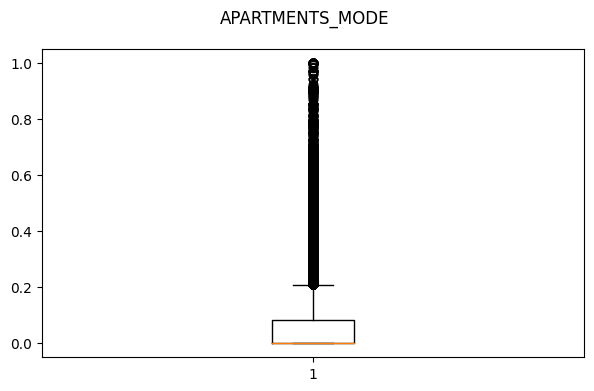

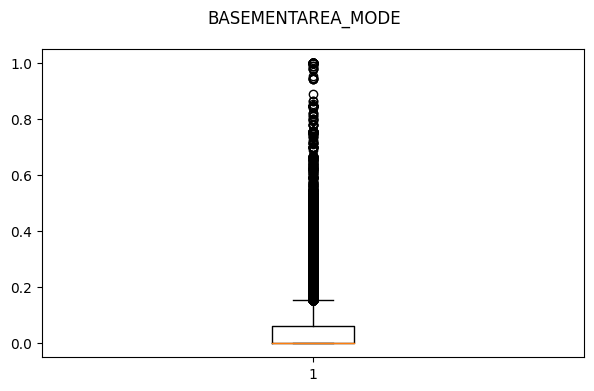

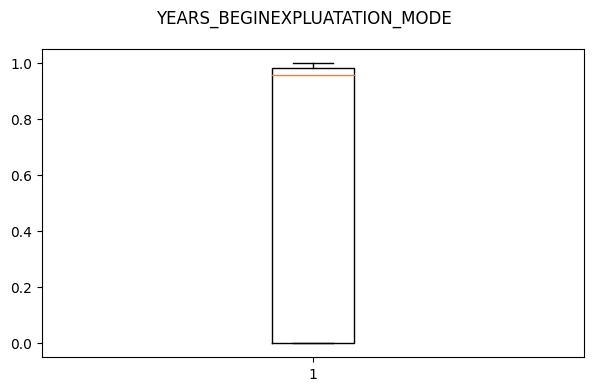

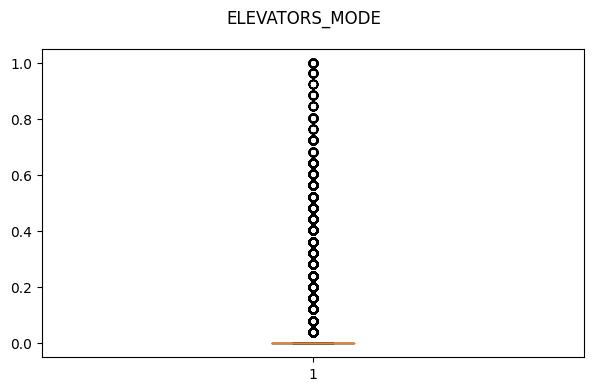

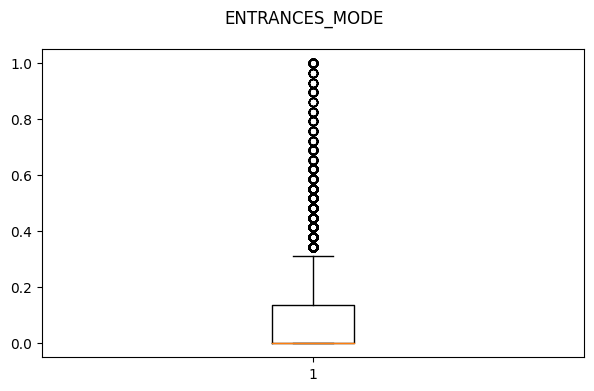

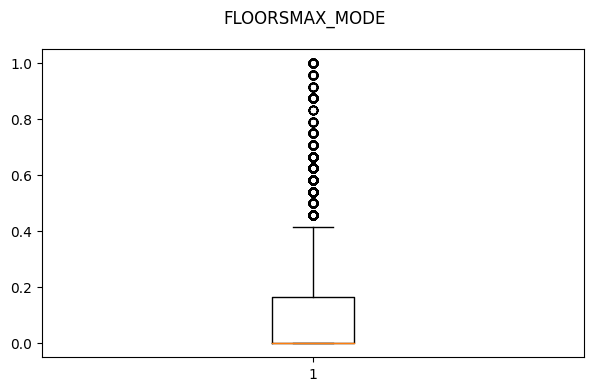

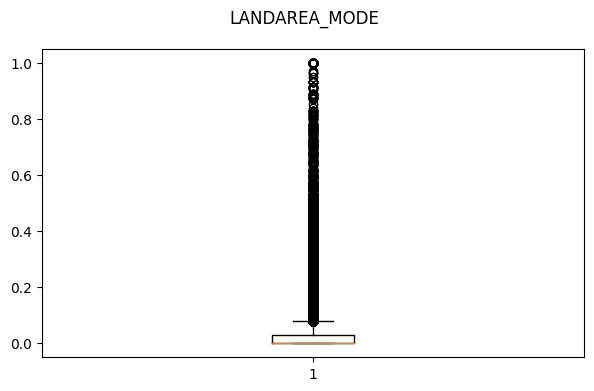

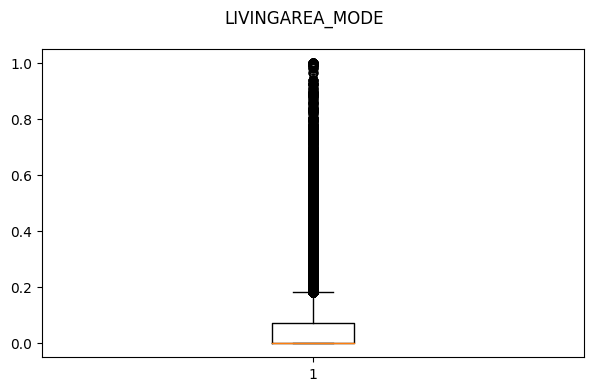

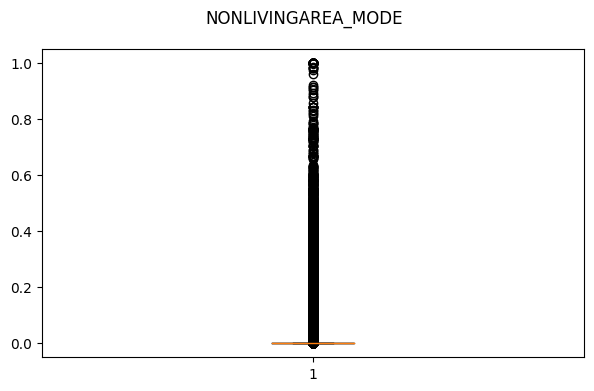

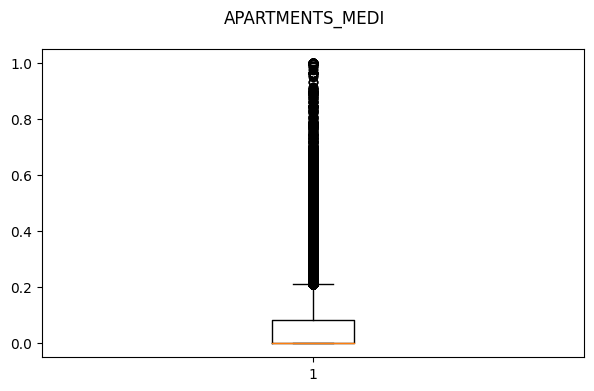

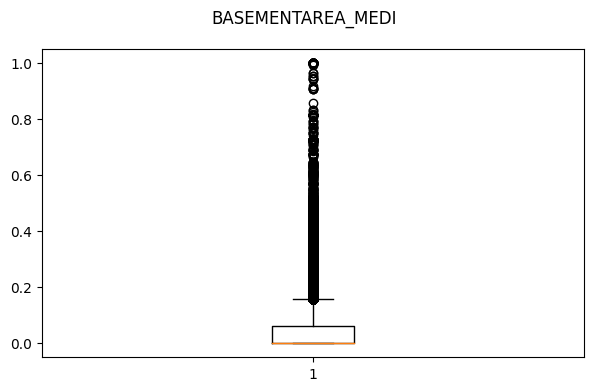

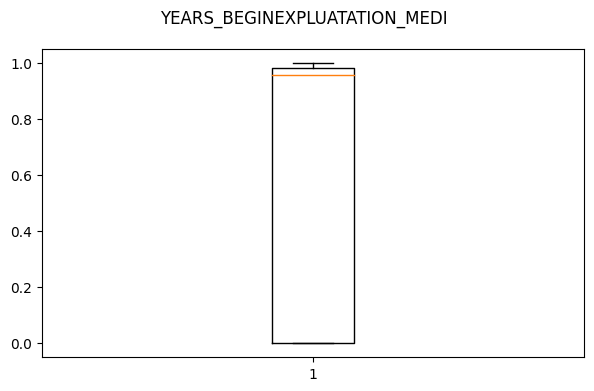

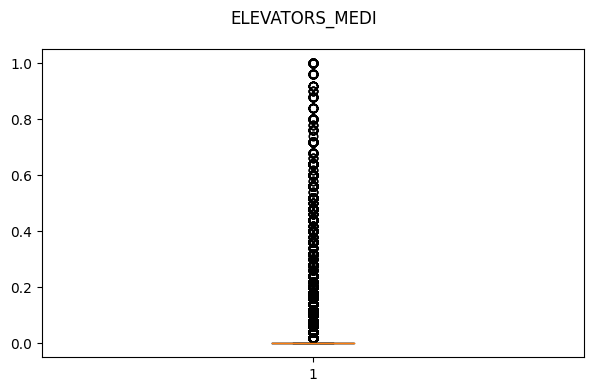

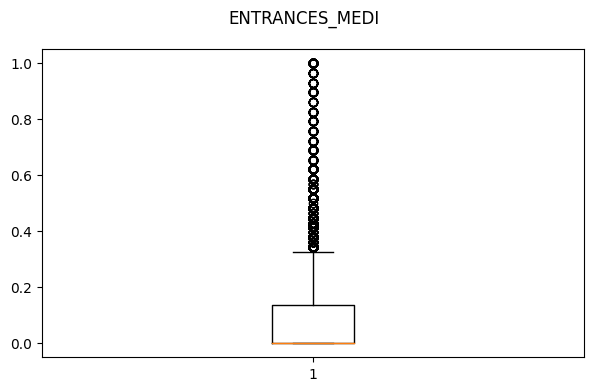

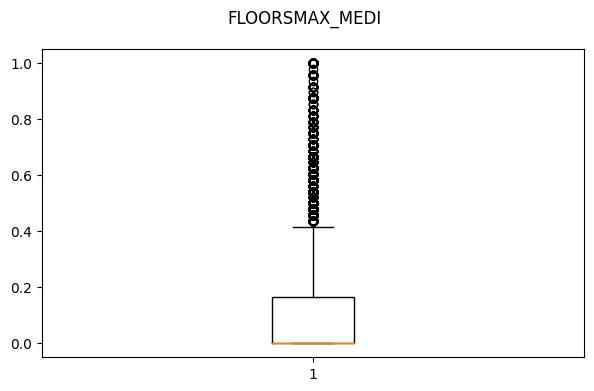

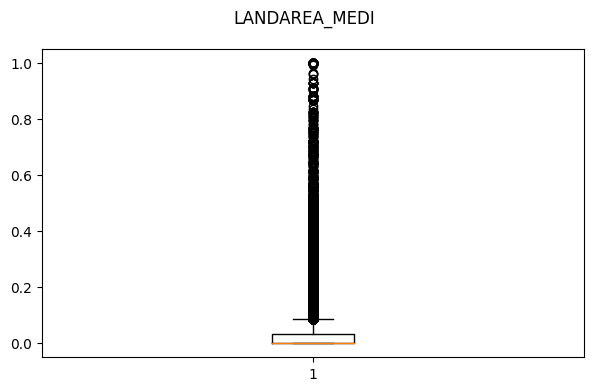

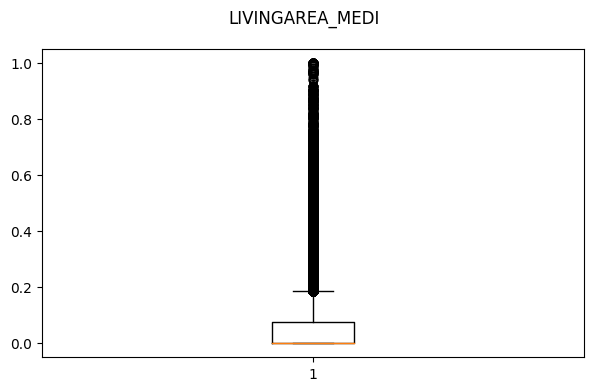

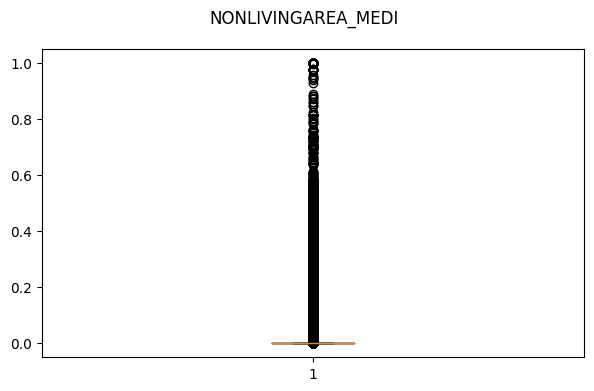

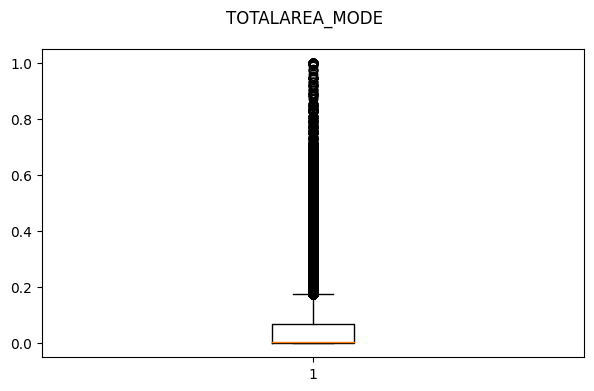

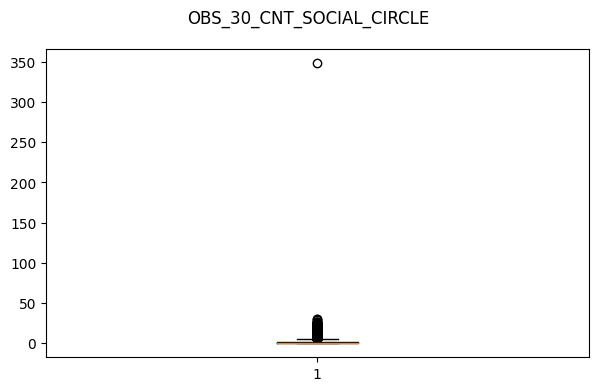

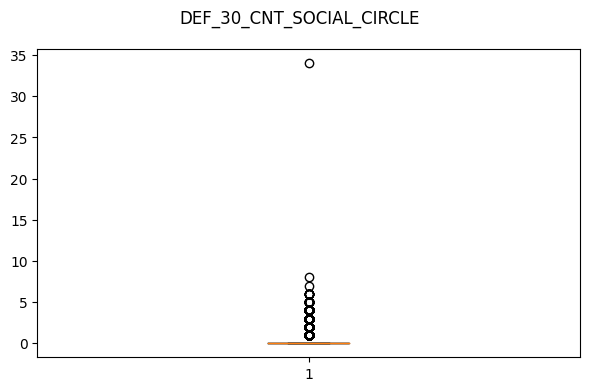

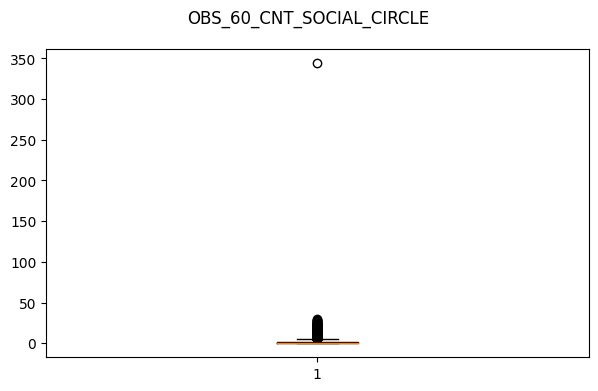

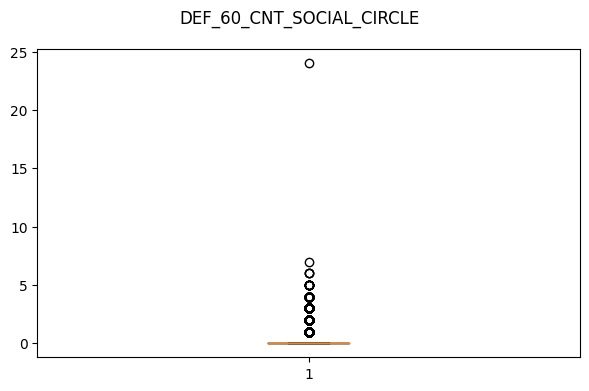

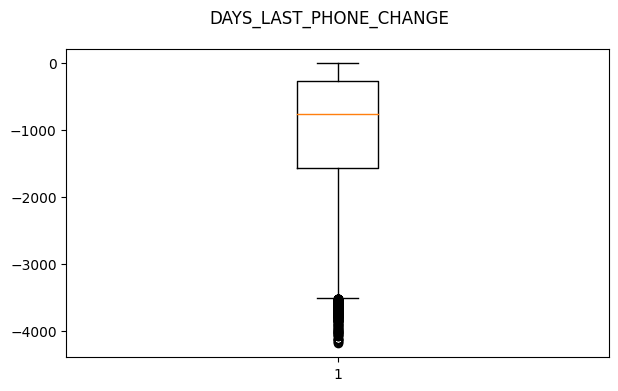

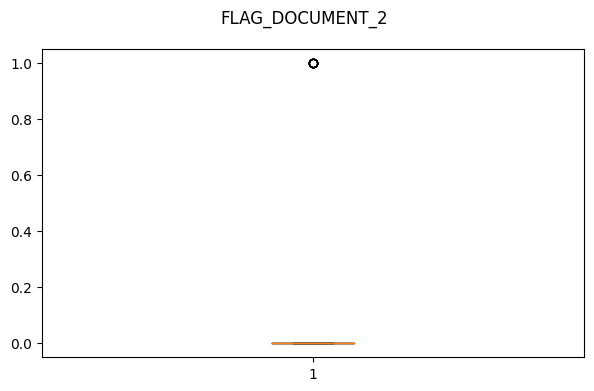

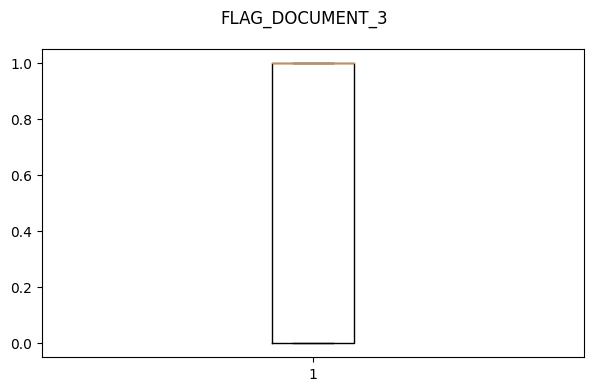

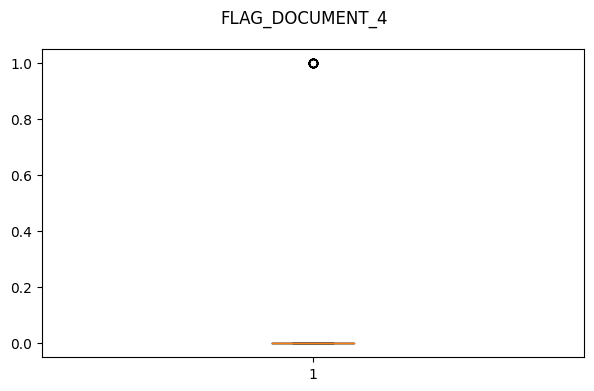

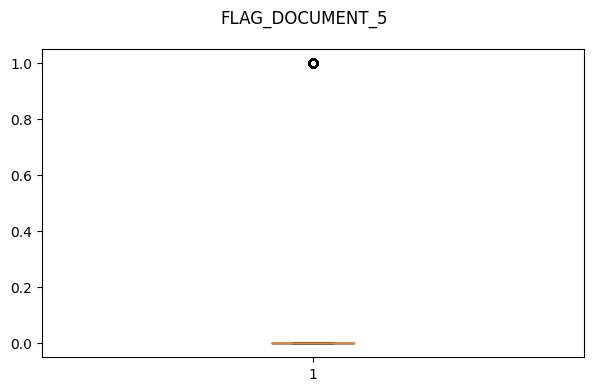

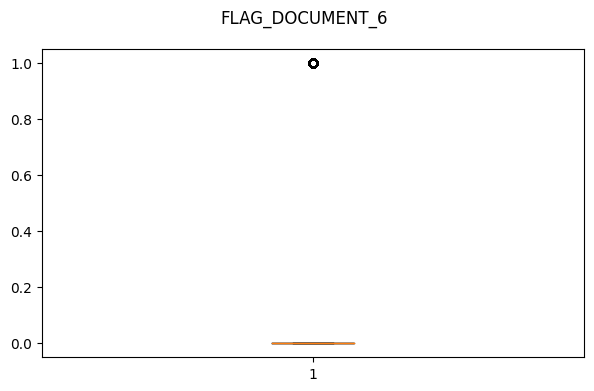

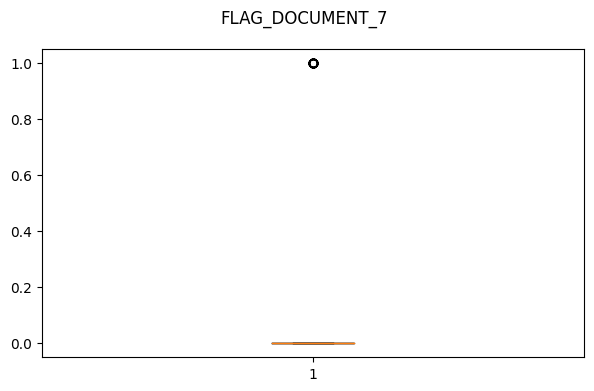

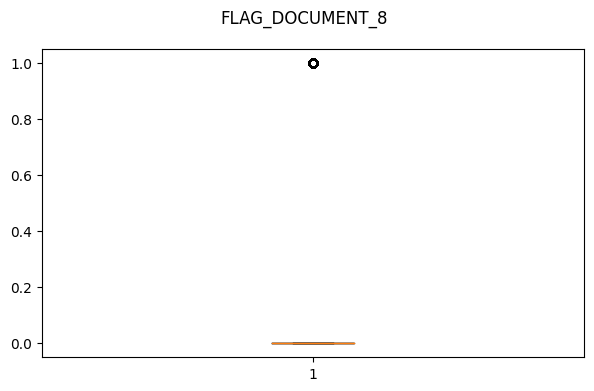

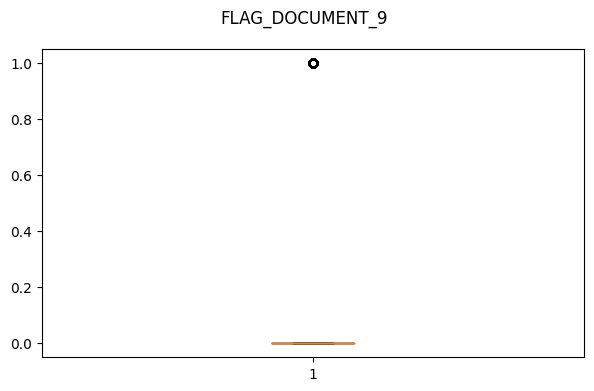

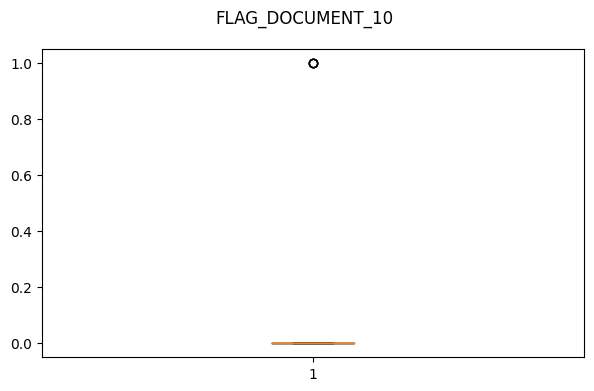

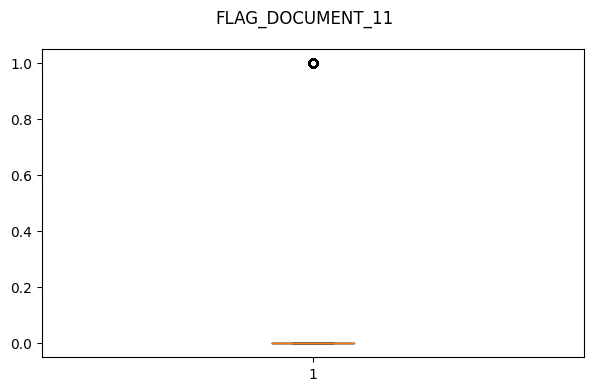

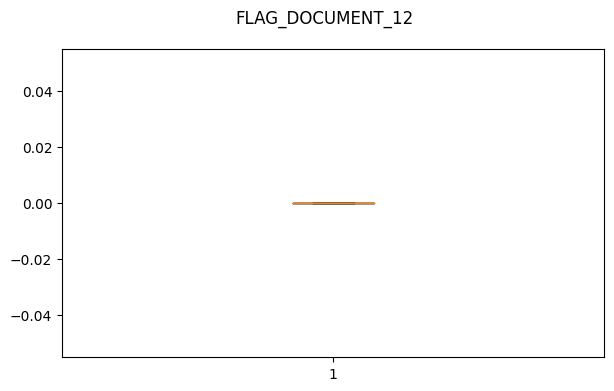

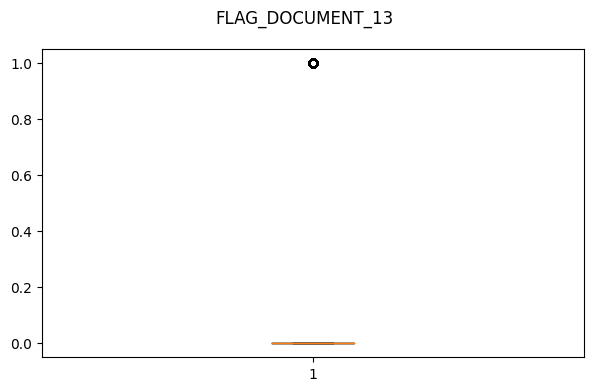

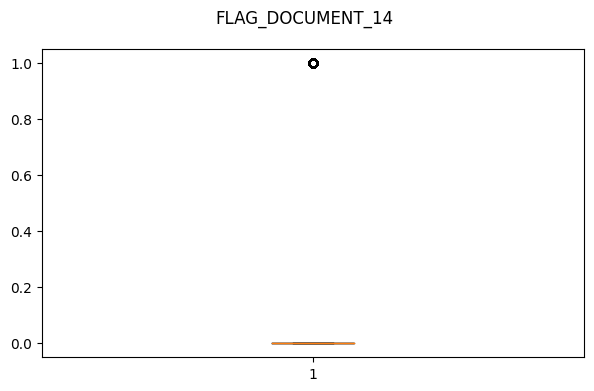

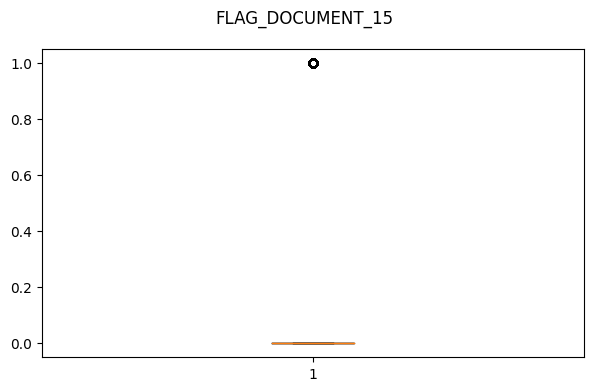

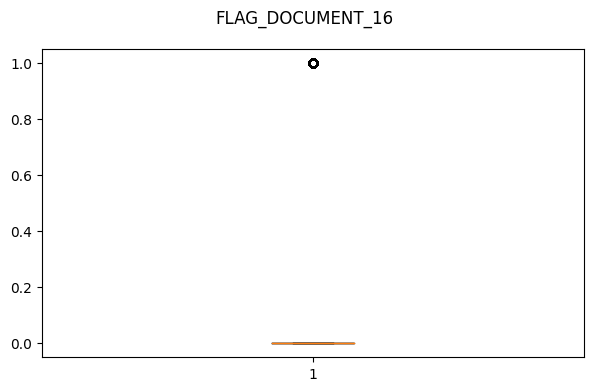

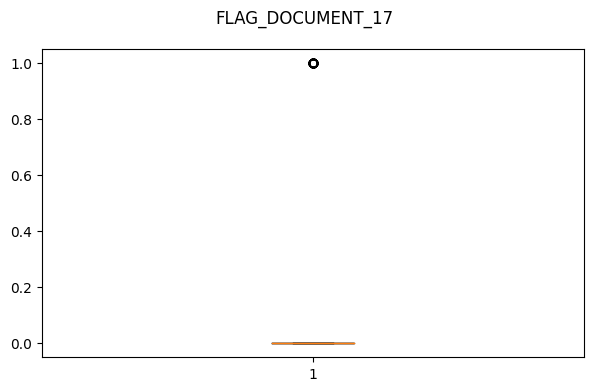

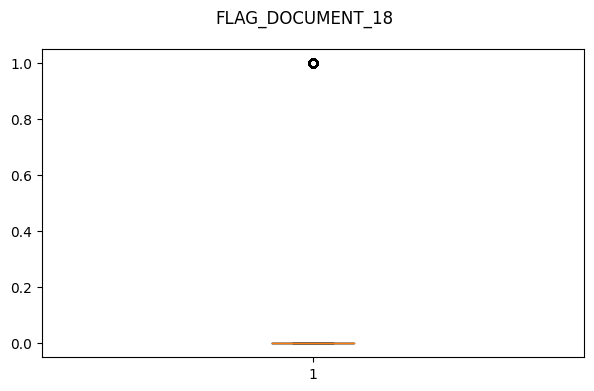

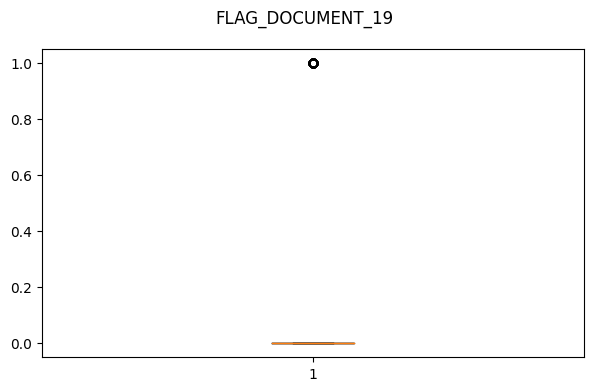

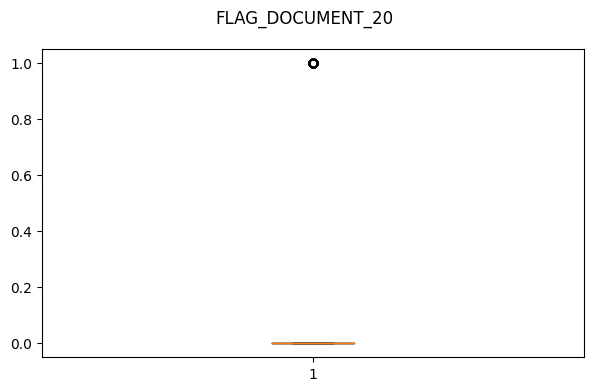

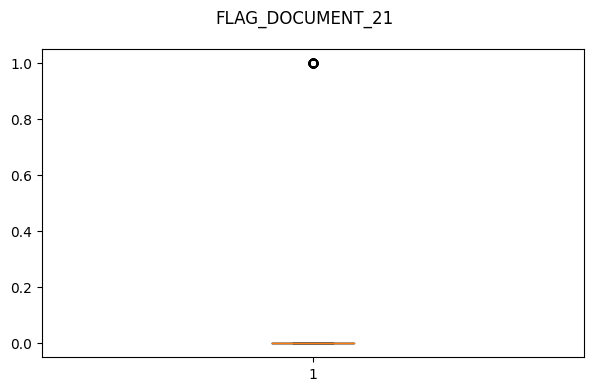

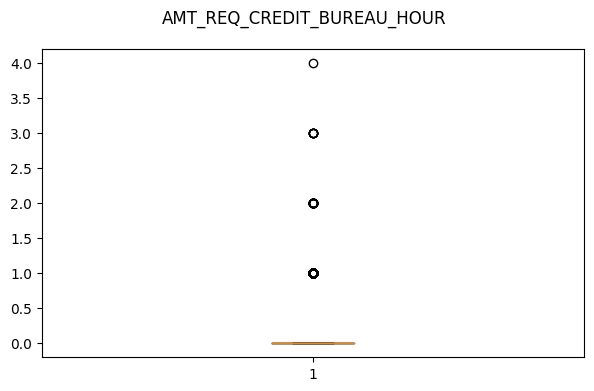

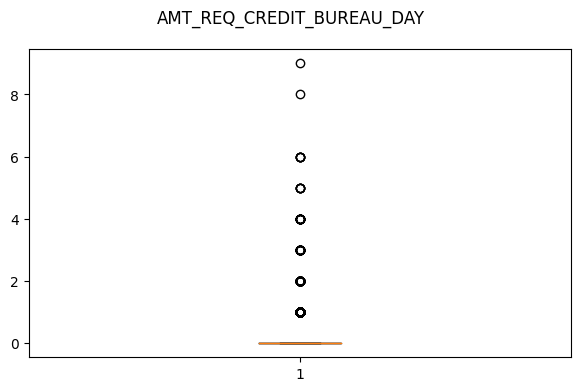

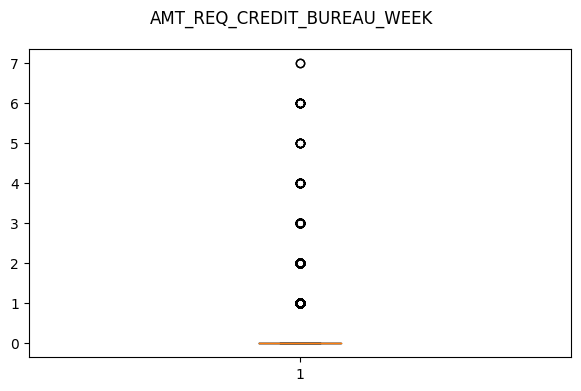

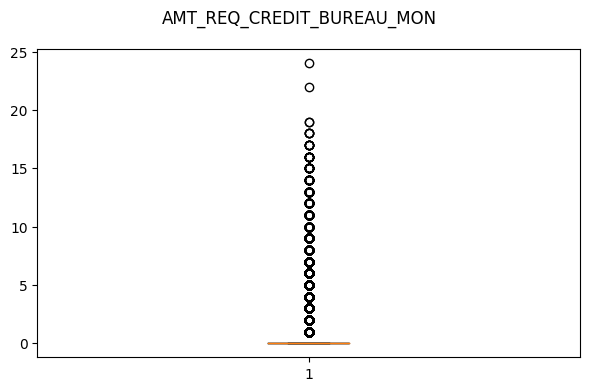

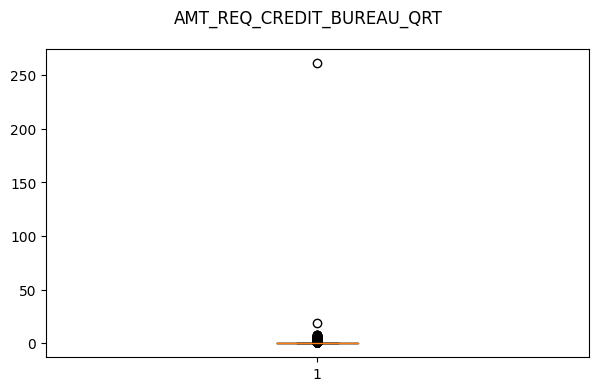

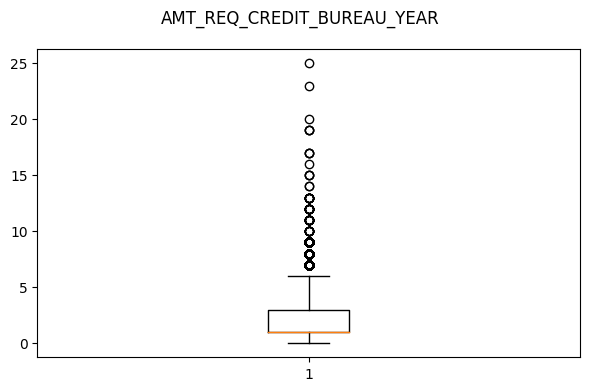

Total Boxplots printed are:  88


In [19]:
#Plotting BoxPlot of the left out columns to check if they have any outliers.
print('Before Removing Outliers')
count = 0
for i in x.columns:
    if(x[i].dtypes != 'object'):
        fig = plt.figure(figsize=(7,4))
        plt.boxplot(x[i])
        plt.suptitle(i)
        plt.show()
        count += 1

print('Total Boxplots printed are: ',count)


### REPLACE THE IQR BY CAPPING IT WITH LOWER AND UPPER QUARTILE VALUES

In [20]:
## IQR method to display outliers if present.

for i in x.columns:
    if x[i].dtype != 'object':
        Q1 = x[i].quantile(0.25)
        Q3 = x[i].quantile(0.75)  
        IQR = Q3 - Q1
        ll = Q1 - (IQR*1.5)
        ul = Q3 + (IQR*1.5)

        l = x[i].loc[x[i] < ll].to_list()
        u = x[i].loc[x[i] > ul].to_list()
        
        #capping the outliers by the lower quartile and upper quartile
        
        #x[i][(x[i]>ul) | (x[i]<ll)] = x[i].median()
        x[i]=np.where(x[i]>ul,ul,np.where(x[i]<ll,ll,x[i])) 
        
        

        ln = x[i].loc[x[i] < ll].to_list()
        un = x[i].loc[x[i] > ul].to_list()

        
        print(i,Q1,Q3,IQR,ll,ul,len(l),len(u),len(l)+len(u),len(ln),len(un),len(ln)+len(un)) 

CNT_CHILDREN 0.0 1.0 1.0 -1.5 2.5 0 2502 2502 0 0 0
AMT_INCOME_TOTAL 112500.0 202500.0 90000.0 -22500.0 337500.0 0 8393 8393 0 0 0
AMT_CREDIT 270000.0 808650.0 538650.0 -537975.0 1616625.0 0 3936 3936 0 0 0
AMT_ANNUITY 16555.5 34596.0 18040.5 -10505.25 61656.75 0 4464 4464 0 0 0
AMT_GOODS_PRICE 238500.0 679500.0 441000.0 -423000.0 1341000.0 0 8914 8914 0 0 0
REGION_POPULATION_RELATIVE 0.010006 0.028663 0.018657 -0.017979500000000002 0.056648500000000004 0 5009 5009 0 0 0
DAYS_BIRTH 12416.0 19677.0 7261.0 1524.5 30568.5 0 0 0 0 0 0
DAYS_EMPLOYED 930.0 5707.75 4777.75 -6236.625 12874.375 0 33841 33841 0 0 0
DAYS_REGISTRATION 2000.0 7486.0 5486.0 -6229.0 15715.0 0 373 373 0 0 0
DAYS_ID_PUBLISH 1721.0 4299.0 2578.0 -2146.0 8166.0 0 0 0 0 0 0
FLAG_MOBIL 1.0 1.0 0.0 1.0 1.0 1 0 1 0 0 0
FLAG_EMP_PHONE 1.0 1.0 0.0 1.0 1.0 33239 0 33239 0 0 0
FLAG_WORK_PHONE 0.0 0.0 0.0 0.0 0.0 0 36738 36738 0 0 0
FLAG_CONT_MOBILE 1.0 1.0 0.0 1.0 1.0 361 0 361 0 0 0
FLAG_PHONE 0.0 1.0 1.0 -1.5 2.5 0 0 0 0 0 0
F

After Removing Outliers


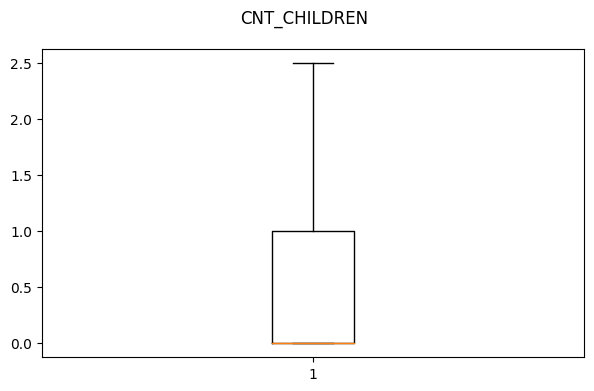

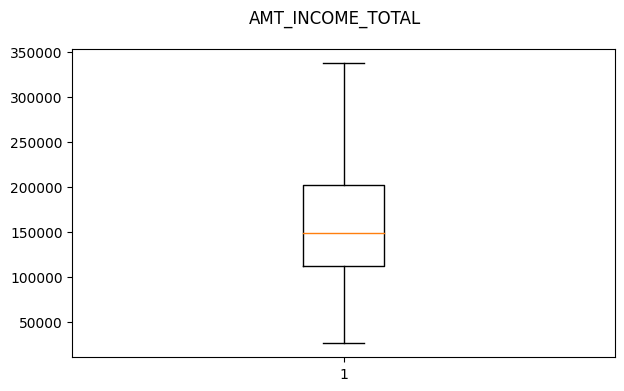

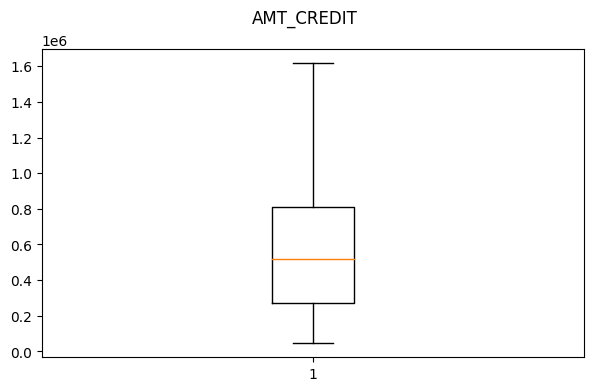

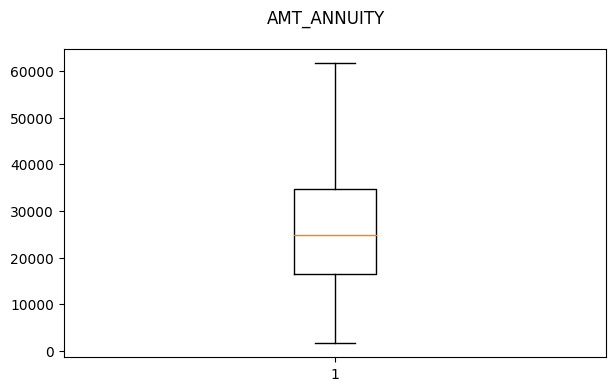

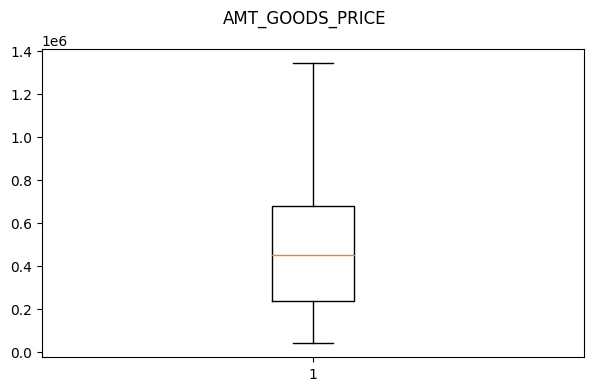

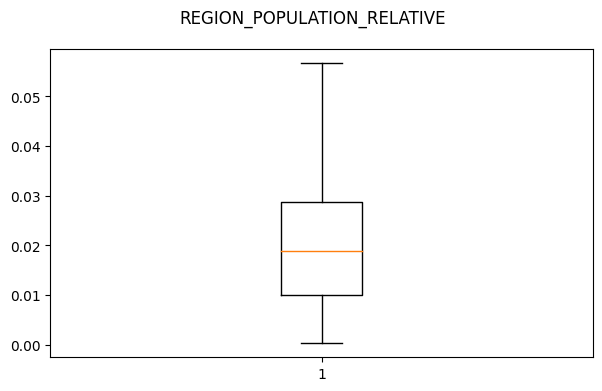

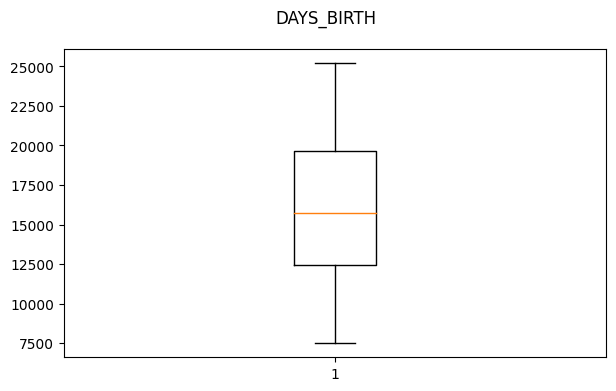

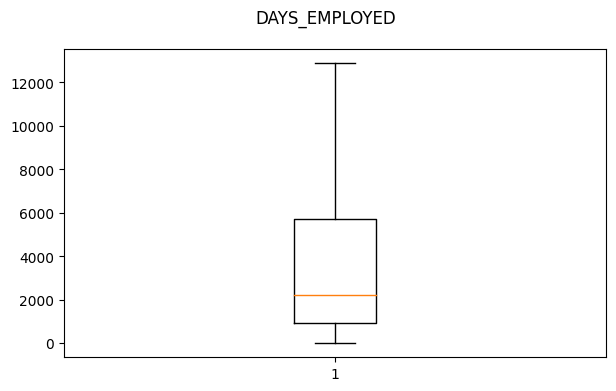

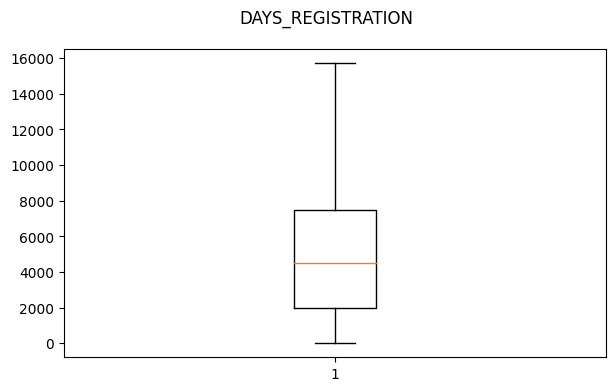

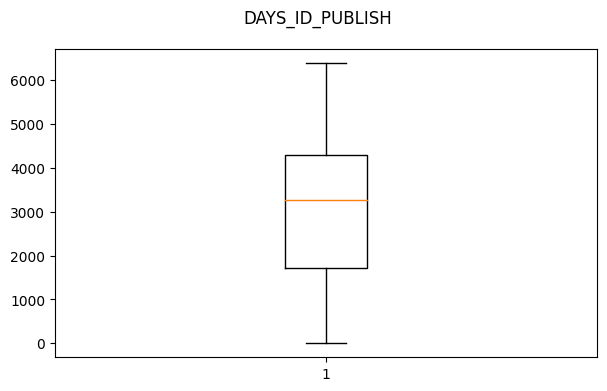

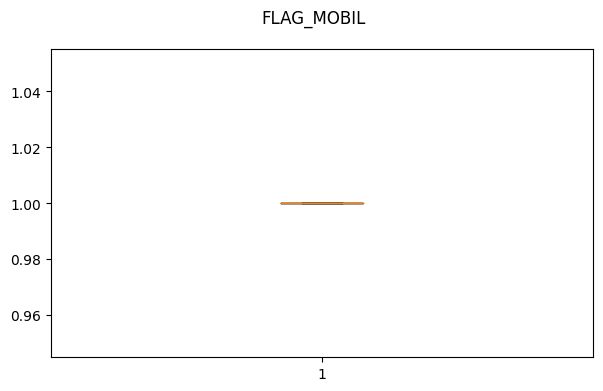

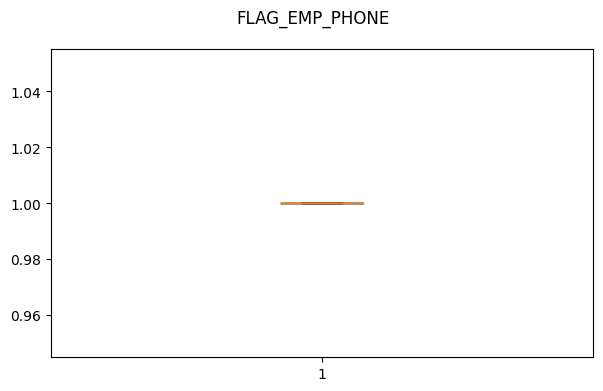

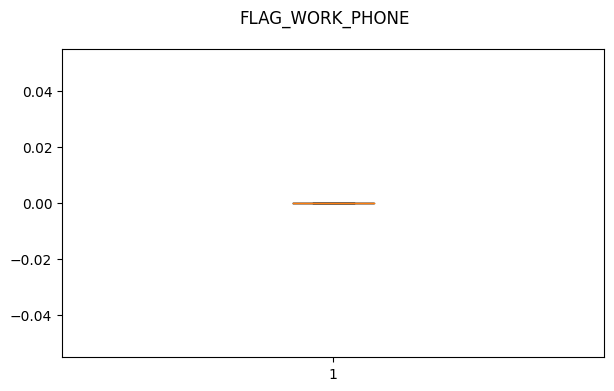

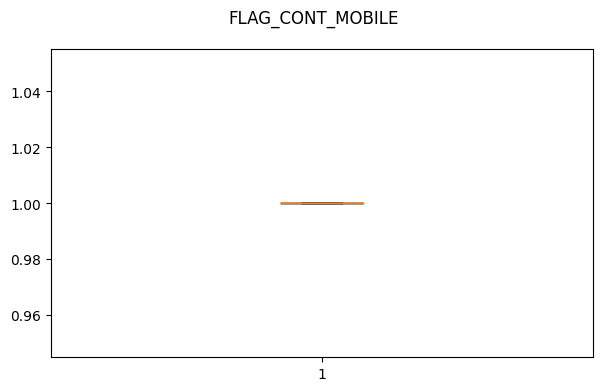

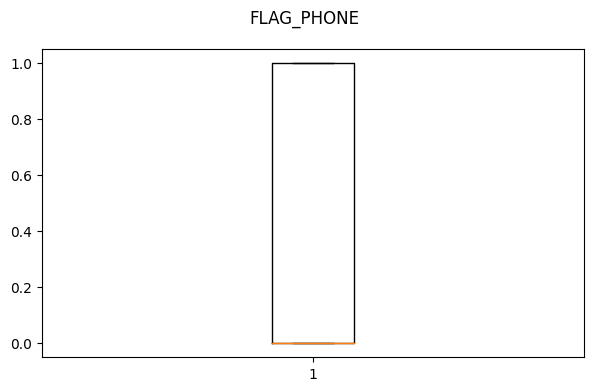

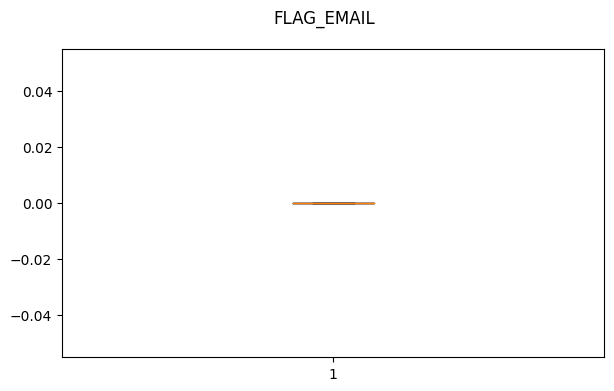

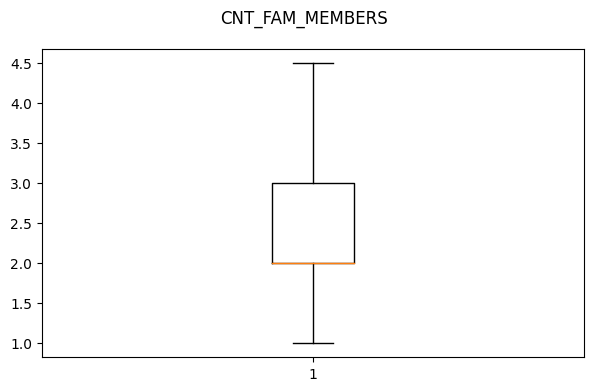

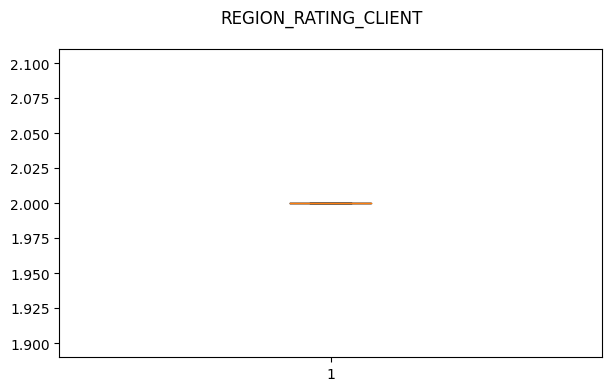

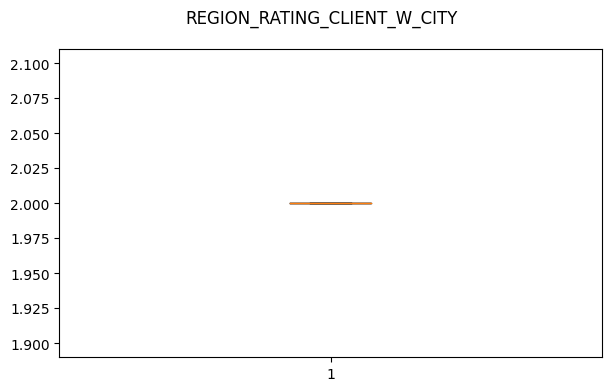

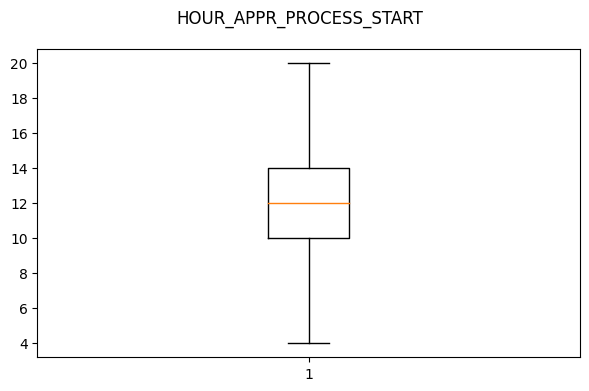

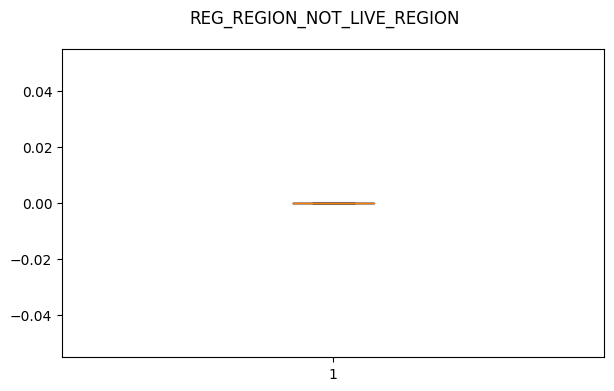

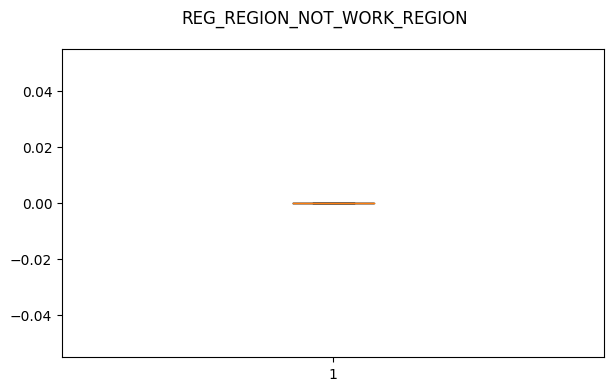

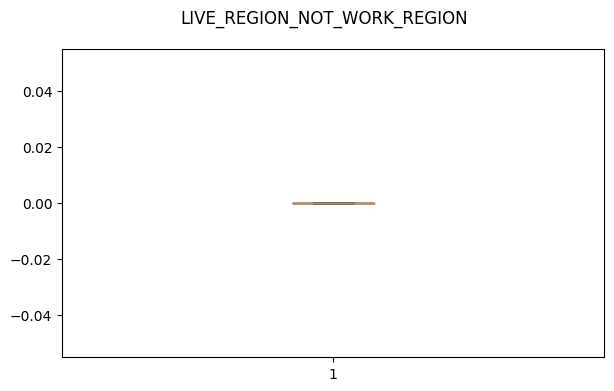

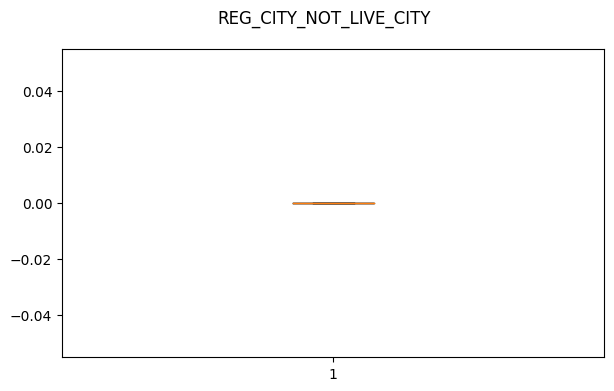

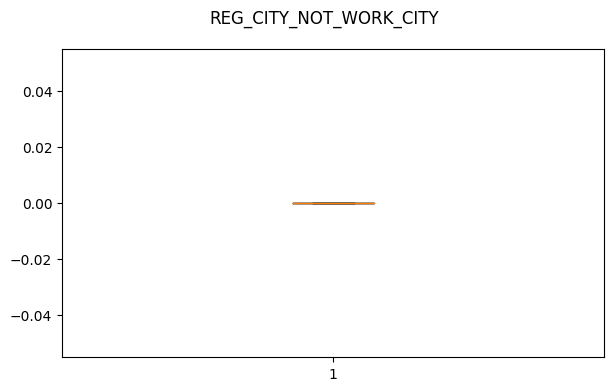

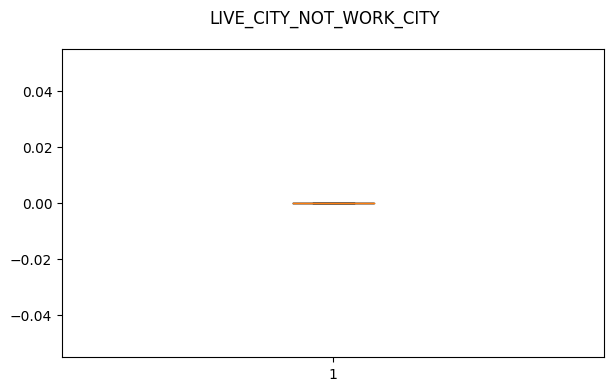

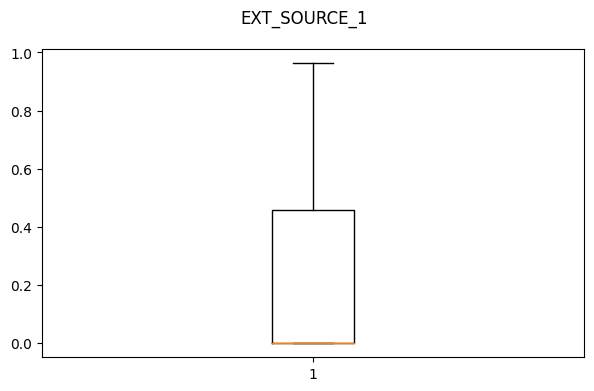

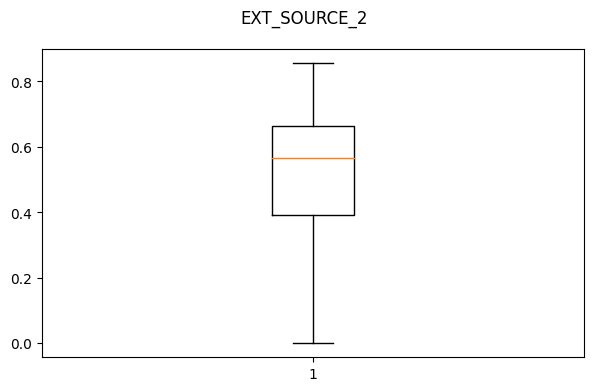

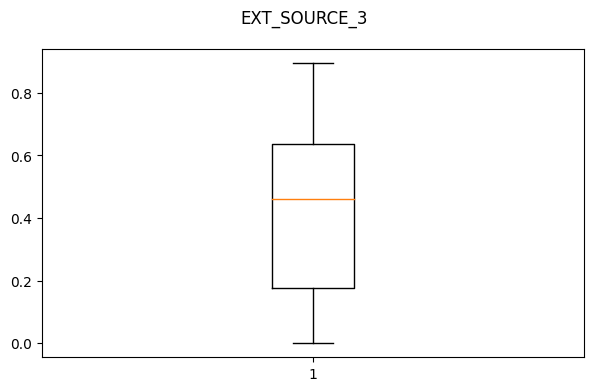

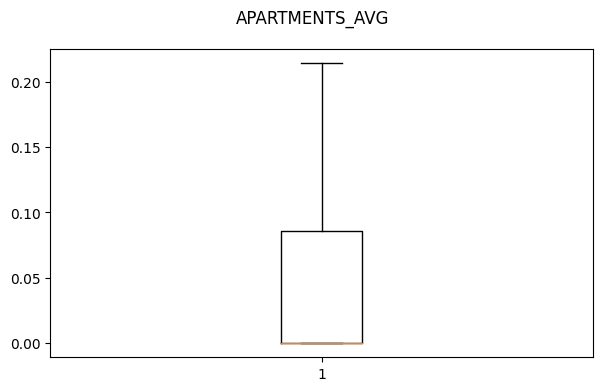

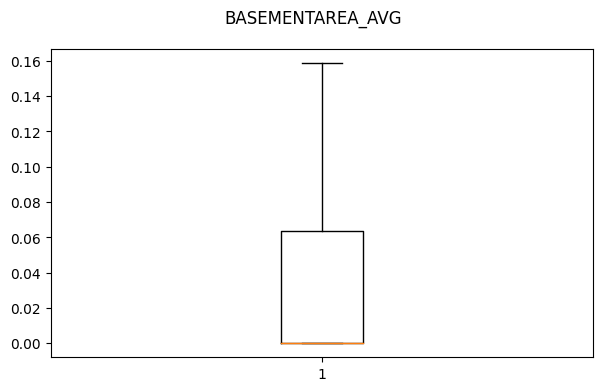

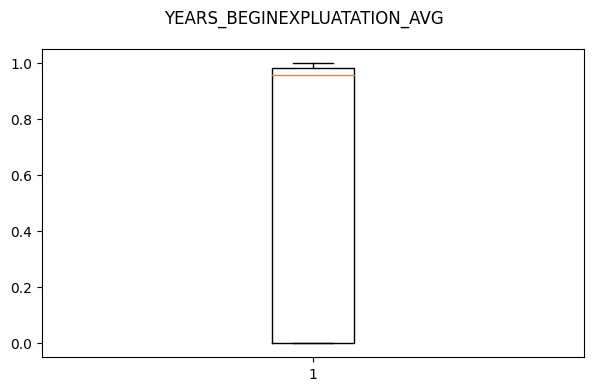

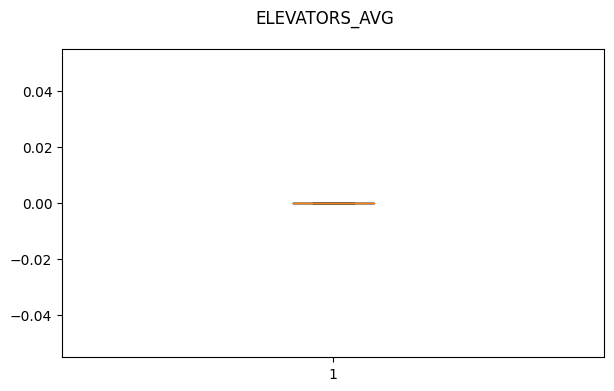

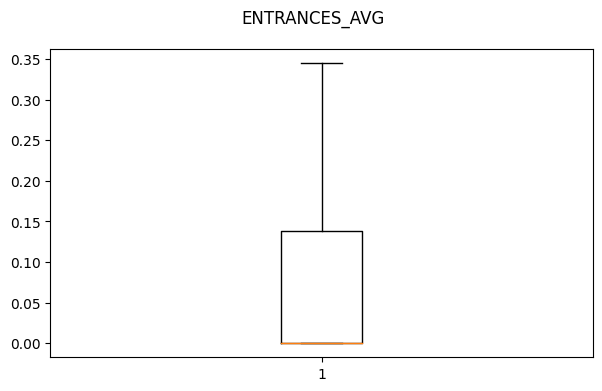

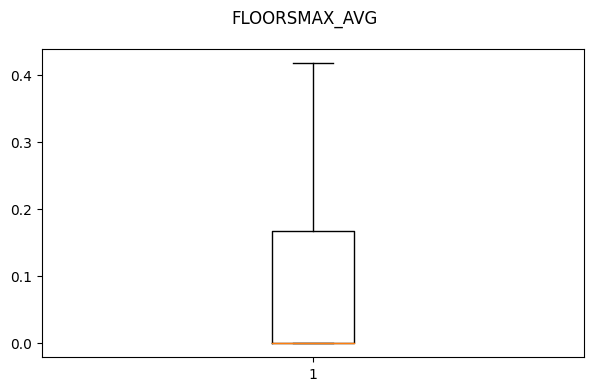

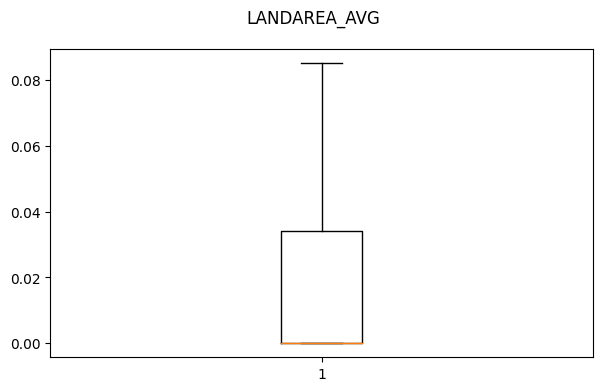

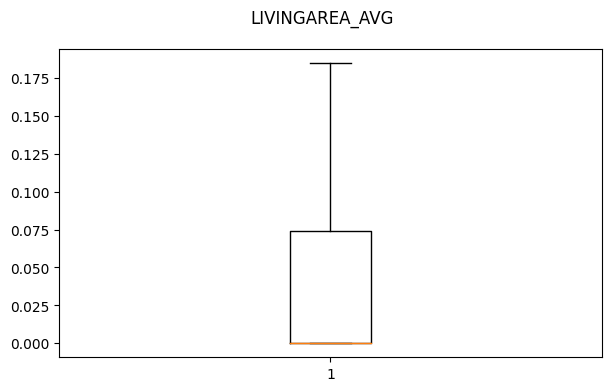

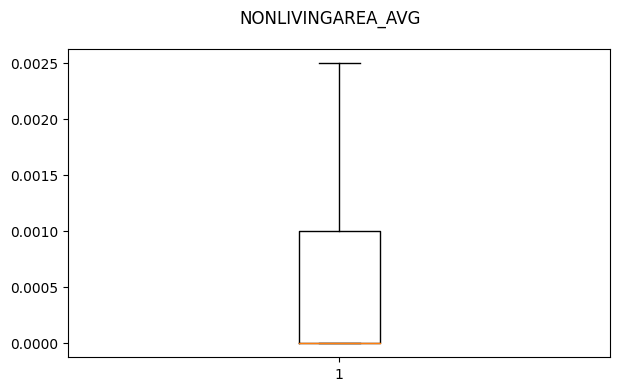

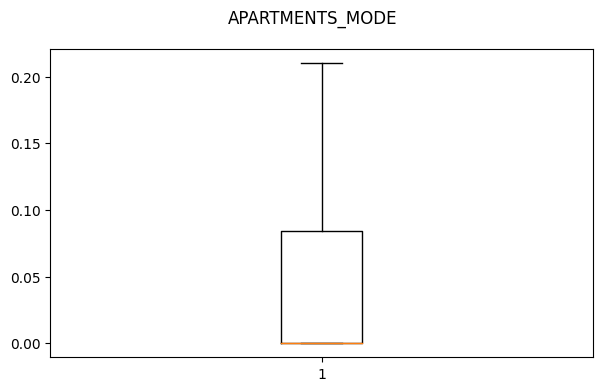

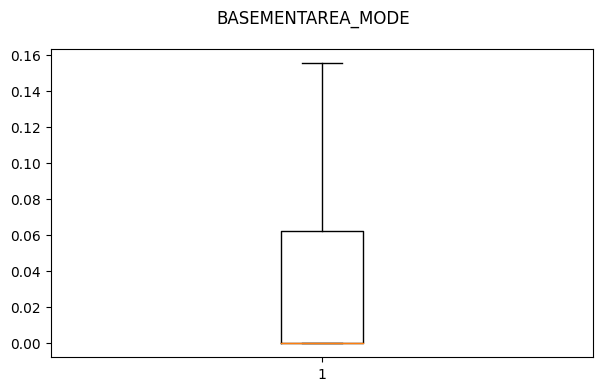

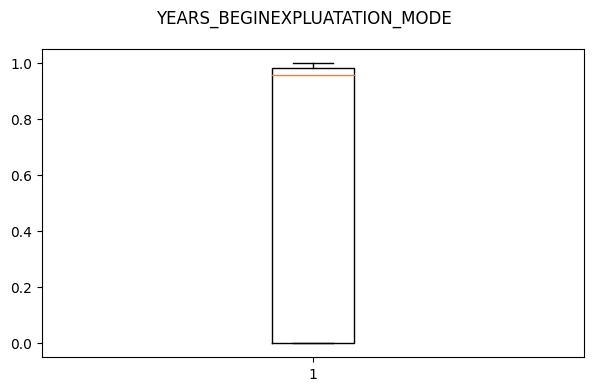

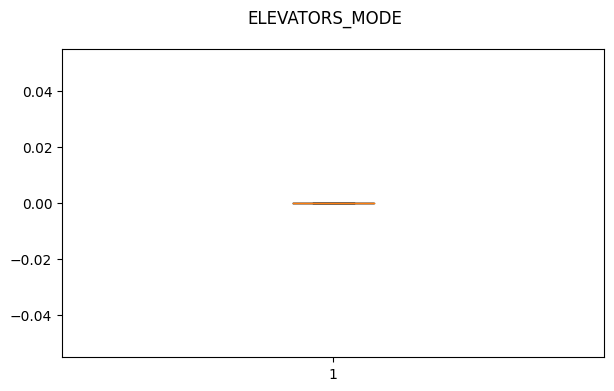

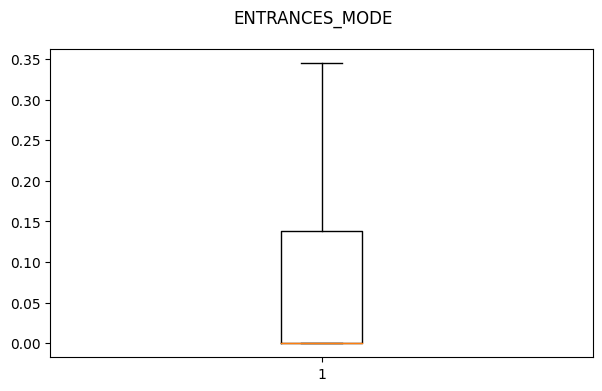

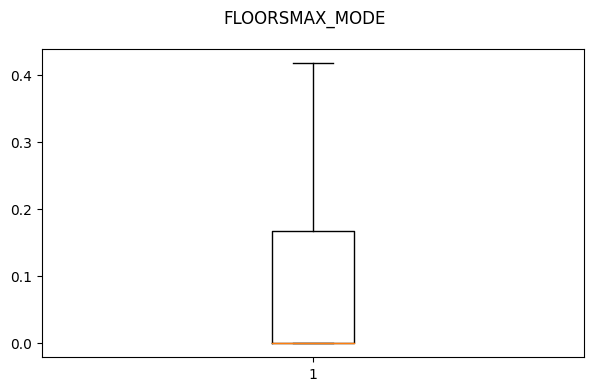

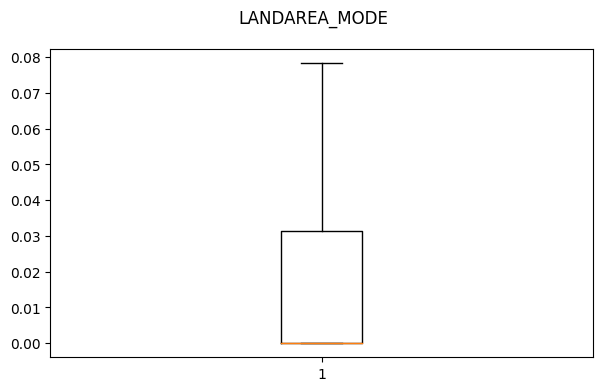

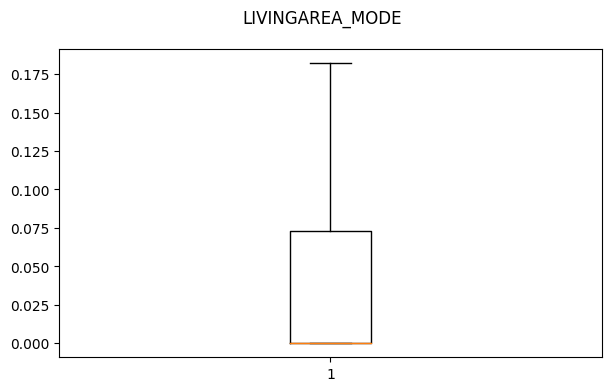

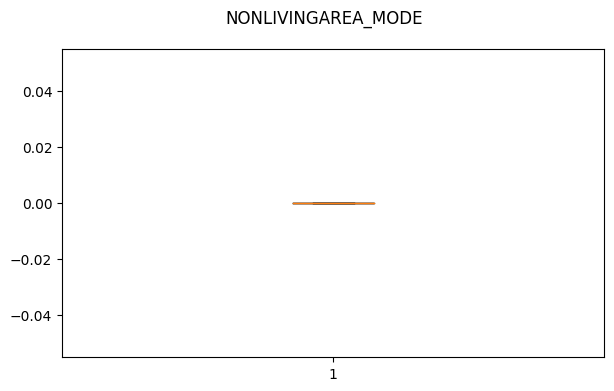

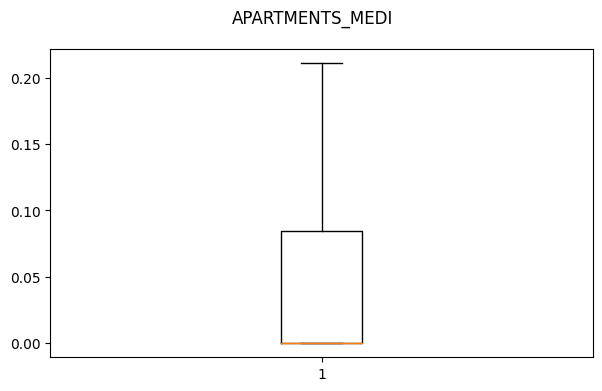

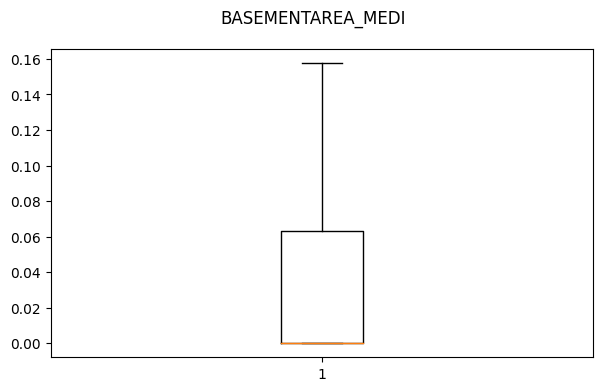

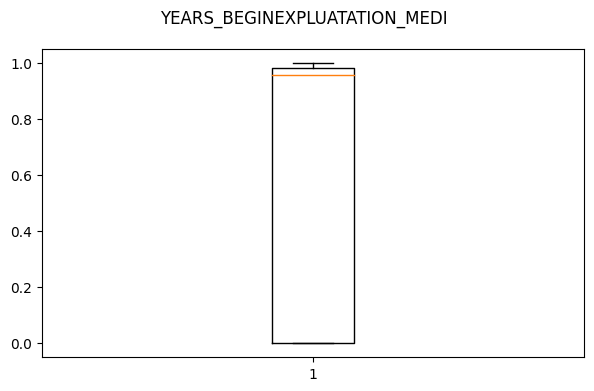

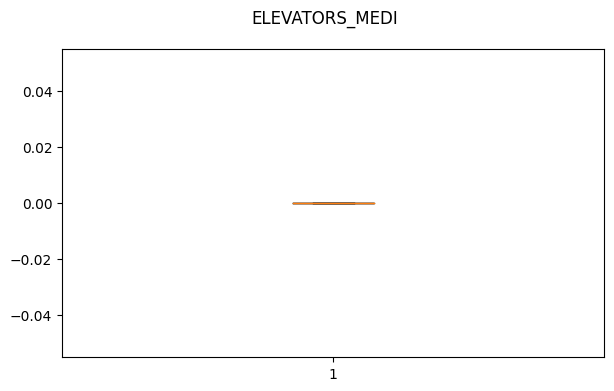

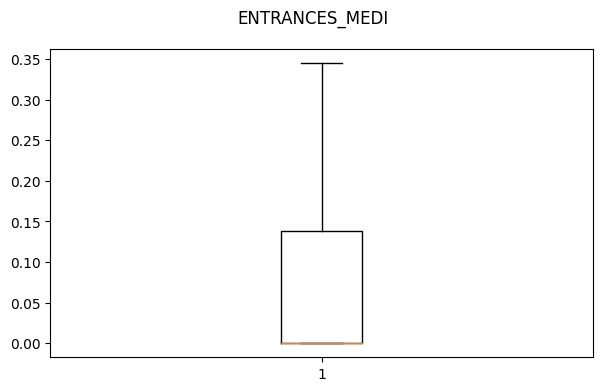

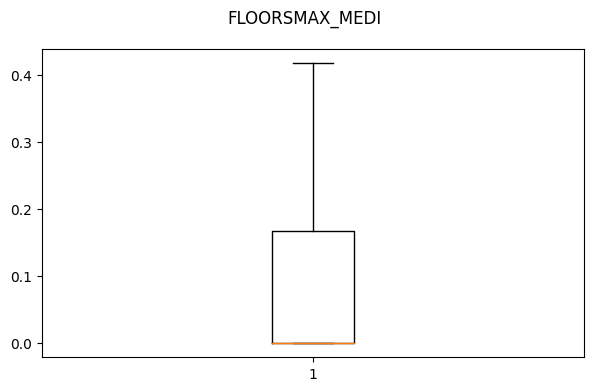

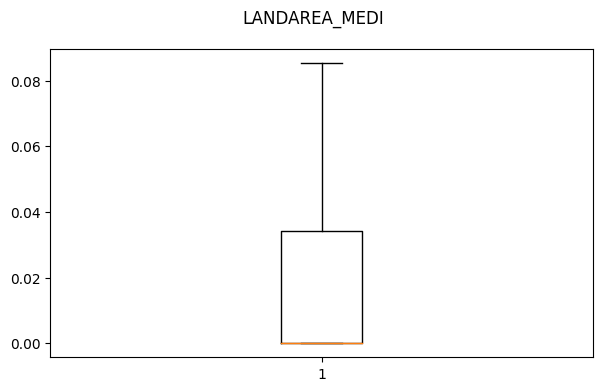

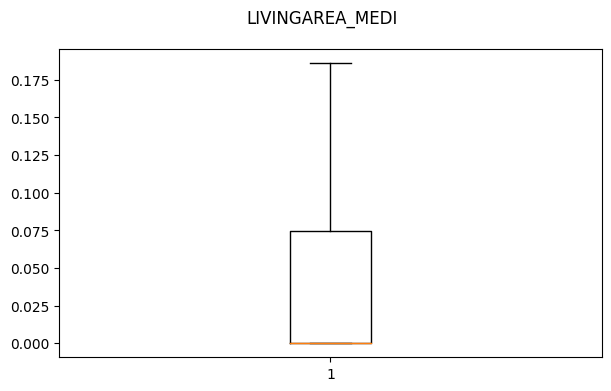

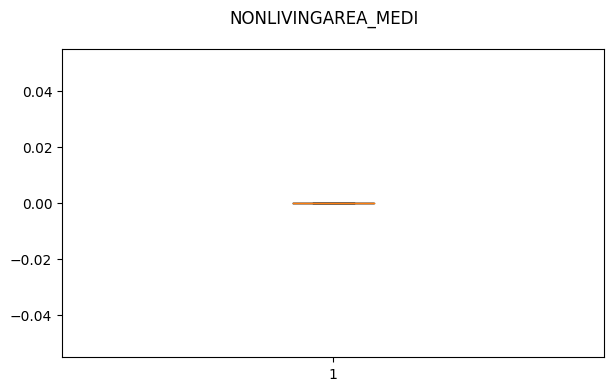

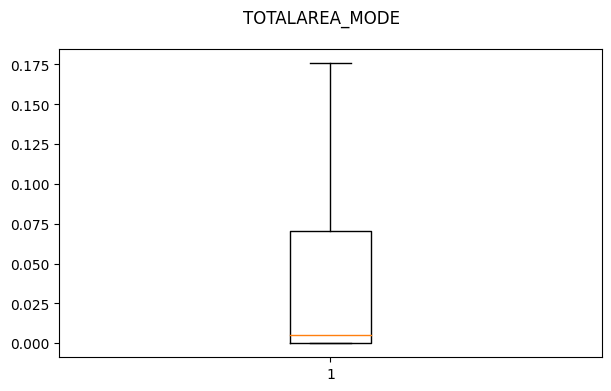

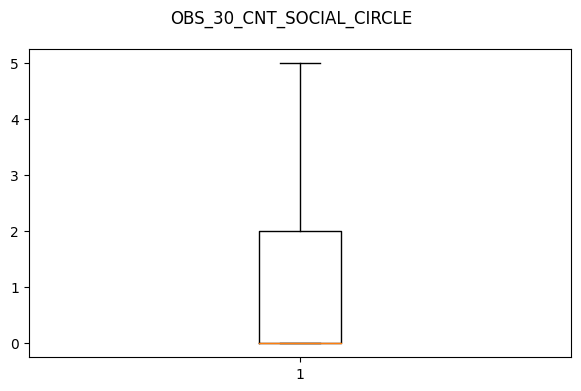

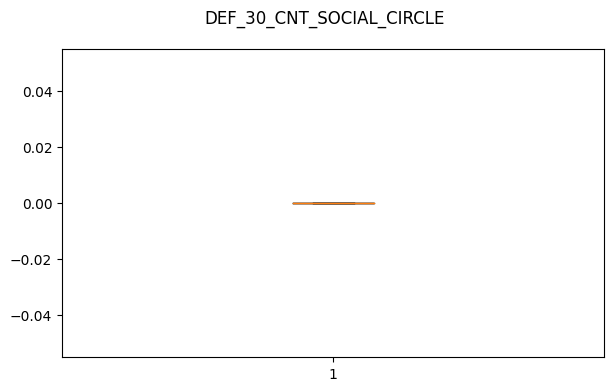

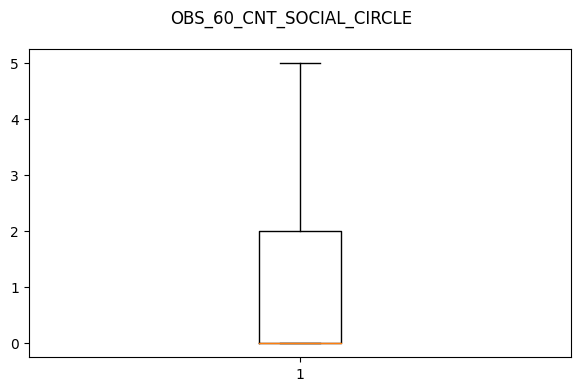

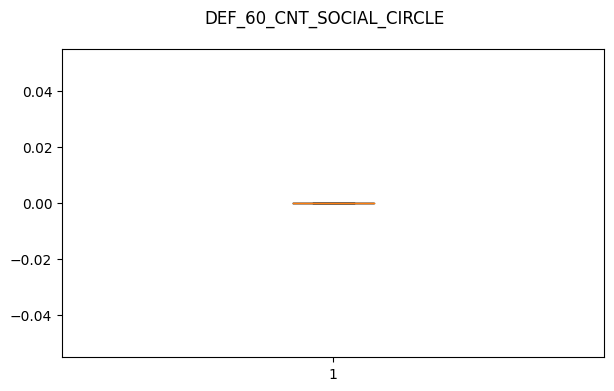

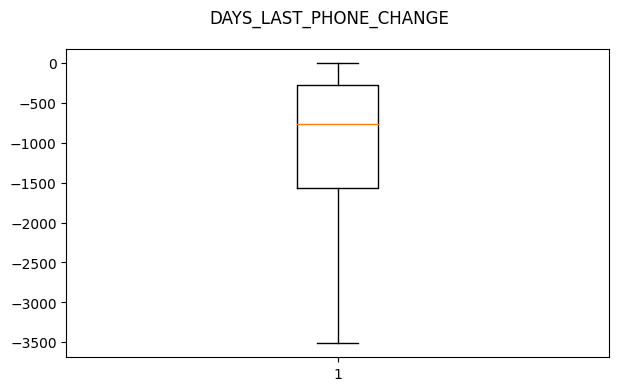

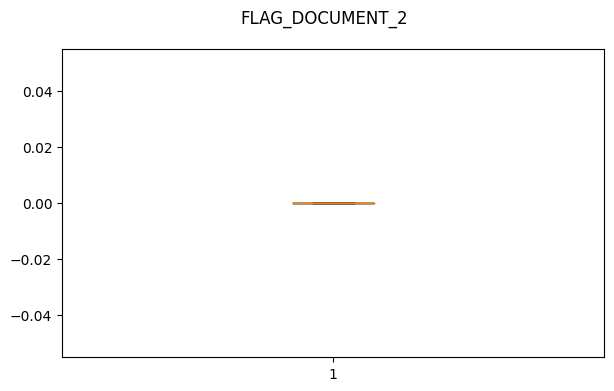

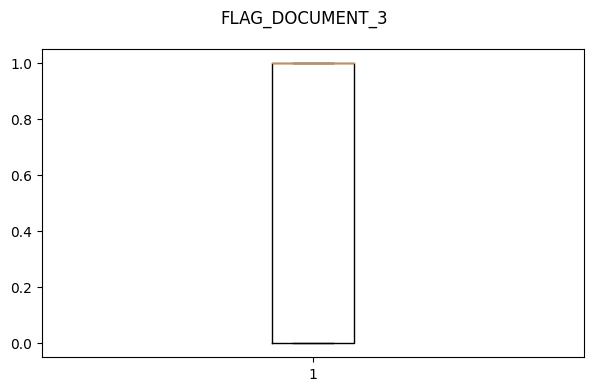

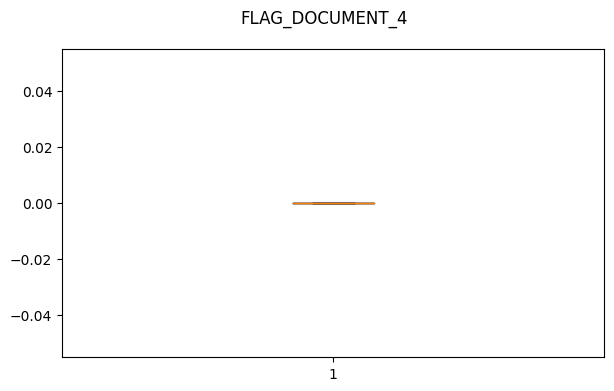

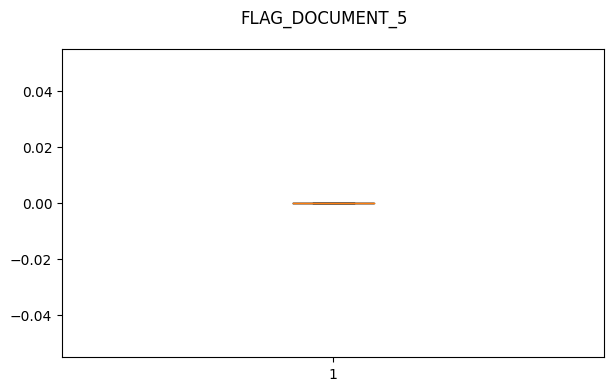

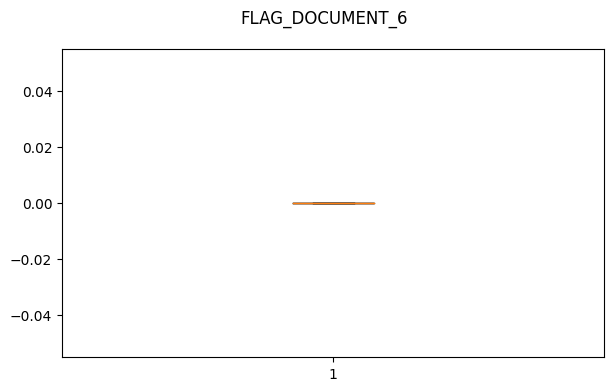

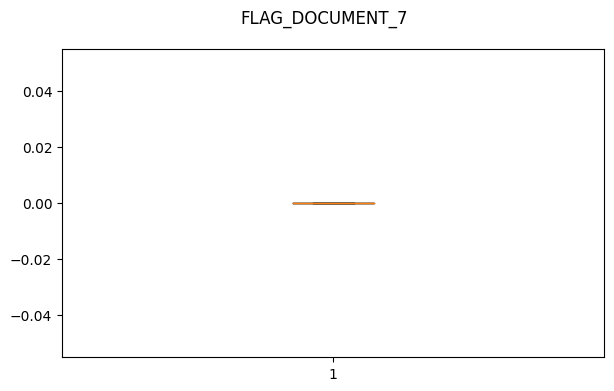

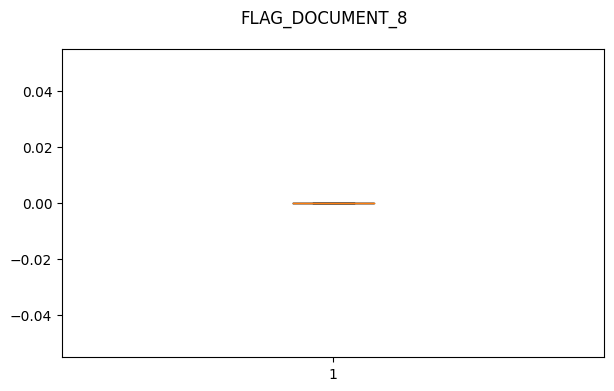

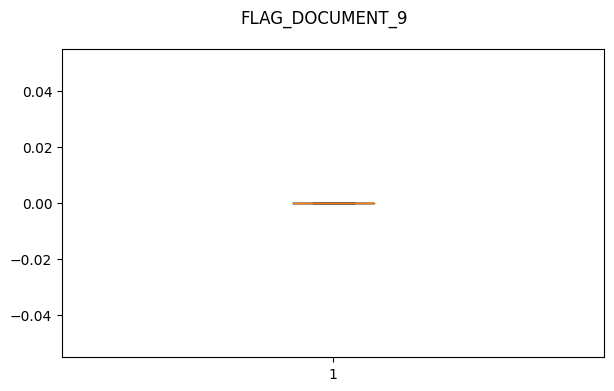

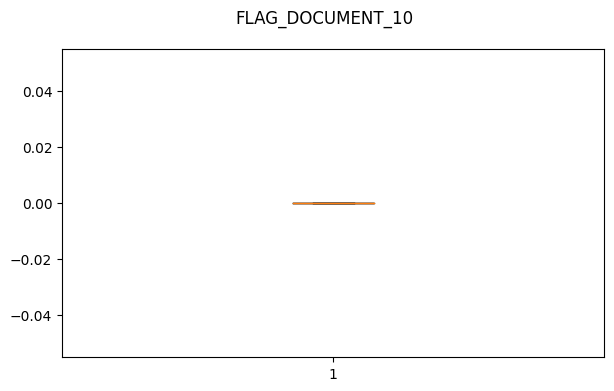

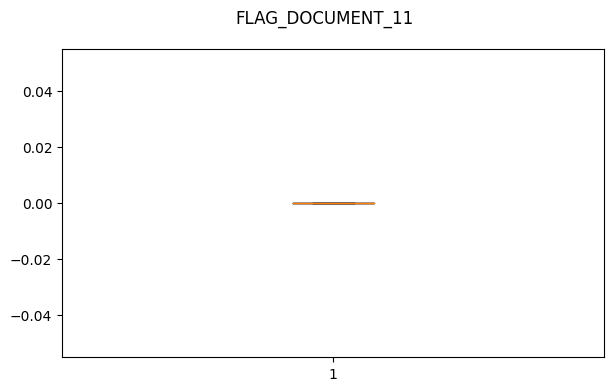

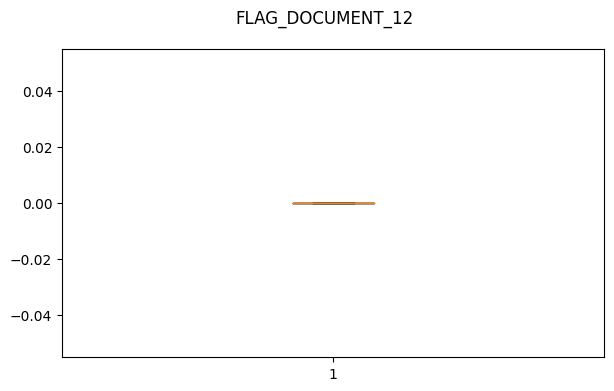

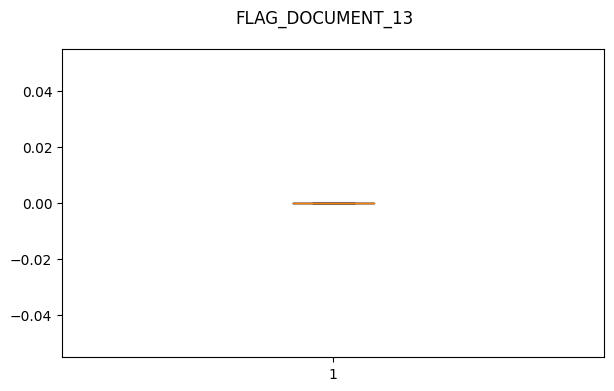

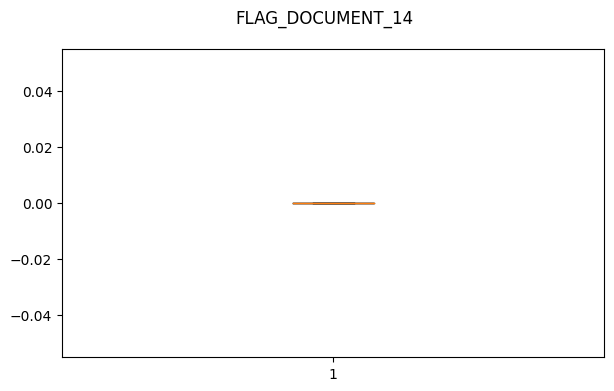

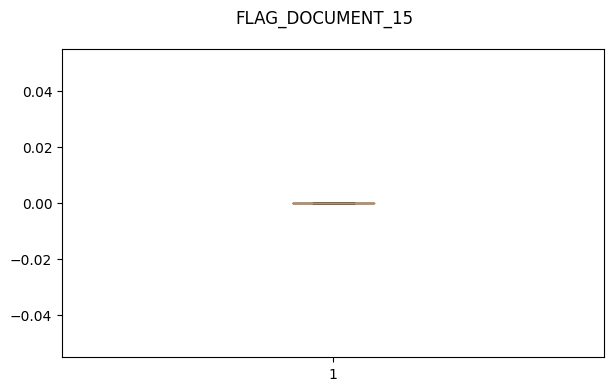

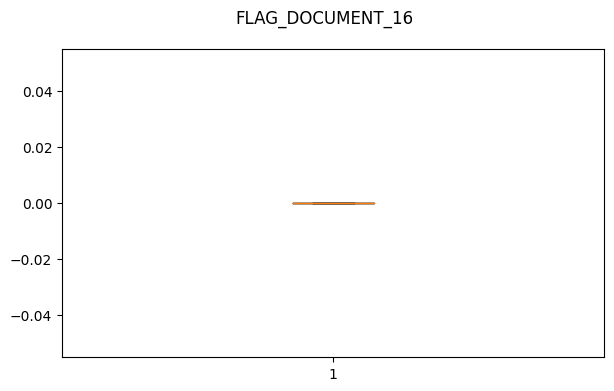

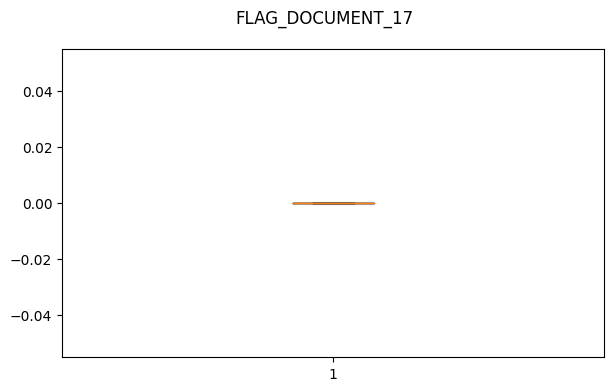

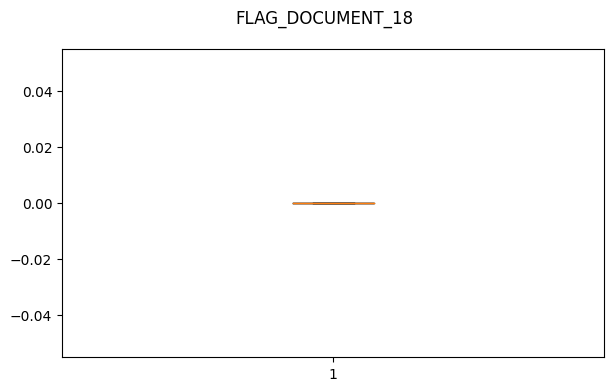

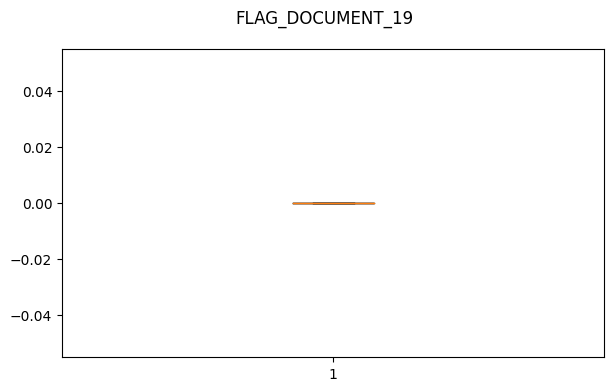

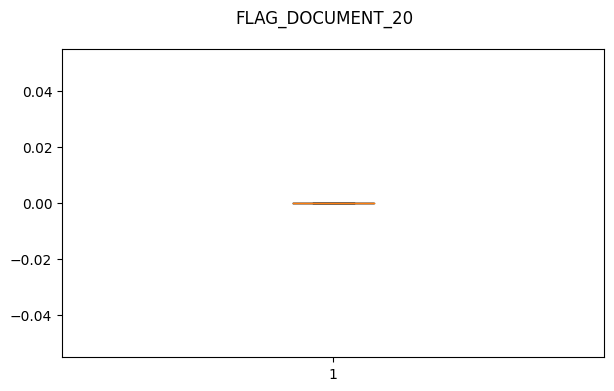

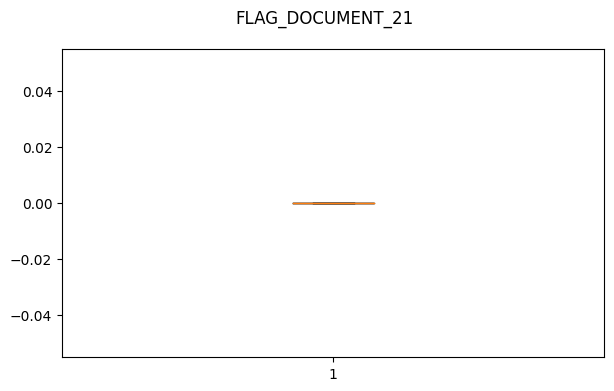

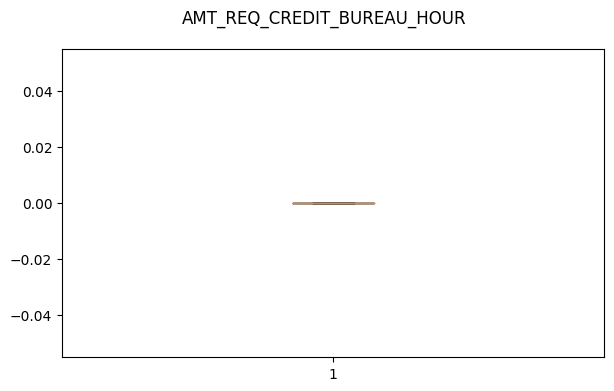

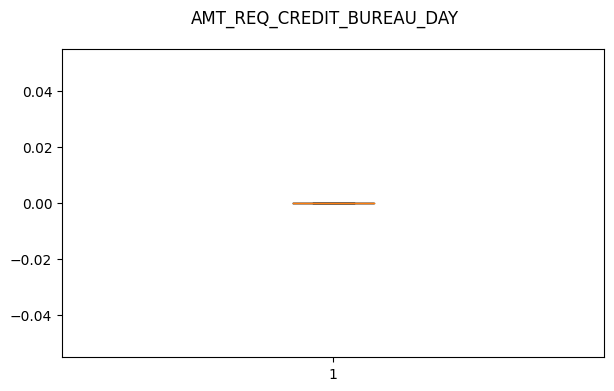

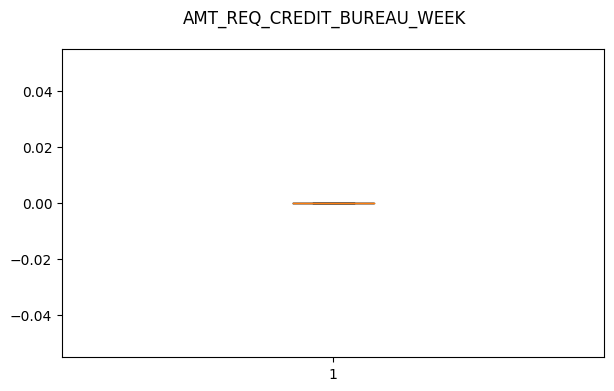

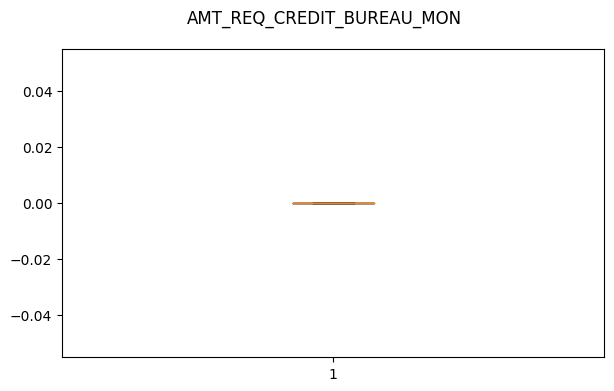

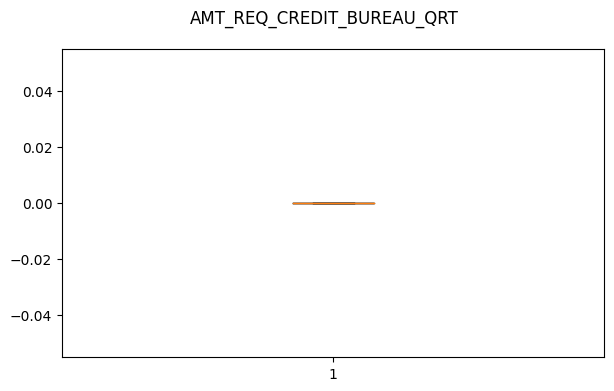

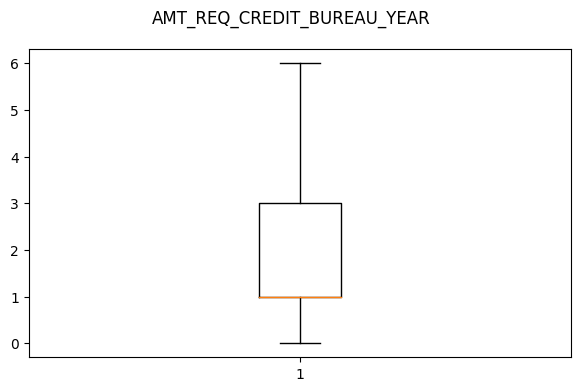

Total Boxplots printed are:  88


In [21]:
#Plotting BoxPlot of the left out columns after removal of outliers.
print('After Removing Outliers')
count = 0
for i in x.columns:
    if(x[i].dtypes != 'object'):
        fig = plt.figure(figsize=(7,4))
        plt.boxplot(x[i])
        plt.suptitle(i)
        plt.show()
        count += 1

print('Total Boxplots printed are: ',count)

### LABEL ENCODING THE DATA

In [22]:
## Label Encode the Object columns:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

print('Applying Label Encoding....')
for i in x.columns:
    if x[i].dtype == 'object':
        x[i] = label_encoder.fit_transform(x[i])
print('Done!!!')

Applying Label Encoding....
Done!!!


### OVERSAMPLING USING THE ADASYN TO CREATE SYNTHETIC DATA

In [23]:
## Oversampling using ADASYN and other SMOTE Techniques.
from collections import Counter
import imblearn
from imblearn.over_sampling import KMeansSMOTE,SMOTE,ADASYN,SVMSMOTE
sampler = SMOTE()
X_res,Y_res = sampler.fit_resample(x,y)


print("The number of classes before fit {}",format(Counter(y)))
print("The number of classes after fit {}",format(Counter(Y_res)))

print('Shape before sampling',x.shape,y.shape)
print('Shape after sampling',X_res.shape,Y_res.shape)


The number of classes before fit {} Counter({0: 169611, 1: 14895})
The number of classes after fit {} Counter({0: 169611, 1: 169611})
Shape before sampling (184506, 103) (184506,)
Shape after sampling (339222, 103) (339222,)


### TRAIN TEST SPLIT THE ENTIRE MODEL

In [24]:
## Train Test Split the Training Data.
from sklearn.model_selection import train_test_split


X_Train,X_Test,Y_Train,Y_Test = train_test_split(X_res,Y_res,train_size= 0.7,shuffle=True,random_state=30)
print("Training Data shape:  ",X_Train.shape,Y_Train.shape)
print("Testing  Data shape:  ",X_Test.shape,Y_Test.shape)

Training Data shape:   (237455, 103) (237455,)
Testing  Data shape:   (101767, 103) (101767,)


### FEATURE SELECTION USING RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


# For Random Forest Classifier
sel = SelectFromModel(RandomForestClassifier(n_estimators= 100,criterion= 'entropy'))
sel.fit(X_Train,Y_Train)


# # For Decision Tree Classifier
# sel = SelectFromModel(ExtraTreesClassifier(n_estimators= 100,criterion= 'gini'))
# sel.fit(X_Train,Y_Train)


selected_features = X_Train.columns[(sel.get_support())]
print("The Number of features selected are: ",len(selected_features))
print("The features selected are: ",selected_features)

# pd.series(sel.estimator_,feature_importa).hist()

#Dropping the columns that are not present in the selected_features list

for i in X_Train.columns:
    if i not in selected_features:
        X_Train.drop(i,axis= 1,inplace= True)
        X_Test.drop(i,axis= 1,inplace= True)


The Number of features selected are:  38
The features selected are:  Index(['FLAG_OWN_CAR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'ENTRANCES_MODE',
       'FLOORSMAX_MODE', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


### STORE THE VALUES FOR REPRODUCING THE SAME IN TEST DATASET

In [26]:
## Storing the results of the columns left out.
selected_features = []
for i in X_Train.columns:
    selected_features.append(i)

### APPLYING SCALING

In [ ]:
## Applying Standard Scalar on the entire dataset.
from sklearn.preprocessing import StandardScaler

print('Applying Scaling on the training data only for the features...')
scaler = StandardScaler()
scaler.fit(X_Train)
scaler.fit(X_Test)
X_Train = scaler.transform(X_Train)
X_Test = scaler.transform(X_Test)
print('Done!!')
#Pass this scaled data as input to the Logistic Regression.

### IMPORTING METRICS FOR COMPARISON

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report


# IMPLEMENTING ML CLASSIFICATION MODELS

### LOGISTIC REGRESSION

In [28]:
#Logistic Regression.
from sklearn.linear_model import LogisticRegression
logistic_Regression  = LogisticRegression(random_state= 30,max_iter=10000)

logistic_Regression.fit(X_Train,Y_Train)
Y_Pred = logistic_Regression.predict(X_Test)

lacc = accuracy_score(Y_Pred,Y_Test)
lf1 = f1_score(Y_Pred,Y_Test)
lauc_score = roc_auc_score(Y_Pred,Y_Test)
print('The accuracy of the model on training data is: ')

print('The accuracy  is: ',lacc*100,'%')
print('The value of f1_score is: ',lf1*100,'%')
print('The value of Roc AUC Score is: ',lauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on training data is: 
The accuracy  is:  58.87075378069512 %
The value of f1_score is:  59.777051700941755 %
The value of Roc AUC Score is:  58.88913613000539 %
The confusion matrix is: 

 [[28809 22080]
 [19776 31102]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.59      0.57      0.58     50889
           1       0.58      0.61      0.60     50878

    accuracy                           0.59    101767
   macro avg       0.59      0.59      0.59    101767
weighted avg       0.59      0.59      0.59    101767



## k NEAREST NEIGHBOURS

### FIND THE BEST VALUE OF K HERE.

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# for k in range(1, 100, 5):
#     k = k + 1
#     knn = KNeighborsClassifier(n_neighbors = k).fit(X_Train,Y_Train)
#     acc = knn.score(X_Test,Y_Test)
#     print("Accuracy for k = ",k," is: ",acc)

# Here we are selecting which is the best n value for the KNN algo

### USE THE BEST VALUE TO FIND THE ACCURACY

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 2).fit(X_Train,Y_Train)
Y_Pred = knn.predict(X_Test)
kacc = accuracy_score(Y_Pred,Y_Test)
kf1 = f1_score(Y_Pred,Y_Test)
kauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',kacc*100,'%')
print('The value of f1_score is: ',kf1*100,'%')
print('The value of Roc AUC Score is: ',kauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  89.06226969449821 %
The value of f1_score is:  89.50074044728676 %
The value of Roc AUC Score is:  89.33786439836298 %
The confusion matrix is: 

 [[43193  7696]
 [ 3435 47443]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.93      0.85      0.89     50889
           1       0.86      0.93      0.90     50878

    accuracy                           0.89    101767
   macro avg       0.89      0.89      0.89    101767
weighted avg       0.89      0.89      0.89    101767



## SVM

In [ ]:
## Tried this but this took a huge amount of time. Like 6 hours.

# from sklearn.svm import SVC


# svc = SVC()
# svc.fit(X_Train,Y_Train)

# Y_Pred = svc.predict(X_Test)
# acc = accuracy_score(Y_Pred,Y_Test)
# f1 = f1_score(Y_Pred,Y_Test)
# auc_score = roc_auc_score(Y_Pred,Y_Test)


# print('The accuracy of the model on Data is: ')

# print('The accuracy  is: ',acc*100,'%')
# print('The value of f1_score is: ',f1*100,'%')
# print('The value of Roc AUC Score is: ',auc_score*100,'%')

# print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
# print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))

## XG BOOST

### HYPERPARAMETER TUNING USING GRIDSEARCHCV TO GET THE BEST PARAMETERS FOR XG BOOST

In [ ]:
# from xgboost import XGBClassifier
# xgb_model = XGBClassifier(random_state = 30)
# search_space = {
#     "n_estimators" :   [100,200],
#     "max_depth" :      [3,6,7],
#     "gamma" :          [0.01,0.1],
#     "learning_rate" :  [0.001,0.01,0.1,1]
# }

# from sklearn.model_selection import GridSearchCV
# GS = GridSearchCV(
#     estimator= xgb_model,
#     param_grid= search_space,
#     scoring= ["roc_auc","roc_auc_ovr","roc_auc_ovo","f1","f1_micro","f1_macro","accuracy"],
#     refit= "roc_auc",
#     cv= 5,
#     verbose= 4
# )

# GS.fit(X_Train,Y_Train)

# print("The best estimator is: ",GS.best_estimator_)
# print("The best parameter is: ",GS.best_params_)
# print("The best AUC_ROC score is: ",GS.best_score_)
# df_XGBoost = pd.DataFrame(GS.cv_results_)
# df_XGBoost = df_XGBoost.sort_values("rank_test_roc_auc")
# df_XGBoost.to_csv('./Test_Output/XGBoost_GridSearchCV.csv')

### APPLYING THE BEST PARAMETERS

In [30]:
from xgboost import XGBClassifier

model_XGB = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=30)

model_XGB.fit(X_Train,Y_Train)

Y_Pred = model_XGB.predict(X_Test)
xacc = accuracy_score(Y_Pred,Y_Test)
xf1 = f1_score(Y_Pred,Y_Test)
xauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',xacc*100,'%')
print('The value of f1_score is: ',xf1*100,'%')
print('The value of Roc AUC Score is: ',xauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  95.4169819293091 %
The value of f1_score is:  95.21493792961937 %
The value of Roc AUC Score is:  95.74189682195636 %
The confusion matrix is: 

 [[50700   189]
 [ 4475 46403]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     50889
           1       1.00      0.91      0.95     50878

    accuracy                           0.95    101767
   macro avg       0.96      0.95      0.95    101767
weighted avg       0.96      0.95      0.95    101767



## DECISION TREES

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 30)
dt.fit(X_Train,Y_Train)
Y_Pred = dt.predict(X_Test)
dacc = accuracy_score(Y_Pred,Y_Test)
df1 = f1_score(Y_Pred,Y_Test)
dauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',dacc*100,'%')
print('The value of f1_score is: ',df1*100,'%')
print('The value of Roc AUC Score is: ',dauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  89.28139770259514 %
The value of f1_score is:  89.39281963514722 %
The value of Roc AUC Score is:  89.2990361330326 %
The confusion matrix is: 

 [[44895  5994]
 [ 4914 45964]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.90      0.88      0.89     50889
           1       0.88      0.90      0.89     50878

    accuracy                           0.89    101767
   macro avg       0.89      0.89      0.89    101767
weighted avg       0.89      0.89      0.89    101767



## RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 30).fit(X_Train,Y_Train)
Y_Pred = rf.predict(X_Test)
racc = accuracy_score(Y_Pred,Y_Test)
rf1 = f1_score(Y_Pred,Y_Test)
rauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',racc*100,'%')
print('The value of f1_score is: ',rf1*100,'%')
print('The value of Roc AUC Score is: ',rauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  95.28530859708943 %
The value of f1_score is:  95.06966994122243 %
The value of Roc AUC Score is:  95.63314783846414 %
The confusion matrix is: 

 [[50710   179]
 [ 4619 46259]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.95     50889
           1       1.00      0.91      0.95     50878

    accuracy                           0.95    101767
   macro avg       0.96      0.95      0.95    101767
weighted avg       0.96      0.95      0.95    101767



## GAUSSIAN NAIVE BAYES

In [33]:
##GAUSSIAN NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_Train,Y_Train)
Y_Pred = model.predict(X_Test)
gnbacc = accuracy_score(Y_Pred,Y_Test)
gnbf1 = f1_score(Y_Pred,Y_Test)
gnbauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',gnbacc*100,'%')
print('The value of f1_score is: ',gnbf1*100,'%')
print('The value of Roc AUC Score is: ',gnbauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  61.60444937946485 %
The value of f1_score is:  66.20948493548721 %
The value of Roc AUC Score is:  62.5381326779354 %
The confusion matrix is: 

 [[24412 26477]
 [12597 38281]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.66      0.48      0.56     50889
           1       0.59      0.75      0.66     50878

    accuracy                           0.62    101767
   macro avg       0.63      0.62      0.61    101767
weighted avg       0.63      0.62      0.61    101767



## BERNOULLI NAIVE BAYES

In [34]:
## BERNOULLI NAIVE BAYES

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_Train,Y_Train)
Y_Pred = model.predict(X_Test)
bnbacc = accuracy_score(Y_Pred,Y_Test)
bnbf1 = f1_score(Y_Pred,Y_Test)
bnbauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',bnbacc*100,'%')
print('The value of f1_score is: ',bnbf1*100,'%')
print('The value of Roc AUC Score is: ',bnbauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))


The accuracy of the model on Data is: 
The accuracy  is:  60.88319396267945 %
The value of f1_score is:  62.22648169586091 %
The value of Roc AUC Score is:  60.93908278976093 %
The confusion matrix is: 

 [[29170 21719]
 [18089 32789]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.62      0.57      0.59     50889
           1       0.60      0.64      0.62     50878

    accuracy                           0.61    101767
   macro avg       0.61      0.61      0.61    101767
weighted avg       0.61      0.61      0.61    101767



## LGM Classifier

In [35]:
import lightgbm as ltb
model = ltb.LGBMClassifier()
# dt = DecisionTreeClassifier()
model.fit(X_Train,Y_Train)
Y_Pred = model.predict(X_Test)

lgmacc = accuracy_score(Y_Pred,Y_Test)
lgmf1 = f1_score(Y_Pred,Y_Test)
lgmauc_score = roc_auc_score(Y_Pred,Y_Test)


print('The accuracy of the model on Data is: ')

print('The accuracy  is: ',lgmacc*100,'%')
print('The value of f1_score is: ',lgmf1*100,'%')
print('The value of Roc AUC Score is: ',lgmauc_score*100,'%')

print("The confusion matrix is: \n\n",confusion_matrix(Y_Test,Y_Pred))
print("The classification report is: \n\n",classification_report(Y_Test,Y_Pred))

The accuracy of the model on Data is: 
The accuracy  is:  95.37276327296668 %
The value of f1_score is:  95.15978168138227 %
The value of Roc AUC Score is:  95.72555741725647 %
The confusion matrix is: 

 [[50768   121]
 [ 4588 46290]]
The classification report is: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     50889
           1       1.00      0.91      0.95     50878

    accuracy                           0.95    101767
   macro avg       0.96      0.95      0.95    101767
weighted avg       0.96      0.95      0.95    101767



## MODEL COMPARISON AND PLOTTING THEM 

+---------------------+----------------+----------+---------------+
|         ALGO        | ACCURACY SCORE | F1 SCORE | ROC-AUC SCORE |
+---------------------+----------------+----------+---------------+
| Logistic Regression |      0.59      |   0.6    |      0.59     |
|         KNN         |      0.89      |   0.9    |      0.89     |
|       XG Boost      |      0.95      |   0.95   |      0.96     |
|    Decision Trees   |      0.89      |   0.89   |      0.89     |
|    Random Forest    |      0.95      |   0.95   |      0.96     |
|     Gaussian NB     |      0.62      |   0.66   |      0.63     |
|     Bernoulli NB    |      0.61      |   0.62   |      0.61     |
|      Light GBM      |      0.95      |   0.95   |      0.96     |
+---------------------+----------------+----------+---------------+


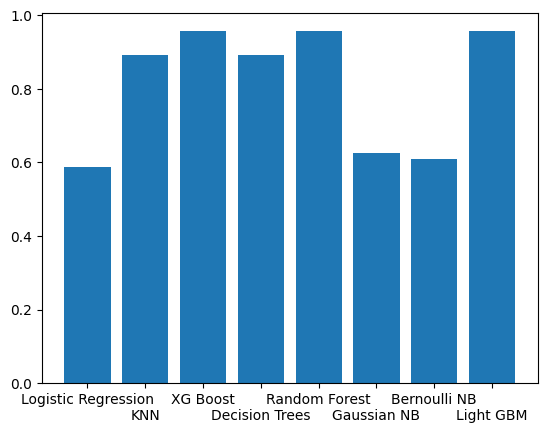

In [36]:
from prettytable import PrettyTable


t = PrettyTable(['ALGO','ACCURACY SCORE','F1 SCORE','ROC-AUC SCORE'])
t.add_row(['Logistic Regression',round(lacc,2),round(lf1,2),round(lauc_score,2)])
t.add_row(['KNN',round(kacc,2),round(kf1,2),round(kauc_score,2)])
t.add_row(['XG Boost',round(xacc,2),round(xf1,2),round(xauc_score,2)])
t.add_row(['Decision Trees',round(dacc,2),round(df1,2),round(dauc_score,2)])
t.add_row(['Random Forest',round(racc,2),round(rf1,2),round(rauc_score,2)])
t.add_row(['Gaussian NB', round(gnbacc,2),round(gnbf1,2),round(gnbauc_score,2)])
t.add_row(['Bernoulli NB',round(bnbacc,2),round(bnbf1,2),round(bnbauc_score,2)])
t.add_row(['Light GBM',round(lgmacc,2),round(lgmf1,2),round(lgmauc_score,2)])


print(t)

#Looking at the values it can be concluded that the best algo is XGBOOST!!!!
x_axis = np.array(["Logistic Regression","\nKNN","XG Boost","\nDecision Trees","Random Forest","\nGaussian NB","Bernoulli NB","\nLight GBM"])
y_axis = np.array([lauc_score,kauc_score,xauc_score,dauc_score,rauc_score,gnbauc_score,bnbauc_score,lgmauc_score])
plt.bar(x_axis,y_axis,align= 'center',width= 0.8)
plt.show()

## Hence use XG Boost!!

# TEST DATA

## LOADING THE TEST DATA

In [37]:
## importing the test data.

print('Loading the test data.....')
df_test = pd.read_csv('./Data/test_data.csv')
print('Done!!!')

Loading the test data.....
Done!!!


In [38]:
df_test.head()
df_test.info()

countDuplicateRows = df_test[df_test.duplicated(subset = None, keep= False)].shape[0]
print('The number of Duplicate Rows present here are: ',countDuplicateRows)

id_column = df_test['SK_ID_CURR']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123005 entries, 0 to 123004
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 113.6+ MB
The number of Duplicate Rows present here are:  0


# PRE-PROCESSING IN TEST DATA SAME AS THAT OF TRAIN DATA

In [39]:
## Replace the absurd values by nan values.
df_test['CODE_GENDER'] = df_test['CODE_GENDER'].replace('XNA',np.nan)
df_test['NAME_TYPE_SUITE'] = df_test['NAME_TYPE_SUITE'].replace('Other_A',np.nan)
df_test['NAME_TYPE_SUITE'] = df_test['NAME_TYPE_SUITE'].replace('Other_B',np.nan)
df_test['NAME_FAMILY_STATUS'] = df_test['NAME_FAMILY_STATUS'].replace('Unknown',np.nan)
df_test['ORGANIZATION_TYPE'] = df_test['ORGANIZATION_TYPE'].replace('XNA',np.nan)

In [40]:
## Removing the negative values
#DAYS_BIRTH DAYS_EMPLOYED DAYS_REGISTRATION DAYS_ID_PUBLISH

df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH'].abs()
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].abs()
df_test['DAYS_REGISTRATION'] = df_test['DAYS_REGISTRATION'].abs()
df_test['DAYS_ID_PUBLISH'] = df_test['DAYS_ID_PUBLISH'].abs() 

In [41]:
# Dropping all the columns that are not in X_Train
for i in df_test.columns:
    if i not in selected_features:
        df_test.drop(i,axis=1,inplace= True)

print(df_test.shape)


(123005, 38)


In [42]:
## Removing the NULL values from object data type.
for i in df_test.columns:
    if df_test[i].dtype == 'object' and df_test[i].isna().sum() > 0:
        df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

## Removing the NULL values from Non Object data type.
for i in df_test.columns:
    if df_test[i].dtype != 'object':
        df_test[i] = df_test[i].fillna(int(df_test[i].median()))

In [43]:
## Capping  Outliers using IQR Method.

for i in df_test.columns:
    if df_test[i].dtype != 'object':
        Q1 = x[i].quantile(0.25)
        Q3 = x[i].quantile(0.75)  
        IQR = Q3 - Q1
        ll = Q1 - IQR*1.5
        ul = Q3 + IQR*1.5
         
        #replace the outliers by the median
        
        #df_test[i][(df_test[i]>ul) | (df_test[i]<ll)] = df_test[i].median()
        df_test[i]=np.where(df_test[i]>ul,ul,np.where(df_test[i]<ll,ll,df_test[i]))

In [44]:
## Label Encode the Object columns:


print('Applying Label Encoding....')
for i in df_test.columns:
    if df_test[i].dtype == 'object':
        df_test[i] = label_encoder.fit_transform(df_test[i])
print('Done!!!')

Applying Label Encoding....
Done!!!


In [45]:
## Applying Standard Scalar on the entire dataset.
from sklearn.preprocessing import StandardScaler

print('Applying Scaling on the training data only for the features...')
scaler = StandardScaler()

scaler.fit(df_test)

df_Test = scaler.transform(df_test)
print('Done!!')
#Pass this scaled data as input to the Logistic Regression.

Applying Scaling on the training data only for the features...
Done!!


## Apply the XG boost algo to get Y_hat

In [46]:
## Applying the best model here.
Y_Pred_final = model_XGB.predict(df_test)

# Here Y_Pred_final is the final data prepared by us now we need to upload it to  kaggle.


print(type(Y_Pred_final))
print(type(id_column))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


## CREATING CSV FILE FOR THE KAGGLE SUBMISSION

In [47]:
## Creating CSV for kaggle

df_kaggle = id_column.to_frame()

df_kaggle['TARGET'] = Y_Pred_final.tolist()

df_kaggle.to_csv('./Test_Output/Submission_new_XGB.csv',index= None)

In [48]:
                # ---------------------------------------------- THE END ----------------------------------------------#  